# Кластеризация стран ОЭСР по уровню развития сферы труда и занятости

Целью исследования является выявление различий в уровнях развития сферы труда и занятости населения среди стран-участников Организации экономического сотрудничества и развития (ОЭСР)

In [1]:
import pandas as pd
import numpy as np
from statistics import median, variance
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

# Предобработка данных

## Загрузка данных

Источник: [OECD Statistics](https://stats.oecd.org/)

Собраны данные по 7-и показателям, характеризующим сферу труда и занятости 38 стран ОЭСР  
Рассматриваемый период динамики показателей: 2000-2020 гг.  
Все данные предварительно привели к относительным показателям

In [2]:
# доля экономически активного населения = экономически активное население / все население
active_pop_ratio = pd.read_excel('./Datasets/labour_OECD_data.xlsx', sheet_name=0, index_col=0, header=0)
# доля населения трудоспособного возраста = население трудоспособного возраста / все население
working_age_pop_ration = pd.read_excel('./Datasets/labour_OECD_data.xlsx', sheet_name=1, index_col=0, header=0)
# среднее число отработанных часов на работника
avg_annual_hours_actually_worked_per_worker = pd.read_excel('./Datasets/labour_OECD_data.xlsx', sheet_name=2, index_col=0, header=0)
# уровень занятости населения = занятое население / население трудоспособного возраста
employment_to_working_age_ratio = pd.read_excel('./Datasets/labour_OECD_data.xlsx', sheet_name=3, index_col=0, header=0)
# уровень безработицы = нерабочее население / рабочая сила
unemployment_rate = pd.read_excel('./Datasets/labour_OECD_data.xlsx', sheet_name=4, index_col=0, header=0)
# доля работников, состоящих в профсоюзах
trade_union_density = pd.read_excel('./Datasets/labour_OECD_data.xlsx', sheet_name=5, index_col=0, header=0)
# доля работников, имеющих право на коллективные переговоры и стачку
employees_w_bargain_right = pd.read_excel('./Datasets/labour_OECD_data.xlsx', sheet_name=6, index_col=0, header=0)

In [3]:
active_pop_ratio.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Australia        21 non-null     float64
 1   Austria          21 non-null     float64
 2   Belgium          21 non-null     float64
 3   Canada           21 non-null     float64
 4   Chile            21 non-null     float64
 5   Colombia         14 non-null     float64
 6   Costa Rica       10 non-null     float64
 7   Czech Republic   21 non-null     float64
 8   Denmark          21 non-null     float64
 9   Estonia          21 non-null     float64
 10  Finland          21 non-null     float64
 11  France           21 non-null     float64
 12  Germany          21 non-null     float64
 13  Greece           21 non-null     float64
 14  Hungary          21 non-null     float64
 15  Iceland          21 non-null     float64
 16  Ireland          21 non-null     float64
 17  Israel           2

In [4]:
active_pop_ratio.T.describe()

Australia    Austria    Belgium     Canada      Chile   Colombia  \
count  21.000000  21.000000  21.000000  21.000000  21.000000  14.000000   
mean    0.520641   0.501052   0.439617   0.534628   0.451193   0.471138   
std     0.010697   0.011509   0.007449   0.007394   0.042121   0.020916   
min     0.499012   0.482163   0.422157   0.516264   0.390629   0.427360   
25%     0.515457   0.489043   0.439815   0.533663   0.416124   0.464890   
50%     0.525176   0.504726   0.441875   0.536085   0.452635   0.479522   
75%     0.527279   0.510020   0.444614   0.539762   0.490230   0.485846   
max     0.534868   0.513761   0.449228   0.543717   0.506127   0.492485   

       Costa Rica  Czech Republic    Denmark    Estonia  ...     Poland  \
count   10.000000       21.000000  21.000000  21.000000  ...  21.000000   
mean     0.468111        0.503090   0.523258   0.511504  ...   0.448097   
std      0.013349        0.003239   0.010374   0.015568  ...   0.003799   
min      0.444419        0.497608   0.507494   0.481731  ...   0.442312   
25%      0.459676        0.500393   0.514044   0.494030  ...   0.444561   
50%      0.471317        0.503357   0.521059   0.514756  ...   0.449151   
75%      0.475512        0.505585   0.533009   0.519661  ...   0.450899   
max      0.487337        0.509588   0.537140   0.531344  ...   0.454280   

        Portugal  Slovak Republic   Slovenia      Spain     Sweden  \
count  21.000000        21.000000  21.000000  21.000000  21.000000   
mean    0.513093         0.496411   0.496609   0.485206   0.525442   
std     0.007849         0.007550   0.010421   0.018064   0.011041   
min     0.501428         0.478921   0.481452   0.442778   0.497965   
25%     0.506609         0.491569   0.489361   0.480052   0.519109   
50%     0.513978         0.496902   0.492751   0.490972   0.530994   
75%     0.519454         0.502325   0.507342   0.497711   0.533220   
max     0.524703         0.508010   0.514998   0.501789   0.535846   

       Switzerland    Türkiye  United Kingdom  United States  
count    16.000000  15.000000       21.000000      21.000000  
mean      0.570880   0.362290        0.504498       0.498713  
std       0.005262   0.025401        0.005075       0.007062  
min       0.559222   0.323019        0.493674       0.484892  
25%       0.567785   0.341690        0.501806       0.493019  
50%       0.571641   0.367186        0.506518       0.498093  
75%       0.574989   0.382054        0.507819       0.505018  
max       0.578273   0.396091        0.510533       0.508328  

[8 rows x 38 columns]

In [5]:
working_age_pop_ration.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Australia        21 non-null     float64
 1   Austria          21 non-null     float64
 2   Belgium          21 non-null     float64
 3   Canada           21 non-null     float64
 4   Chile            21 non-null     float64
 5   Colombia         14 non-null     float64
 6   Costa Rica       10 non-null     float64
 7   Czech Republic   21 non-null     float64
 8   Denmark          21 non-null     float64
 9   Estonia          21 non-null     float64
 10  Finland          21 non-null     float64
 11  France           18 non-null     float64
 12  Germany          16 non-null     float64
 13  Greece           21 non-null     float64
 14  Hungary          21 non-null     float64
 15  Iceland          18 non-null     float64
 16  Ireland          21 non-null     float64
 17  Israel           2

In [6]:
working_age_pop_ration.T.describe()

Australia    Austria    Belgium     Canada      Chile   Colombia  \
count  21.000000  21.000000  21.000000  21.000000  21.000000  14.000000   
mean    0.804471   0.831643   0.826469   0.806039   0.772808   0.698127   
std     0.006422   0.008265   0.004891   0.010425   0.027168   0.018779   
min     0.790590   0.811263   0.816949   0.785046   0.718297   0.671313   
25%     0.800728   0.824419   0.822758   0.798749   0.756232   0.685153   
50%     0.807141   0.835704   0.829483   0.810944   0.779209   0.696170   
75%     0.809102   0.837869   0.830298   0.813934   0.794432   0.707209   
max     0.811478   0.840307   0.831480   0.816374   0.807159   0.735488   

       Costa Rica  Czech Republic    Denmark    Estonia  ...     Poland  \
count   10.000000       21.000000  21.000000  21.000000  ...  21.000000   
mean     0.769405        0.847519   0.821657   0.838394  ...   0.807178   
std      0.009661        0.007933   0.009148   0.007296  ...   0.011086   
min      0.753229        0.830973   0.810652   0.826011  ...   0.788886   
25%      0.762552        0.841470   0.813265   0.832787  ...   0.799742   
50%      0.770858        0.848191   0.819530   0.836466  ...   0.805160   
75%      0.776902        0.854083   0.830180   0.845444  ...   0.815152   
max      0.781799        0.858729   0.836694   0.849214  ...   0.824576   

        Portugal  Slovak Republic   Slovenia      Spain     Sweden  \
count  21.000000        21.000000  21.000000  21.000000  20.000000   
mean    0.848631         0.833783   0.853177   0.843442   0.823252   
std     0.009044         0.015816   0.005659   0.003826   0.008601   
min     0.835375         0.797659   0.841518   0.838429   0.805360   
25%     0.840495         0.825374   0.848868   0.839673   0.818064   
50%     0.847947         0.842002   0.853478   0.843183   0.824156   
75%     0.855970         0.844864   0.857395   0.846510   0.830650   
max     0.864602         0.846491   0.865693   0.849166   0.833983   

       Switzerland    Türkiye  United Kingdom  United States  
count    16.000000  15.000000       21.000000      21.000000  
mean      0.841467   0.730521        0.796274       0.772031  
std       0.002825   0.013842        0.004842       0.011056  
min       0.834961   0.709608        0.784477       0.753385  
25%       0.840684   0.717866        0.794263       0.765042  
50%       0.842142   0.730105        0.798285       0.769031  
75%       0.843513   0.742637        0.799973       0.781946  
max       0.844623   0.750457        0.800304       0.789374  

[8 rows x 38 columns]

In [7]:
avg_annual_hours_actually_worked_per_worker.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Australia        21 non-null     float64
 1   Austria          21 non-null     float64
 2   Belgium          21 non-null     float64
 3   Canada           21 non-null     float64
 4   Chile            21 non-null     float64
 5   Colombia         6 non-null      float64
 6   Costa Rica       21 non-null     float64
 7   Czech Republic   21 non-null     float64
 8   Denmark          21 non-null     float64
 9   Estonia          21 non-null     float64
 10  Finland          21 non-null     float64
 11  France           21 non-null     float64
 12  Germany          21 non-null     float64
 13  Greece           21 non-null     float64
 14  Hungary          21 non-null     float64
 15  Iceland          21 non-null     float64
 16  Ireland          21 non-null     float64
 17  Israel           2

In [8]:
avg_annual_hours_actually_worked_per_worker.T.describe()

Australia      Austria      Belgium       Canada        Chile  \
count    21.000000    21.000000    21.000000    21.000000    21.000000   
mean   1776.462192  1566.825574  1576.428571  1725.380952  2078.509524   
std      40.595954    74.052572    31.704213    31.664611   122.598609   
min    1683.111932  1400.693582  1443.000000  1644.000000  1825.300000   
25%    1751.305373  1508.643477  1577.000000  1710.000000  1993.700000   
50%    1773.895120  1557.000000  1582.000000  1716.000000  2069.800000   
75%    1806.503441  1632.000000  1589.000000  1745.000000  2165.000000   
max    1852.162213  1675.000000  1598.000000  1787.000000  2263.000000   

          Colombia   Costa Rica  Czech Republic      Denmark      Estonia  \
count     6.000000    21.000000       21.000000    21.000000    21.000000   
mean   2240.789773  2250.271429     1789.499494  1425.743299  1811.892651   
std     137.150557   130.236497       35.899558    32.976593    79.685708   
min    1963.970524  1913.200000     1703.596535  1342.327019  1637.156028   
25%    2274.976156  2148.200000     1775.017312  1412.044769  1767.000000   
50%    2283.912830  2285.300000     1786.033445  1425.633575  1796.000000   
75%    2307.697673  2357.000000     1802.926072  1455.703341  1884.000000   
max    2325.319232  2392.000000     1900.259727  1468.675527  1913.000000   

       ...       Poland     Portugal  Slovak Republic     Slovenia  \
count  ...    21.000000    21.000000        21.000000    21.000000   
mean   ...  1831.765473  1733.454838      1752.984500  1666.028121   
std    ...    27.451518    31.306124        55.003240    47.432520   
min    ...  1768.756397  1611.193462      1571.980392  1533.822669   
25%    ...  1819.687805  1727.140473      1740.000000  1652.400000   
50%    ...  1831.363798  1742.200483      1769.000000  1673.500000   
75%    ...  1855.974844  1747.852204      1791.000000  1695.900000   
max    ...  1860.870770  1770.413681      1816.000000  1736.500000   

             Spain       Sweden  Switzerland      Türkiye  United Kingdom  \
count    21.000000    21.000000    21.000000    21.000000       21.000000   
mean   1708.072884  1461.529503  1619.336739  1854.182238     1526.824446   
std      40.449802    15.758460    59.762999    93.652238       39.511122   
min    1569.672186  1426.155443  1498.499791  1572.391596     1363.767235   
25%    1694.200000  1452.612399  1572.688721  1810.707197     1525.127382   
50%    1705.800000  1464.359754  1611.235009  1877.000000     1535.679598   
75%    1723.700000  1471.282755  1668.900000  1936.000000     1541.275306   
max    1763.600000  1485.595500  1712.700000  1944.000000     1562.608077   

       United States  
count      21.000000  
mean     1787.415915  
std        16.081211  
min      1760.908500  
25%      1778.337500  
50%      1781.967833  
75%      1796.333000  
max      1832.160000  

[8 rows x 38 columns]

In [9]:
employment_to_working_age_ratio.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Australia        21 non-null     float64
 1   Austria          21 non-null     float64
 2   Belgium          21 non-null     float64
 3   Canada           21 non-null     float64
 4   Chile            21 non-null     float64
 5   Colombia         14 non-null     float64
 6   Costa Rica       10 non-null     float64
 7   Czech Republic   21 non-null     float64
 8   Denmark          21 non-null     float64
 9   Estonia          21 non-null     float64
 10  Finland          21 non-null     float64
 11  France           18 non-null     float64
 12  Germany          16 non-null     float64
 13  Greece           21 non-null     float64
 14  Hungary          21 non-null     float64
 15  Iceland          18 non-null     float64
 16  Ireland          21 non-null     float64
 17  Israel           2

In [10]:
employment_to_working_age_ratio.T.describe()

Australia    Austria    Belgium     Canada      Chile   Colombia  \
count  21.000000  21.000000  21.000000  21.000000  21.000000  14.000000   
mean    0.611513   0.571854   0.492192   0.616331   0.535903   0.602634   
std     0.011078   0.008581   0.010187   0.010843   0.040692   0.029590   
min     0.590307   0.552630   0.475895   0.579636   0.484291   0.534123   
25%     0.607717   0.568559   0.487348   0.612860   0.501025   0.588138   
50%     0.612621   0.572999   0.490466   0.615033   0.516717   0.615040   
75%     0.619829   0.576880   0.495893   0.624437   0.578755   0.624458   
max     0.627085   0.586076   0.514748   0.632076   0.583453   0.631171   

       Costa Rica  Czech Republic    Denmark    Estonia  ...     Poland  \
count   10.000000       21.000000  21.000000  21.000000  ...  21.000000   
mean     0.542010        0.558488   0.600194   0.556046  ...   0.495399   
std      0.024506        0.016620   0.022993   0.033877  ...   0.034345   
min      0.485033        0.541795   0.568845   0.503915  ...   0.439910   
25%      0.530582        0.546709   0.581164   0.528533  ...   0.465274   
50%      0.547904        0.551538   0.592450   0.560343  ...   0.501959   
75%      0.561412        0.564242   0.623185   0.582835  ...   0.519449   
max      0.565137        0.592010   0.632158   0.608203  ...   0.543564   

        Portugal  Slovak Republic   Slovenia      Spain     Sweden  \
count  21.000000        21.000000  21.000000  21.000000  20.000000   
mean    0.550879         0.518113   0.542834   0.483230   0.595000   
std     0.029749         0.024041   0.016491   0.027847   0.011885   
min     0.496848         0.487842   0.514614   0.438725   0.578390   
25%     0.528197         0.498198   0.527626   0.468077   0.587231   
50%     0.554189         0.512351   0.545890   0.479015   0.593166   
75%     0.573442         0.536659   0.554848   0.497476   0.601113   
max     0.590933         0.562593   0.568883   0.537549   0.617378   

       Switzerland    Türkiye  United Kingdom  United States  
count    16.000000  15.000000       21.000000      21.000000  
mean      0.648210   0.443957        0.597614       0.607555  
std       0.005546   0.021929        0.009795       0.021420  
min       0.637755   0.411560        0.579985       0.567723  
25%       0.644841   0.422694        0.594949       0.590068  
50%       0.647653   0.453554        0.600208       0.604215  
75%       0.652001   0.459475        0.601755       0.626894  
max       0.659030   0.473727        0.615160       0.643959  

[8 rows x 38 columns]

In [11]:
unemployment_rate.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Australia        21 non-null     float64
 1   Austria          21 non-null     float64
 2   Belgium          21 non-null     float64
 3   Canada           21 non-null     float64
 4   Chile            21 non-null     float64
 5   Colombia         14 non-null     float64
 6   Costa Rica       10 non-null     float64
 7   Czech Republic   21 non-null     float64
 8   Denmark          21 non-null     float64
 9   Estonia          21 non-null     float64
 10  Finland          21 non-null     float64
 11  France           21 non-null     float64
 12  Germany          21 non-null     float64
 13  Greece           21 non-null     float64
 14  Hungary          21 non-null     float64
 15  Iceland          18 non-null     float64
 16  Ireland          21 non-null     float64
 17  Israel           2

In [12]:
unemployment_rate.T.describe()

Australia    Austria    Belgium     Canada      Chile   Colombia  \
count  21.000000  21.000000  21.000000  21.000000  21.000000  14.000000   
mean    0.055359   0.049125   0.074712   0.070881   0.081072   0.107538   
std     0.006637   0.007105   0.009706   0.008971   0.014817   0.018255   
min     0.042343   0.035341   0.053605   0.057333   0.060822   0.089508   
25%     0.051589   0.044877   0.070096   0.064000   0.069652   0.093542   
50%     0.055604   0.048634   0.075379   0.070500   0.077925   0.104379   
75%     0.060564   0.054903   0.082930   0.075583   0.096675   0.113671   
max     0.067422   0.060142   0.085229   0.095583   0.107702   0.158642   

       Costa Rica  Czech Republic    Denmark    Estonia  ...     Poland  \
count   10.000000       21.000000  21.000000  21.000000  ...  21.000000   
mean     0.109323        0.059339   0.056603   0.089166  ...   0.108047   
std      0.031379        0.021468   0.013097   0.035729  ...   0.056058   
min      0.090717        0.020139   0.036837   0.044494  ...   0.031621   
25%      0.095566        0.043924   0.046260   0.059141  ...   0.071212   
50%      0.098946        0.067114   0.055076   0.080334  ...   0.096329   
75%      0.102899        0.073137   0.064116   0.112185  ...   0.161042   
max      0.196069        0.088216   0.077977   0.167026  ...   0.199332   

        Portugal  Slovak Republic   Slovenia      Spain     Sweden  \
count  21.000000        21.000000  21.000000  21.000000  20.000000   
mean    0.089435         0.129735   0.067517   0.158902   0.070220   
std     0.035535         0.042209   0.016692   0.056593   0.010809   
min     0.040091         0.057533   0.043750   0.082320   0.048508   
25%     0.066241         0.096717   0.058479   0.112443   0.063318   
50%     0.076488         0.133726   0.065034   0.152580   0.070299   
75%     0.110701         0.162589   0.080066   0.198598   0.079608   
max     0.161885         0.193060   0.101091   0.260921   0.086108   

       Switzerland    Türkiye  United Kingdom  United States  
count    11.000000  15.000000       21.000000      21.000000  
mean      0.047008   0.103880        0.056773       0.059861  
std       0.001844   0.016791        0.013423       0.018444  
min       0.043945   0.081667        0.038341       0.036667  
25%       0.045993   0.088512        0.048232       0.046167  
50%       0.047976   0.102456        0.053294       0.055333  
75%       0.048095   0.108631        0.061782       0.073750  
max       0.049192   0.136673        0.081065       0.096167  

[8 rows x 38 columns]

In [13]:
trade_union_density.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Australia        17 non-null     float64
 1   Austria          20 non-null     float64
 2   Belgium          20 non-null     float64
 3   Canada           21 non-null     float64
 4   Chile            19 non-null     float64
 5   Colombia         15 non-null     float64
 6   Costa Rica       20 non-null     float64
 7   Czech Republic   19 non-null     float64
 8   Denmark          20 non-null     float64
 9   Estonia          20 non-null     float64
 10  Finland          20 non-null     float64
 11  France           10 non-null     float64
 12  Germany          20 non-null     float64
 13  Greece           6 non-null      float64
 14  Hungary          10 non-null     float64
 15  Iceland          21 non-null     float64
 16  Ireland          21 non-null     float64
 17  Israel           4

In [14]:
trade_union_density.T.describe()

Australia    Austria    Belgium     Canada      Chile   Colombia  \
count  17.000000  20.000000  20.000000  21.000000  19.000000  15.000000   
mean    0.196588   0.303750   0.536250   0.271762   0.133368   0.098000   
std     0.034567   0.036571   0.022086   0.007449   0.020987   0.008435   
min     0.137000   0.263000   0.491000   0.259000   0.109000   0.091000   
25%     0.182000   0.276250   0.527500   0.265000   0.113500   0.094000   
50%     0.188000   0.291000   0.537000   0.272000   0.137000   0.096000   
75%     0.228000   0.340000   0.550000   0.277000   0.145000   0.096500   
max     0.249000   0.369000   0.576000   0.284000   0.170000   0.123000   

       Costa Rica  Czech Republic    Denmark    Estonia  ...     Poland  \
count   20.000000       19.000000  20.000000  20.000000  ...  16.000000   
mean     0.147900        0.170632   0.696950   0.078850  ...   0.187000   
std      0.028556        0.045604   0.023767   0.029621  ...   0.036586   
min      0.115000        0.114000   0.667000   0.045000  ...   0.134000   
25%      0.129750        0.132500   0.681750   0.058250  ...   0.163000   
50%      0.136000        0.167000   0.688500   0.073000  ...   0.173500   
75%      0.155250        0.198500   0.715500   0.088750  ...   0.228250   
max      0.205000        0.272000   0.745000   0.140000  ...   0.238000   

        Portugal  Slovak Republic   Slovenia      Spain     Sweden  \
count  10.000000        19.000000  16.000000  20.000000  20.000000   
mean    0.195000         0.192421   0.351812   0.160550   0.708750   
std     0.021807         0.074526   0.073518   0.017778   0.051399   
min     0.153000         0.113000   0.238000   0.125000   0.652000   
25%     0.188500         0.137500   0.296250   0.152250   0.672250   
50%     0.204500         0.164000   0.346500   0.164500   0.682500   
75%     0.210000         0.244500   0.411250   0.174250   0.758750   
max     0.216000         0.342000   0.471000   0.183000   0.810000   

       Switzerland    Türkiye  United Kingdom  United States  
count    19.000000  20.000000       20.000000      21.000000  
mean      0.178526   0.089500        0.266800       0.113476  
std       0.020595   0.020028        0.022028       0.009490  
min       0.144000   0.063000        0.233000       0.099000  
25%       0.163000   0.073000        0.249250       0.106000  
50%       0.177000   0.084500        0.270000       0.114000  
75%       0.198500   0.103500        0.286500       0.120000  
max       0.207000   0.125000        0.298000       0.129000  

[8 rows x 38 columns]

In [15]:
employees_w_bargain_right.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2000 to 2020
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Australia        10 non-null     float64
 1   Austria          16 non-null     float64
 2   Belgium          20 non-null     float64
 3   Canada           21 non-null     float64
 4   Chile            10 non-null     float64
 5   Colombia         9 non-null      float64
 6   Costa Rica       5 non-null      float64
 7   Czech Republic   20 non-null     float64
 8   Denmark          18 non-null     float64
 9   Estonia          10 non-null     float64
 10  Finland          12 non-null     float64
 11  France           9 non-null      float64
 12  Germany          19 non-null     float64
 13  Greece           18 non-null     float64
 14  Hungary          20 non-null     float64
 15  Iceland          20 non-null     float64
 16  Ireland          5 non-null      float64
 17  Israel           3

In [16]:
employees_w_bargain_right.T.describe()

Australia       Austria       Belgium     Canada     Chile  Colombia  \
count   10.00000  1.600000e+01  2.000000e+01  21.000000  10.00000  9.000000   
mean     0.61480  9.800000e-01  9.600000e-01   0.312810   0.17620  0.064111   
std      0.01564  1.146633e-16  2.278130e-16   0.007305   0.01866  0.066778   
min      0.59300  9.800000e-01  9.600000e-01   0.301000   0.14800  0.007000   
25%      0.60275  9.800000e-01  9.600000e-01   0.306000   0.16300  0.009000   
50%      0.61250  9.800000e-01  9.600000e-01   0.313000   0.17600  0.011000   
75%      0.62150  9.800000e-01  9.600000e-01   0.317000   0.18875  0.123000   
max      0.64400  9.800000e-01  9.600000e-01   0.324000   0.20400  0.157000   

       Costa Rica  Czech Republic    Denmark    Estonia  ...    Poland  \
count    5.000000       20.000000  18.000000  10.000000  ...  8.000000   
mean     0.390000        0.369300   0.827389   0.213200  ...  0.184625   
std      0.443565        0.025574   0.027425   0.089662  ...  0.031780   
min      0.050000        0.329000   0.763000   0.061000  ...  0.134000   
25%      0.050000        0.346000   0.820000   0.148000  ...  0.176000   
50%      0.100000        0.368000   0.830500   0.208000  ...  0.183500   
75%      0.850000        0.382750   0.850000   0.300500  ...  0.187500   
max      0.900000        0.424000   0.851000   0.325000  ...  0.250000   

        Portugal  Slovak Republic   Slovenia      Spain     Sweden  \
count  19.000000        12.000000  18.000000  19.000000  16.000000   
mean    0.777000         0.385417   0.817556   0.803263   0.888500   
std     0.034306         0.087462   0.151761   0.025662   0.014895   
min     0.731000         0.244000   0.654000   0.765000   0.875000   
25%     0.740500         0.337500   0.700000   0.789000   0.882250   
50%     0.778000         0.400000   0.704500   0.801000   0.886500   
75%     0.803500         0.420000   1.000000   0.820000   0.888250   
max     0.832000         0.520000   1.000000   0.848000   0.940000   

       Switzerland    Türkiye  United Kingdom  United States  
count    11.000000  20.000000       20.000000      21.000000  
mean      0.452273   0.085150        0.314250       0.130714  
std       0.054911   0.022065        0.036996       0.010169  
min       0.409000   0.059000        0.260000       0.116000  
25%       0.413500   0.069000        0.278000       0.123000  
50%       0.446000   0.077000        0.320000       0.131000  
75%       0.450500   0.103250        0.348500       0.137000  
max       0.572000   0.126000        0.364000       0.149000  

[8 rows x 38 columns]

В данных достаточно много пропусков

## Заполнение пропусков в данных

Заполним пропуски по каждой стране средними значениями за весь рассмтариваемый период

In [17]:
active_pop_ratio = active_pop_ratio.T.fillna(value=dict(active_pop_ratio.mean(axis=1))).T

In [18]:
working_age_pop_ration = working_age_pop_ration.T.fillna(value=dict(working_age_pop_ration.mean(axis=1))).T

In [19]:
avg_annual_hours_actually_worked_per_worker = avg_annual_hours_actually_worked_per_worker.T.fillna(
        value=dict(avg_annual_hours_actually_worked_per_worker.mean(axis=1))).T

In [20]:
employment_to_working_age_ratio = employment_to_working_age_ratio.T.fillna(value=dict(employment_to_working_age_ratio.mean(axis=1))).T

In [21]:
unemployment_rate = unemployment_rate.T.fillna(value=dict(unemployment_rate.mean(axis=1))).T

In [22]:
trade_union_density = trade_union_density.T.fillna(value=dict(trade_union_density.mean(axis=1))).T

In [23]:
employees_w_bargain_right = employees_w_bargain_right.T.fillna(value=dict(employees_w_bargain_right.mean(axis=1))).T

In [24]:
for feature in [active_pop_ratio, working_age_pop_ration, avg_annual_hours_actually_worked_per_worker,
                employment_to_working_age_ratio, unemployment_rate, trade_union_density, employees_w_bargain_right]:
    print('Пропуски отсутствуют' if feature.isna().sum(axis=1).sum() == 0 else 'Есть пропуски')

Пропуски отсутствуют
Пропуски отсутствуют
Пропуски отсутствуют
Пропуски отсутствуют
Пропуски отсутствуют
Пропуски отсутствуют
Пропуски отсутствуют


Все пропуски были устранены

## Создание тензора данных

Соберем все данные в единый тензор

In [25]:
data_tensor = np.array([np.array(feature_data) for feature_data in [active_pop_ratio,
              working_age_pop_ration, avg_annual_hours_actually_worked_per_worker,
              employment_to_working_age_ratio, unemployment_rate, trade_union_density,
              employees_w_bargain_right]])

In [26]:
print('Размерность тензора: ', data_tensor.shape)

Размерность тензора:  (7, 38, 21)


In [27]:
OECD_countries = unemployment_rate.index.tolist()
years_list = unemployment_rate.columns.tolist()

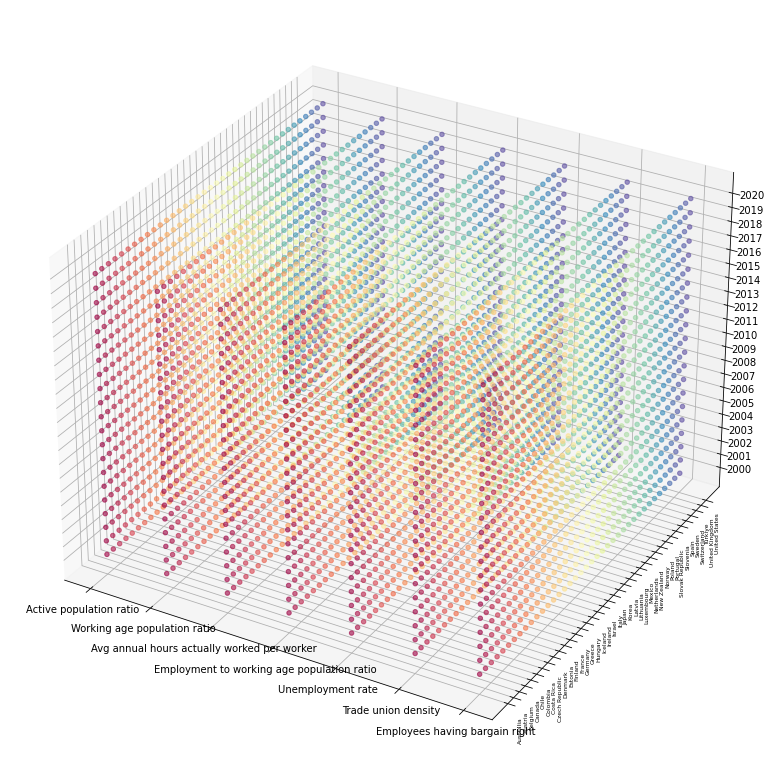

In [28]:
x, y, z = data_tensor.nonzero()
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=y, alpha=.6, cmap='Spectral')
plt.xticks(ticks=range(7), labels=['Active population ratio', 'Working age population ratio', 'Avg annual hours actually worked per worker', 'Employment to working age population ratio', 'Unemployment rate', 'Trade union density', 'Employees having bargain right'], rotation=0)
plt.yticks(ticks=range(38), labels=OECD_countries, rotation=90, fontsize=6)
ax.set_zticks(ticks=range(21), labels=years_list)
plt.show()

## Свертка данных

Делаем свертку по оси времени, используя среднее значение ряда

In [29]:
data_compressed = pd.DataFrame(
    data=data_tensor.mean(axis=2),
    columns=OECD_countries,
    index=['ActivePopulationRatio', 'WorkingAgePopulationRatio', 'AvgAnnualHoursActuallyWorkedPerWorker', 'EmploymentToWorkingAgePopulationRatio', 'UnemploymentRate', 'TradeUnionDensity', 'EmployeesHavingBargainRight']
).T
data_compressed

ActivePopulationRatio  WorkingAgePopulationRatio  \
Australia                     0.520641                   0.804471   
Austria                       0.501052                   0.831643   
Belgium                       0.439617                   0.826469   
Canada                        0.534628                   0.806039   
Chile                         0.451193                   0.772808   
Colombia                      0.471138                   0.698127   
Costa Rica                    0.468111                   0.769405   
Czech Republic                0.503090                   0.847519   
Denmark                       0.523258                   0.821657   
Estonia                       0.511504                   0.838394   
Finland                       0.497820                   0.828007   
France                        0.437914                   0.780132   
Germany                       0.506238                   0.853770   
Greece                        0.443647                   0.847505   
Hungary                       0.434002                   0.832690   
Iceland                       0.567466                   0.697235   
Ireland                       0.491762                   0.792013   
Israel                        0.423310                   0.716771   
Italy                         0.420621                   0.858543   
Japan                         0.525509                   0.867382   
Korea                         0.509173                   0.819572   
Latvia                        0.497308                   0.840542   
Lithuania                     0.496785                   0.850390   
Luxembourg                    0.456787                   0.796315   
Mexico                        0.430128                   0.721711   
Netherlands                   0.524131                   0.812630   
New Zealand                   0.533099                   0.781507   
Norway                        0.526077                   0.757327   
Poland                        0.448097                   0.807178   
Portugal                      0.513093                   0.848631   
Slovak Republic               0.496411                   0.833783   
Slovenia                      0.496609                   0.853177   
Spain                         0.485206                   0.843442   
Sweden                        0.525442                   0.823252   
Switzerland                   0.570880                   0.841467   
Türkiye                       0.362290                   0.730521   
United Kingdom                0.504498                   0.796274   
United States                 0.498713                   0.772031   

                 AvgAnnualHoursActuallyWorkedPerWorker  \
Australia                                  1776.462192   
Austria                                    1566.825574   
Belgium                                    1576.428571   
Canada                                     1725.380952   
Chile                                      2078.509524   
Colombia                                   2240.789773   
Costa Rica                                 2250.271429   
Czech Republic                             1789.499494   
Denmark                                    1425.743299   
Estonia                                    1811.892651   
Finland                                    1585.210189   
France                                     1521.713512   
Germany                                    1418.314286   
Greece                                     1961.485687   
Hungary                                    1786.533333   
Iceland                                    1570.336795   
Ireland                                    1814.761905   
Israel                                     1941.947619   
Italy                                      1763.147619   
Japan                                      1741.734701   
Korea                                      2079.923077   
Latvia                                     1736.1

## Группировка данных

Проведем предварительную группировку стран по имеющимся показателям

### Многомерное ранжирование

Ранжируем страны по каждому показателю, используя средний ранг  
Принцип: чем лучше значение показателя, тем ниже ранг

In [30]:
data_ranked = pd.DataFrame({
    'ActivePopulationRatio': data_compressed['ActivePopulationRatio'].rank(method='average', ascending=False),
    'WorkingAgePopulationRatio': data_compressed['WorkingAgePopulationRatio'].rank(method='average', ascending=False),
    'AvgAnnualHoursActuallyWorkedPerWorker': data_compressed['AvgAnnualHoursActuallyWorkedPerWorker'].rank(
        method='average', ascending=False),
    'EmploymentToWorkingAgePopulationRatio': data_compressed['EmploymentToWorkingAgePopulationRatio'].rank(
        method='average', ascending=False),
    'UnemploymentRate': data_compressed['UnemploymentRate'].rank(method='average', ascending=True),
    'TradeUnionDensity': data_compressed['TradeUnionDensity'].rank(method='average', ascending=False),
    'EmployeesHavingBargainRight': data_compressed['EmployeesHavingBargainRight'].rank(method='average', ascending=False)
})
data_ranked['TotalRank'] = data_ranked.sum(axis=1)
data_ranked

ActivePopulationRatio  WorkingAgePopulationRatio  \
Australia                         10.0                       24.0   
Austria                           17.0                       15.0   
Belgium                           32.0                       17.0   
Canada                             3.0                       23.0   
Chile                             29.0                       30.0   
Colombia                          26.0                       37.0   
Costa Rica                        27.0                       32.0   
Czech Republic                    16.0                        7.0   
Denmark                            9.0                       19.0   
Estonia                           12.0                       12.0   
Finland                           19.0                       16.0   
France                            33.0                       29.0   
Germany                           14.0                        3.0   
Greece                            31.0                        8.0   
Hungary                           34.0                       14.0   
Iceland                            2.0                       38.0   
Ireland                           24.0                       27.0   
Israel                            36.0                       36.0   
Italy                             37.0                        2.0   
Japan                              6.0                        1.0   
Korea                             13.0                       20.0   
Latvia                            20.0                       11.0   
Lithuania                         21.0                        5.0   
Luxembourg                        28.0                       25.0   
Mexico                            35.0                       35.0   
Netherlands                        8.0                       21.0   
New Zealand                        4.0                       28.0   
Norway                             5.0                       33.0   
Poland                            30.0                       22.0   
Portugal                          11.0                        6.0   
Slovak Republic                   23.0                       13.0   
Slovenia                          22.0                        4.0   
Spain                             25.0                        9.0   
Sweden                             7.0                       18.0   
Switzerland                        1.0                       10.0   
Türkiye                           38.0                       34.0   
United Kingdom                    15.0                       26.0   
United States                     18.0                       31.0   

                 AvgAnnualHoursActuallyWorkedPerWorker  \
Australia                                         16.0   
Austria                                           30.0   
Belgium                                           28.0   
Canada                                            22.0   
Chile                                              5.0   
Colombia                                           2.0   
Costa Rica                                         1.0   
Czech Republic                                    12.0   
Denmark                                           36.0   
Estonia                                           11.0   
Finland                                           27.0   
France                                            33.0   
Germany                                           38.0   
Greece                                             6.0   
Hungary                                           14.0   
Iceland                                           29.0   
Ireland                                           10.0   
Israel                                             7.0   
Italy                                             17.0   
Japan                                             19.0   
Korea                                              4.0   
Latvia                                           

In [31]:
median_rank = median(data_ranked['TotalRank'])
median_rank

134.0

Группировка стран по суммарному рангу

In [32]:
countries_by_rank = data_ranked['TotalRank'].sort_values(ascending=True)
countries_by_rank

Iceland             81.0
Switzerland         89.0
Denmark             97.0
Japan               97.0
Austria             98.0
Sweden              99.0
Norway              99.0
Australia          100.0
Netherlands        103.0
New Zealand        105.0
Slovenia           109.0
Canada             112.0
Czech Republic     116.0
Korea              116.0
Portugal           119.0
Finland            123.0
Germany            123.0
Italy              132.0
Ireland            132.0
United Kingdom     136.0
Belgium            141.0
Luxembourg         142.0
Greece             148.0
Estonia            148.0
Israel             151.0
United States      151.0
Mexico             158.0
Slovak Republic    163.0
Spain              166.0
Costa Rica         168.0
Hungary            169.0
Latvia             170.0
Chile              178.0
Poland             179.0
Colombia           179.0
Lithuania          182.0
France             187.0
Türkiye            221.0
Name: TotalRank, dtype: float64

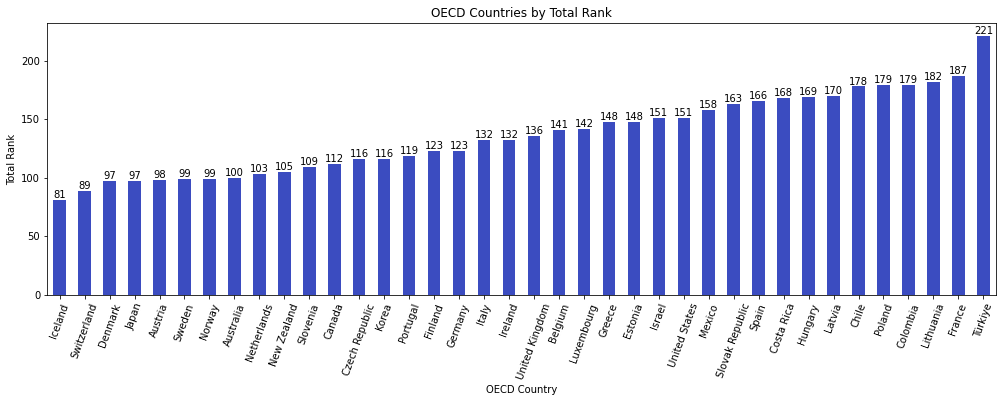

In [33]:
plt.figure(figsize=(17, 5))
plt.title('OECD Countries by Total Rank')
ax = countries_by_rank.plot(kind='bar', colormap='coolwarm')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=70)
plt.xlabel('OECD Country')
plt.ylabel('Total Rank')
plt.show()

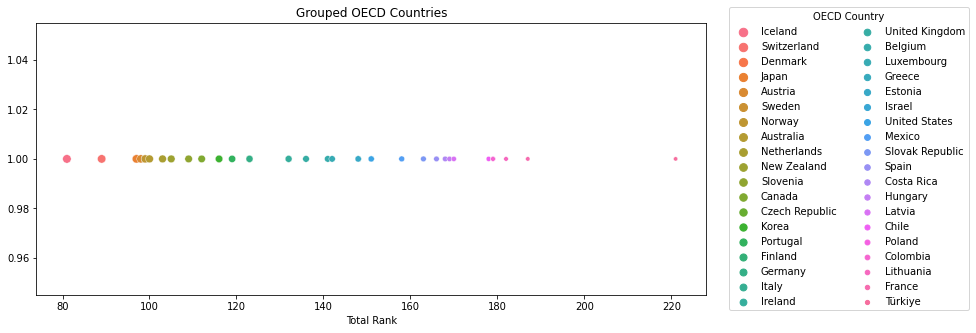

In [34]:
plt.figure(figsize=(12, 5))
plt.title('Grouped OECD Countries')
ax = sns.scatterplot(
    x=list(countries_by_rank),
    y=np.repeat(1, len(data_ranked)),
    hue=countries_by_rank.index.tolist(),
    size=countries_by_rank.index.tolist()
)
plt.xlabel('Total Rank')
ax.legend(title='OECD Country', loc='right', bbox_to_anchor=(1.4, 0.5), ncol=2)
plt.show()

In [35]:
diffs = median_rank - countries_by_rank

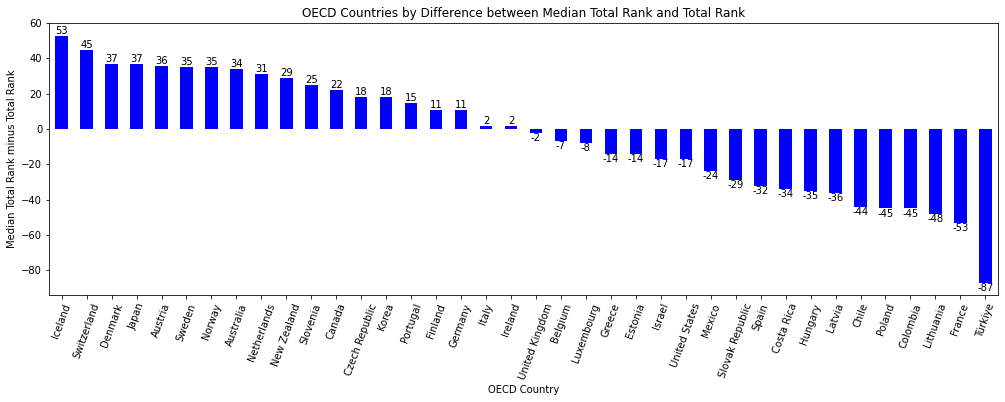

In [36]:
plt.figure(figsize=(17, 5))
plt.title('OECD Countries by Difference between Median Total Rank and Total Rank')
ax = diffs.plot(kind='bar', colormap='winter')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=70)
plt.xlabel('OECD Country')
plt.ylabel('Median Total Rank minus Total Rank')
plt.show()

### Статистические методы

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### Нормирование на стандартное отклонение

In [38]:
scaler = StandardScaler(with_mean=False)

In [39]:
data_norm = pd.DataFrame(
    data=scaler.fit_transform(data_compressed),
    index=data_compressed.index,
    columns=data_compressed.columns
)
data_norm['TotalScore'] = data_norm.drop('UnemploymentRate', axis=1).sum(axis=1) - data_norm['UnemploymentRate']
data_norm

ActivePopulationRatio  WorkingAgePopulationRatio  \
Australia                    12.074616                  17.661792   
Austria                      11.620302                  18.258329   
Belgium                      10.195529                  18.144748   
Canada                       12.399001                  17.696205   
Chile                        10.463996                  16.966653   
Colombia                     10.926553                  15.327064   
Costa Rica                   10.856344                  16.891931   
Czech Republic               11.667587                  18.606887   
Denmark                      12.135308                  18.039094   
Estonia                      11.862705                  18.406547   
Finland                      11.545352                  18.178518   
France                       10.156021                  17.127442   
Germany                      11.740594                  18.744121   
Greece                       10.288975                  18.606592   
Hungary                      10.065290                  18.281318   
Iceland                      13.160571                  15.307468   
Ireland                      11.404864                  17.388285   
Israel                        9.817339                  15.736368   
Italy                         9.754980                  18.848907   
Japan                        12.187502                  19.042964   
Korea                        11.808662                  17.993323   
Latvia                       11.533470                  18.453705   
Lithuania                    11.521359                  18.669924   
Luxembourg                   10.593723                  17.482731   
Mexico                        9.975448                  15.844827   
Netherlands                  12.155560                  17.840915   
New Zealand                  12.363544                  17.157626   
Norway                       12.200677                  16.626776   
Poland                       10.392178                  17.721222   
Portugal                     11.899572                  18.631297   
Slovak Republic              11.512678                  18.305331   
Slovenia                     11.517266                  18.731115   
Spain                        11.252813                  18.517373   
Sweden                       12.185968                  18.074123   
Switzerland                  13.239758                  18.474029   
Türkiye                       8.402160                  16.038253   
United Kingdom               11.700231                  17.481835   
United States                11.566054                  16.949575   

                 AvgAnnualHoursActuallyWorkedPerWorker  \
Australia                                     8.239493   
Austria                                       7.267167   
Belgium                                       7.311708   
Canada                                        8.002571   
Chile                                         9.640433   
Colombia                                     10.393112   
Costa Rica                                   10.437090   
Czech Republic                                8.299962   
Denmark                                       6.612807   
Estonia                                       8.403825   
Finland                                       7.352438   
France                                        7.057931   
Germany                                       6.578350   
Greece                                        9.097659   
Hungary                                       8.286204   
Iceland                                       7.283453   
Ireland                                       8.417133   
Israel                                        9.007039   
Italy                                         8.177738   
Japan                                         8.078422   
Korea                                         9.646989   
Latvia                                        8.0

Группировка данных по сумме нормированных значений показателей

In [40]:
countries_by_normscore = data_norm['TotalScore'].sort_values(ascending=False)
countries_by_normscore

Iceland            53.621637
Denmark            50.293825
Sweden             50.275850
Switzerland        49.907276
Norway             49.376524
Austria            48.942706
Finland            48.908853
Slovenia           48.448389
Australia          48.442711
Japan              48.361289
Korea              48.329799
Netherlands        48.111594
New Zealand        47.625925
Canada             47.538319
Portugal           47.508956
Czech Republic     47.178877
Belgium            46.523585
Germany            46.447443
Ireland            46.052772
United Kingdom     45.863332
Luxembourg         45.562528
Italy              45.411358
Estonia            45.283987
United States      45.076368
Costa Rica         44.843820
Mexico             44.106169
Latvia             43.961237
Chile              43.802570
Slovak Republic    43.785313
Lithuania          43.587874
Israel             43.448182
Hungary            43.357390
Spain              43.222894
Greece             43.153970
Colombia      

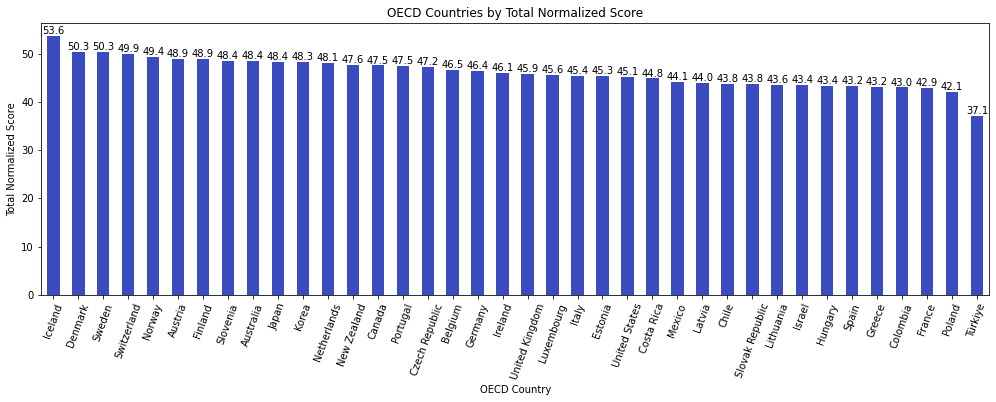

In [41]:
plt.figure(figsize=(17, 5))
plt.title('OECD Countries by Total Normalized Score')
ax = countries_by_normscore.plot(kind='bar', colormap='coolwarm')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=70)
plt.xlabel('OECD Country')
plt.ylabel('Total Normalized Score')
plt.show()

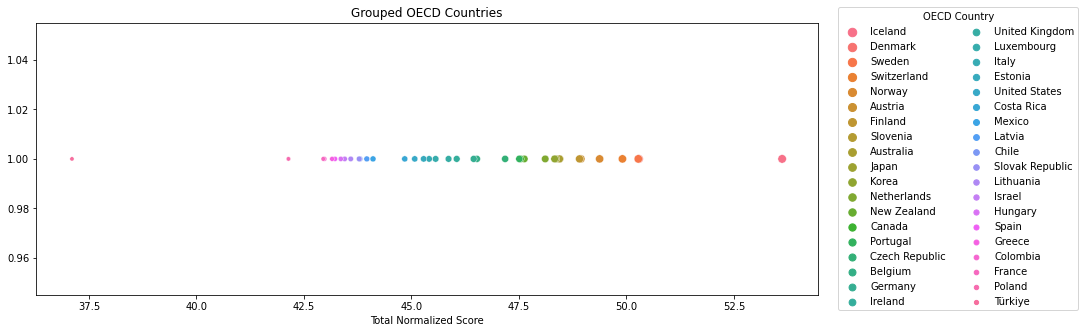

In [42]:
plt.figure(figsize=(14, 5))
plt.title('Grouped OECD Countries')
ax = sns.scatterplot(
    x=list(countries_by_normscore),
    y=np.repeat(1, len(data_norm)),
    hue=countries_by_normscore.index.tolist(),
    size=countries_by_normscore.index.tolist()
)
plt.xlabel('Total Normalized Score')
ax.legend(title='OECD Country', loc='right', bbox_to_anchor=(1.34, 0.5), ncol=2)
plt.show()

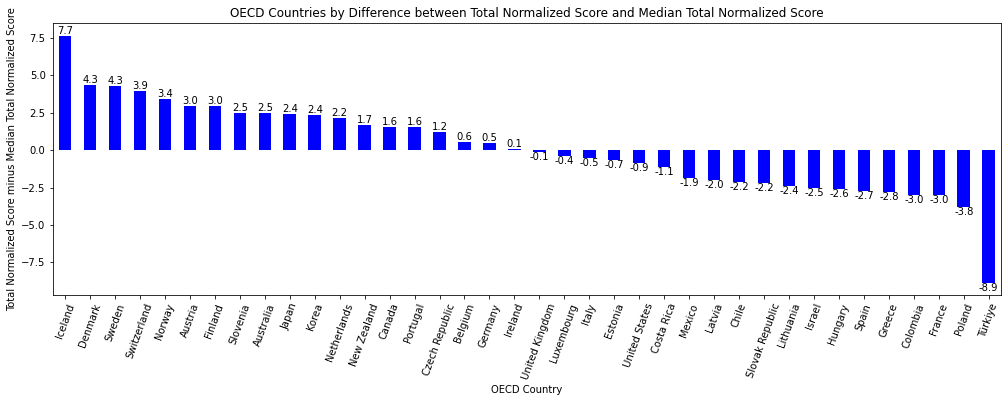

In [43]:
plt.figure(figsize=(17, 5))
plt.title('OECD Countries by Difference between Total Normalized Score and Median Total Normalized Score')
ax = (countries_by_normscore - median(countries_by_normscore)).plot(kind='bar', colormap='winter')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=70)
plt.xlabel('OECD Country')
plt.ylabel('Total Normalized Score minus Median Total Normalized Score')
plt.show()

#### Интегральный индекс

Используем формулу средней геометрической, только изменяем диапазон значений каждого признака на [1, 2], чтобы избежать нулевых значений интегрального показателя. Итоговые значения интегрального показателя лежат в диапазоне [0, 2]

Значения "негативных" факторов будем вычитать из единицы, что будет означать отрицательное влияние на интегральный показатель. Причем чем больше значение "негативного" фактора, тем сильнее он будет уменьшать значение интегрального показателя

In [44]:
minmax_scaler_main = MinMaxScaler(feature_range=(1, 2))
minmax_scaler_unemployment = MinMaxScaler()

In [45]:
data_scaled = pd.concat([pd.DataFrame(minmax_scaler_main.fit_transform(data_compressed.iloc[:, :4])),
                         1 - pd.Series(minmax_scaler_unemployment.fit_transform(np.array(data_compressed.iloc[:, 4]).reshape(-1, 1)).reshape(-1)),
                         pd.DataFrame(minmax_scaler_main.fit_transform(data_compressed.iloc[:, 5:]))], axis=1)
data_scaled.index = data_compressed.index
data_scaled.columns = data_compressed.columns
data_scaled.replace(to_replace=0, value=0.01, inplace=True)
data_scaled['IntegralIndex'] = data_scaled.prod(axis=1) ** (1 / data_scaled.shape[1])
data_scaled

ActivePopulationRatio  WorkingAgePopulationRatio  \
Australia                     1.759149                   1.630257   
Austria                       1.665235                   1.789952   
Belgium                       1.370715                   1.759546   
Canada                        1.826203                   1.639470   
Chile                         1.426211                   1.444167   
Colombia                      1.521828                   1.005246   
Costa Rica                    1.507314                   1.424164   
Czech Republic                1.675010                   1.883261   
Denmark                       1.771695                   1.731262   
Estonia                       1.715344                   1.829630   
Finland                       1.649742                   1.768586   
France                        1.362548                   1.487211   
Germany                       1.690101                   1.919999   
Greece                        1.390031                   1.883182   
Hungary                       1.343792                   1.796106   
Iceland                       1.983631                   1.000000   
Ireland                       1.620701                   1.557039   
Israel                        1.292537                   1.114818   
Italy                         1.279647                   1.948051   
Japan                         1.782484                   2.000000   
Korea                         1.704172                   1.719009   
Latvia                        1.647286                   1.842254   
Lithuania                     1.644782                   1.900136   
Luxembourg                    1.453027                   1.582322   
Mexico                        1.325221                   1.143852   
Netherlands                   1.775881                   1.678209   
New Zealand                   1.818874                   1.495291   
Norway                        1.785207                   1.353182   
Poland                        1.411365                   1.646167   
Portugal                      1.722964                   1.889796   
Slovak Republic               1.642988                   1.802534   
Slovenia                      1.643936                   1.916517   
Spain                         1.589270                   1.859298   
Sweden                        1.782167                   1.740639   
Switzerland                   2.000000                   1.847695   
Türkiye                       1.000000                   1.195633   
United Kingdom                1.681758                   1.582083   
United States                 1.654022                   1.439595   

                 AvgAnnualHoursActuallyWorkedPerWorker  \
Australia                                     1.430488   
Austria                                       1.178508   
Belgium                                       1.190051   
Canada                                        1.369090   
Chile                                         1.793545   
Colombia                                      1.988603   
Costa Rica                                    2.000000   
Czech Republic                                1.446159   
Denmark                                       1.008930   
Estonia                                       1.473075   
Finland                                       1.200606   
France                                        1.124284   
Germany                                       1.000000   
Greece                                        1.652884   
Hungary                                       1.442594   
Iceland                                       1.182729   
Ireland                                       1.476524   
Israel                                        1.629399   
Italy                                         1.414484   
Japan                                         1.388746   
Korea                                         1.795244   
Latvia                                        1.3

Группировка данных по интегральному показателю

In [46]:
countries_by_index = data_scaled['IntegralIndex'].sort_values(ascending=False)
countries_by_index

Iceland            1.496920
Denmark            1.429184
Sweden             1.417654
Austria            1.408910
Switzerland        1.403208
Norway             1.402155
Slovenia           1.380708
Australia          1.378647
Finland            1.372306
Netherlands        1.361679
Japan              1.360450
Korea              1.358393
Czech Republic     1.329805
New Zealand        1.328014
Canada             1.320393
Belgium            1.319218
Portugal           1.314350
Luxembourg         1.300983
Germany            1.293206
United Kingdom     1.282853
Ireland            1.282181
Italy              1.257610
United States      1.244256
Mexico             1.228697
Estonia            1.222133
Israel             1.215017
Hungary            1.209354
Chile              1.199835
Costa Rica         1.185506
France             1.185049
Lithuania          1.157481
Latvia             1.152249
Poland             1.114665
Colombia           1.097890
Slovak Republic    1.092241
Türkiye            0

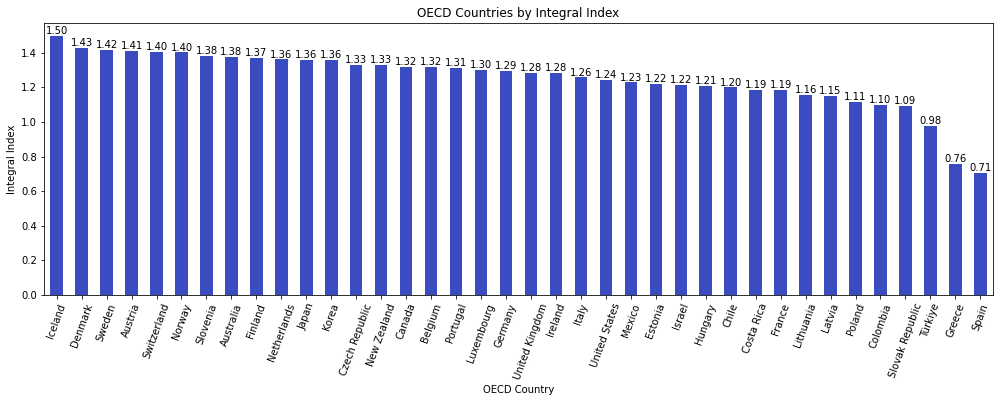

In [47]:
plt.figure(figsize=(17, 5))
plt.title('OECD Countries by Integral Index')
ax = countries_by_index.plot(kind='bar', colormap='coolwarm')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xticks(rotation=70)
plt.xlabel('OECD Country')
plt.ylabel('Integral Index')
plt.show()

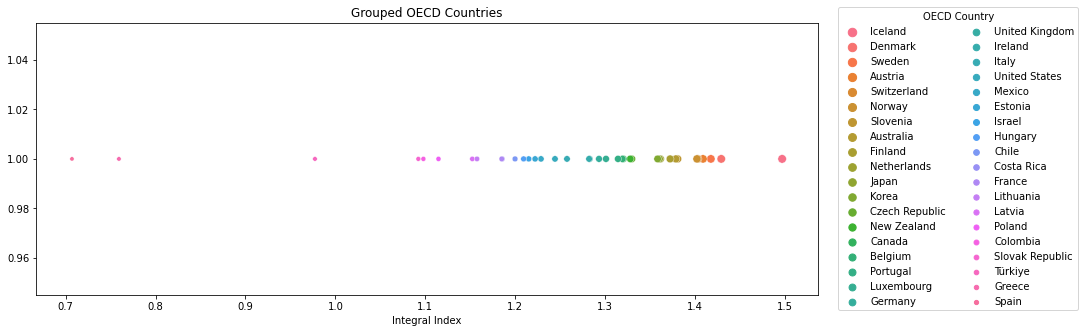

In [48]:
plt.figure(figsize=(14, 5))
plt.title('Grouped OECD Countries')
ax = sns.scatterplot(
    x=list(countries_by_index),
    y=np.repeat(1, len(data_scaled)),
    hue=countries_by_index.index.tolist(),
    size=countries_by_index.index.tolist()
)
plt.xlabel('Integral Index')
ax.legend(title='OECD Country', loc='right', bbox_to_anchor=(1.34, 0.5), ncol=2)
plt.show()

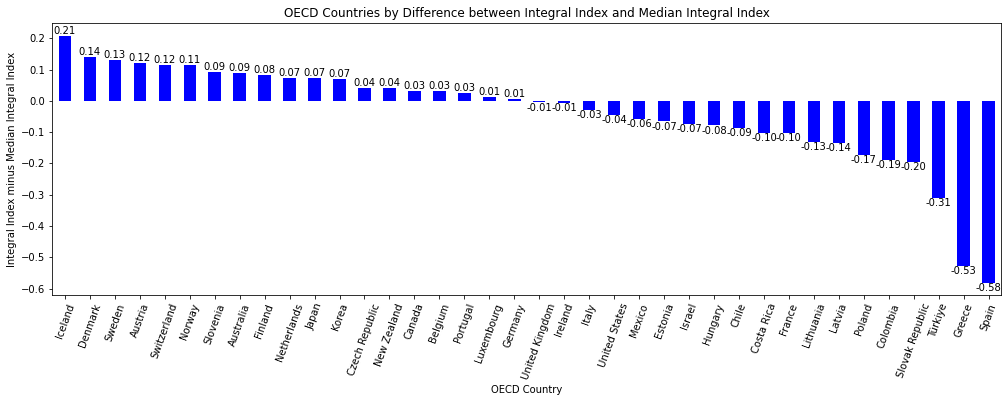

In [49]:
plt.figure(figsize=(17, 5))
plt.title('OECD Countries by Difference between Integral Index and Median Integral Index')
ax = (countries_by_index - median(countries_by_index)).plot(kind='bar', colormap='winter')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xticks(rotation=70)
plt.xlabel('OECD Country')
plt.ylabel('Integral Index minus Median Integral Index')
plt.show()

## Корреляционно-регрессионный анализ

Для удобства написания выводов переобозначим анализируемые характеристики

In [50]:
feature_names = ['Active Population Ratio',
                 'Working Age Population Ratio',
                 'Average Annual Hours Actually Worked per Worker',
                 'Employment to Working Age Population Ratio',
                 'Unemployment Rate',
                 'Trade Union Density',
                 'Employees Having Bargain Right']
feature_labels = ['x' + str(i + 1) for i in range(len(feature_names))]

In [51]:
feature_encoder = dict(zip(feature_names, feature_labels))
feature_encoder

{'Active Population Ratio': 'x1',
 'Working Age Population Ratio': 'x2',
 'Average Annual Hours Actually Worked per Worker': 'x3',
 'Employment to Working Age Population Ratio': 'x4',
 'Unemployment Rate': 'x5',
 'Trade Union Density': 'x6',
 'Employees Having Bargain Right': 'x7'}

Построим графики распределений имеющихся величин

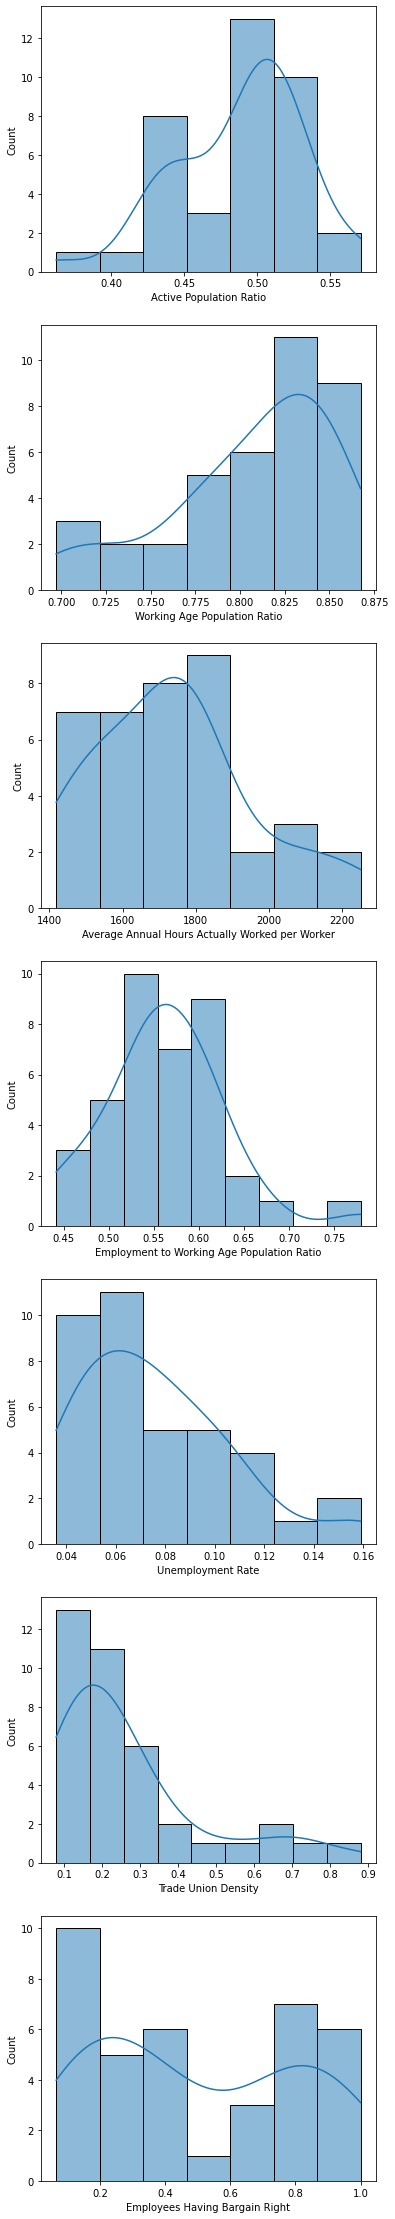

In [52]:
fig, ax = plt.subplots(data_compressed.shape[1], 1, figsize=(6, 40))
for i in range(len(feature_names)):
    sns.histplot(ax=ax[i], x=data_compressed[data_compressed.columns[i]], kde=True)
    ax[i].set_xlabel(feature_names[i])
plt.show()

Найдем векторы математического ожидания и стандартных отклонений

In [53]:
mean_vec = data_compressed.mean()
mean_vec.round(3)  # центр группирования данных в многомерном признаковом пространстве

ActivePopulationRatio                       0.488
WorkingAgePopulationRatio                   0.806
AvgAnnualHoursActuallyWorkedPerWorker    1738.248
EmploymentToWorkingAgePopulationRatio       0.562
UnemploymentRate                            0.076
TradeUnionDensity                           0.269
EmployeesHavingBargainRight                 0.498
dtype: float64

In [54]:
std_vec = data_compressed.std()
std_vec.round(3)

ActivePopulationRatio                      0.044
WorkingAgePopulationRatio                  0.046
AvgAnnualHoursActuallyWorkedPerWorker    218.497
EmploymentToWorkingAgePopulationRatio      0.067
UnemploymentRate                           0.031
TradeUnionDensity                          0.198
EmployeesHavingBargainRight                0.314
dtype: float64

In [55]:
var_coef_vec = (std_vec / mean_vec * 100).round(3)  # коэффициенты вариации
print(var_coef_vec)

ActivePopulationRatio                     8.953
WorkingAgePopulationRatio                 5.728
AvgAnnualHoursActuallyWorkedPerWorker    12.570
EmploymentToWorkingAgePopulationRatio    11.856
UnemploymentRate                         40.327
TradeUnionDensity                        73.503
EmployeesHavingBargainRight              63.064
dtype: float64


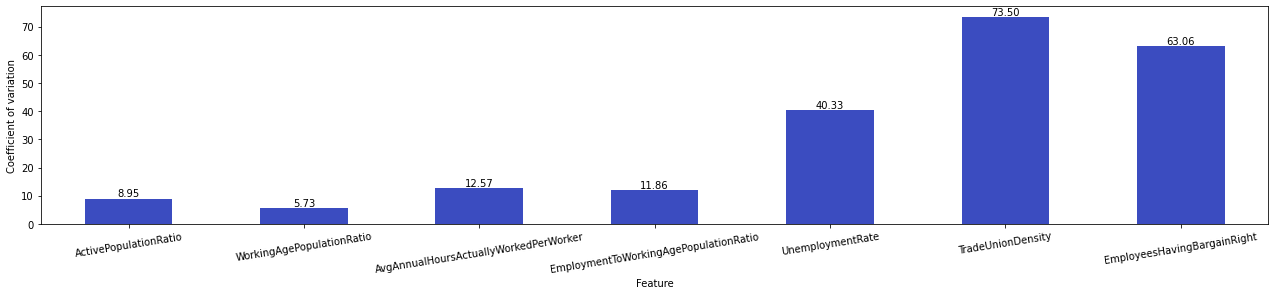

In [56]:
plt.figure(figsize=(22, 4))
ax = var_coef_vec.plot(kind='bar', colormap='coolwarm')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xticks(rotation=9)
plt.ylabel('Coefficient of variation')
plt.xlabel('Feature')
plt.show()

Доля экономически активного населения, доля населения рабочего возраста, среднегодовое число отработанных часов на одного работника, а также уровень занятости являются квазинеизменными факторами

Матрица парных корреляций

In [57]:
corr_matrix = data_compressed.corr()
corr_matrix

ActivePopulationRatio  \
ActivePopulationRatio                               1.000000   
WorkingAgePopulationRatio                           0.234660   
AvgAnnualHoursActuallyWorkedPerWorker              -0.405146   
EmploymentToWorkingAgePopulationRatio               0.786032   
UnemploymentRate                                   -0.414631   
TradeUnionDensity                                   0.301265   
EmployeesHavingBargainRight                         0.129224   

                                       WorkingAgePopulationRatio  \
ActivePopulationRatio                                   0.234660   
WorkingAgePopulationRatio                               1.000000   
AvgAnnualHoursActuallyWorkedPerWorker                  -0.357452   
EmploymentToWorkingAgePopulationRatio                  -0.369420   
UnemploymentRate                                        0.170342   
TradeUnionDensity                                      -0.094356   
EmployeesHavingBargainRight                             0.253268   

                                       AvgAnnualHoursActuallyWorkedPerWorker  \
ActivePopulationRatio                                              -0.405146   
WorkingAgePopulationRatio                                          -0.357452   
AvgAnnualHoursActuallyWorkedPerWorker                               1.000000   
EmploymentToWorkingAgePopulationRatio                              -0.237225   
UnemploymentRate                                                    0.306515   
TradeUnionDensity                                                  -0.518671   
EmployeesHavingBargainRight                                        -0.599385   

                                       EmploymentToWorkingAgePopulationRatio  \
ActivePopulationRatio                                               0.786032   
WorkingAgePopulationRatio                                          -0.369420   
AvgAnnualHoursActuallyWorkedPerWorker                              -0.237225   
EmploymentToWorkingAgePopulationRatio                               1.000000   
UnemploymentRate                                                   -0.677401   
TradeUnionDensity                                                   0.391132   
EmployeesHavingBargainRight                                         0.003098   

                                       UnemploymentRate  TradeUnionDensity  \
ActivePopulationRatio                         -0.414631           0.301265   
WorkingAgePopulationRatio                      0.170342          -0.094356   
AvgAnnualHoursActuallyWorkedPerWorker          0.306515          -0.518671   
EmploymentToWorkingAgePopulationRatio         -0.677401           0.391132   
UnemploymentRate                               1.000000          -0.269201   
TradeUnionDensity                             -0.269201           1.000000   
EmployeesHavingBargainRight                    0.001162           0.615325   

                                       EmployeesHavingBargainRight  
ActivePopulationRatio                                     0.129224  
WorkingAgePopulationRatio                                 0.253268  
AvgAnnualHoursActuallyWorkedPerWorker                    -0.599385  
EmploymentToWorkingAgePopulationRatio                     0.003098  
UnemploymentRate                                          0.001162  
TradeUnionDensity                                         0.615325  
EmployeesHavingBargainRight                               1.000000

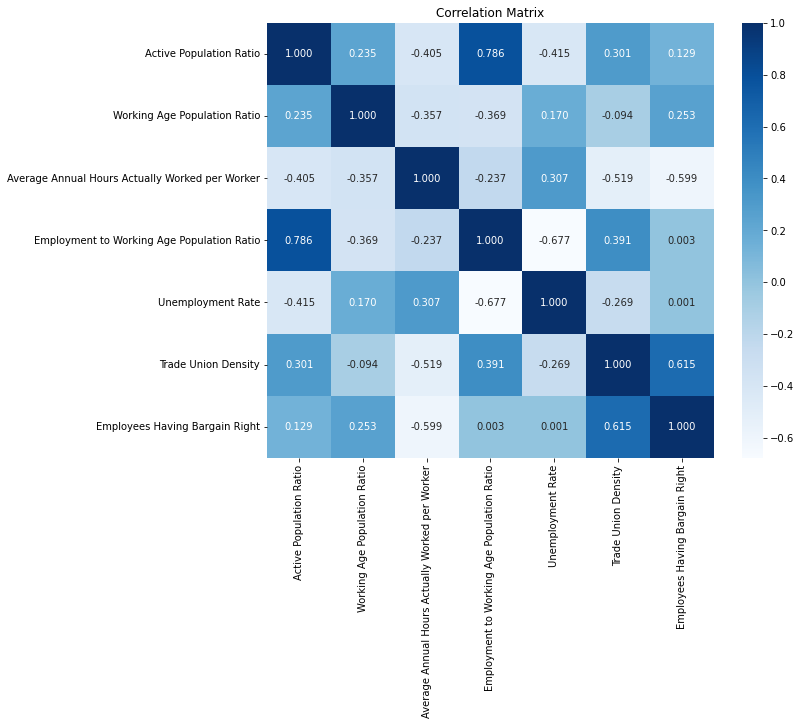

In [58]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, xticklabels=feature_names, yticklabels=feature_names, annot=True, fmt='.3f', cmap='Blues')
plt.show()

Проверка значимости и интервальные оценки для парных коэффициентов корреляции

In [59]:
from scipy import stats

In [60]:
n_features = len(corr_matrix)

In [61]:
corr_dict = {}
for col_idx in range(n_features):
    for row_idx in range(n_features):
        if row_idx > col_idx:
            corr_dict['corr_' + str(col_idx + 1) + str(row_idx + 1)] = stats.pearsonr(
                x=data_compressed[data_compressed.columns[col_idx]],
                y=data_compressed[data_compressed.columns[row_idx]])

In [62]:
for corr in corr_dict.keys():
    print(corr + ':')
    print(corr_dict[corr])
    print(corr_dict[corr].confidence_interval(confidence_level=0.95), end='\n\n')

corr_12:
PearsonRResult(statistic=0.23465979597701525, pvalue=0.15615920806562855)
ConfidenceInterval(low=-0.09191903373501852, high=0.5156599740149367)

corr_13:
PearsonRResult(statistic=-0.4051458023968902, pvalue=0.011625909919005587)
ConfidenceInterval(low=-0.6417152452993551, high=-0.09817834666588113)

corr_14:
PearsonRResult(statistic=0.7860320549697217, pvalue=4.998043860643876e-09)
ConfidenceInterval(low=0.6228624182529127, high=0.8836664889270003)

corr_15:
PearsonRResult(statistic=-0.4146307574535657, pvalue=0.009646679976377371)
ConfidenceInterval(low=-0.6483720408531196, high=-0.10945583345910581)

corr_16:
PearsonRResult(statistic=0.3012647962669441, pvalue=0.06605533609711056)
ConfidenceInterval(low=-0.020381486352234718, high=0.5663986689116791)

corr_17:
PearsonRResult(statistic=0.12922404919965733, pvalue=0.4393858092656434)
ConfidenceInterval(low=-0.19866636805232538, high=0.4310983944043364)

corr_23:
PearsonRResult(statistic=-0.35745187618084395, pvalue=0.027577943

Значимыми оказались корреляции между следующими парами признаков: x1 и x3, x1 и x5, x2 и x3, x2 и x4, x3 и x6, x4 и x6  
При визуальном анализе видно, что все факторы по-разному зависят друг от друга, при этом наблюдается как прямая, так и обратная линейные зависимости

Матрица частных корреляций

In [63]:
from pingouin import pcorr, partial_corr

In [64]:
part_corr_matrix = data_compressed.pcorr()
part_corr_matrix

ActivePopulationRatio  \
ActivePopulationRatio                               1.000000   
WorkingAgePopulationRatio                           0.982281   
AvgAnnualHoursActuallyWorkedPerWorker              -0.030991   
EmploymentToWorkingAgePopulationRatio               0.992951   
UnemploymentRate                                    0.918248   
TradeUnionDensity                                  -0.202365   
EmployeesHavingBargainRight                        -0.148547   

                                       WorkingAgePopulationRatio  \
ActivePopulationRatio                                   0.982281   
WorkingAgePopulationRatio                               1.000000   
AvgAnnualHoursActuallyWorkedPerWorker                  -0.052500   
EmploymentToWorkingAgePopulationRatio                  -0.982437   
UnemploymentRate                                       -0.902560   
TradeUnionDensity                                       0.153697   
EmployeesHavingBargainRight                             0.164152   

                                       AvgAnnualHoursActuallyWorkedPerWorker  \
ActivePopulationRatio                                              -0.030991   
WorkingAgePopulationRatio                                          -0.052500   
AvgAnnualHoursActuallyWorkedPerWorker                               1.000000   
EmploymentToWorkingAgePopulationRatio                               0.013633   
UnemploymentRate                                                    0.120361   
TradeUnionDensity                                                  -0.207787   
EmployeesHavingBargainRight                                        -0.376754   

                                       EmploymentToWorkingAgePopulationRatio  \
ActivePopulationRatio                                               0.992951   
WorkingAgePopulationRatio                                          -0.982437   
AvgAnnualHoursActuallyWorkedPerWorker                               0.013633   
EmploymentToWorkingAgePopulationRatio                               1.000000   
UnemploymentRate                                                   -0.938550   
TradeUnionDensity                                                   0.231948   
EmployeesHavingBargainRight                                         0.126657   

                                       UnemploymentRate  TradeUnionDensity  \
ActivePopulationRatio                          0.918248          -0.202365   
WorkingAgePopulationRatio                     -0.902560           0.153697   
AvgAnnualHoursActuallyWorkedPerWorker          0.120361          -0.207787   
EmploymentToWorkingAgePopulationRatio         -0.938550           0.231948   
UnemploymentRate                               1.000000           0.191647   
TradeUnionDensity                              0.191647           1.000000   
EmployeesHavingBargainRight                    0.188765           0.490776   

                                       EmployeesHavingBargainRight  
ActivePopulationRatio                                    -0.148547  
WorkingAgePopulationRatio                                 0.164152  
AvgAnnualHoursActuallyWorkedPerWorker                    -0.376754  
EmploymentToWorkingAgePopulationRatio                     0.126657  
UnemploymentRate                                          0.188765  
TradeUnionDensity                                         0.490776  
EmployeesHavingBargainRight                               1.000000

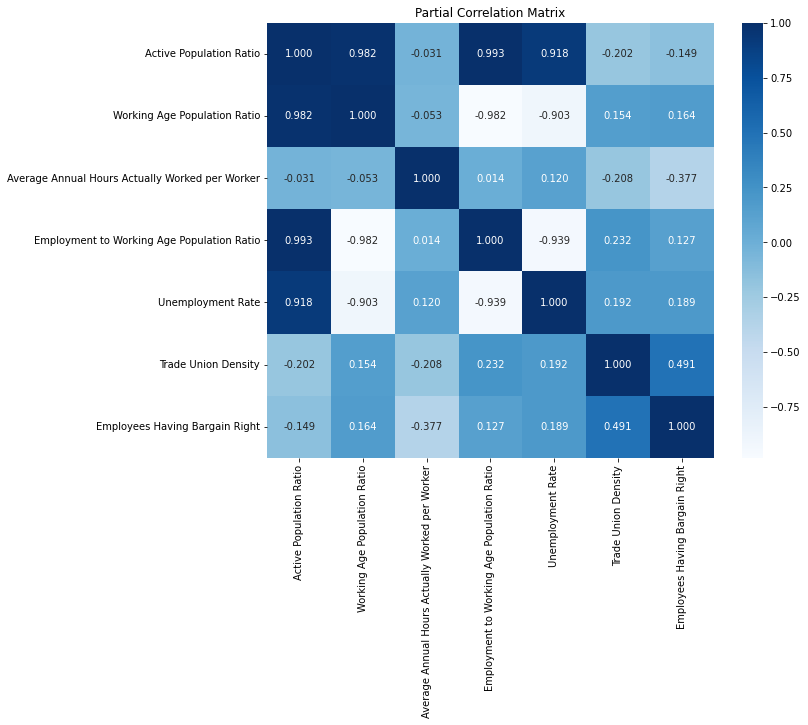

In [65]:
plt.figure(figsize=(10, 8))
plt.title('Partial Correlation Matrix')
sns.heatmap(part_corr_matrix, xticklabels=feature_names, yticklabels=feature_names, annot=True, fmt='.3f', cmap='Blues')
plt.show()

Проверка значимости и интервальные оценки для частных коэффициентов корреляции

In [66]:
pcorr_dict = {}
for col_idx in range(n_features):
    for row_idx in range(n_features):
        if row_idx > col_idx:
            pcorr_dict['pcorr_' + str(col_idx + 1) + str(row_idx + 1)] = partial_corr(
                data=data_compressed,
                x=data_compressed.columns[col_idx],
                y=data_compressed.columns[row_idx],
                covar=data_compressed.columns[list(set(range(n_features)).difference([col_idx, row_idx]))].tolist())

In [67]:
for pcorr in pcorr_dict.keys():
    print(pcorr + ':')
    print(pcorr_dict[pcorr], end='\n\n')

pcorr_12:
          n         r         CI95%         p-val
pearson  38  0.982281  [0.96, 0.99]  4.139509e-24

pcorr_13:
          n         r          CI95%    p-val
pearson  38 -0.030991  [-0.37, 0.32]  0.86406

pcorr_14:
          n         r        CI95%         p-val
pearson  38  0.992951  [0.99, 1.0]  2.779859e-30

pcorr_15:
          n         r         CI95%         p-val
pearson  38  0.918248  [0.84, 0.96]  5.201124e-14

pcorr_16:
          n         r          CI95%     p-val
pearson  38 -0.202365  [-0.51, 0.15]  0.258726

pcorr_17:
          n         r          CI95%     p-val
pearson  38 -0.148547  [-0.47, 0.21]  0.409357

pcorr_23:
          n       r         CI95%     p-val
pearson  38 -0.0525  [-0.39, 0.3]  0.771692

pcorr_24:
          n         r           CI95%         p-val
pearson  38 -0.982437  [-0.99, -0.96]  3.611590e-24

pcorr_25:
          n        r           CI95%         p-val
pearson  38 -0.90256  [-0.95, -0.81]  7.071672e-13

pcorr_26:
          n        

Значимыми оказались корреляции между парами факторов x1 и x2, x1 и x4, x1 и x5, x2 и x4, x2 и x5, x3 и x7, x4 и x5, x6 и x7

Проверка парных и частных коэффициентов корреляции на смену знака

In [68]:
def check_sign_eq(corr_mx, pcorr_mx):
    num_features = len(corr_mx)
    signs_dict = {}
    for c_idx in range(num_features):
        for r_idx in range(num_features):
            if r_idx > c_idx:
                signs_dict['r' + str(c_idx + 1) + str(r_idx + 1) + '_sign'] = np.where(
                    np.sign(corr_mx.iloc[r_idx, c_idx]) == np.sign(pcorr_mx.iloc[r_idx, c_idx]),
                    'Не поменял знак',
                    'Поменял знак')
    return signs_dict

In [69]:
corr_sign_dict = check_sign_eq(corr_matrix, part_corr_matrix)

In [70]:
pd.DataFrame({
    'corr': [_.statistic for _ in corr_dict.values()],
    'corr_significance': ['Статистически значим' if _.pvalue <= 0.05 else 'Не значим статистически' for _ in corr_dict.values()],
    'partial_corr': [_['r'][0] for _ in pcorr_dict.values()],
    'partial_corr_significance': ['Статистически значим' if _['p-val'][0] <= 0.05 else 'Не значим статистически' for _ in pcorr_dict.values()],
    'sign_changed': [str(_) for _ in corr_sign_dict.values()]},
    index=corr_dict.keys()
)

corr        corr_significance  partial_corr  \
corr_12  0.234660  Не значим статистически      0.982281   
corr_13 -0.405146     Статистически значим     -0.030991   
corr_14  0.786032     Статистически значим      0.992951   
corr_15 -0.414631     Статистически значим      0.918248   
corr_16  0.301265  Не значим статистически     -0.202365   
corr_17  0.129224  Не значим статистически     -0.148547   
corr_23 -0.357452     Статистически значим     -0.052500   
corr_24 -0.369420     Статистически значим     -0.982437   
corr_25  0.170342  Не значим статистически     -0.902560   
corr_26 -0.094356  Не значим статистически      0.153697   
corr_27  0.253268  Не значим статистически      0.164152   
corr_34 -0.237225  Не значим статистически      0.013633   
corr_35  0.306515  Не значим статистически      0.120361   
corr_36 -0.518671     Статистически значим     -0.207787   
corr_37 -0.599385     Статистически значим     -0.376754   
corr_45 -0.677401     Статистически значим     -0.938550   
corr_46  0.391132     Статистически значим      0.231948   
corr_47  0.003098  Не значим статистически      0.126657   
corr_56 -0.269201  Не значим статистически      0.191647   
corr_57  0.001162  Не значим статистически      0.188765   
corr_67  0.615325     Статистически значим      0.490776   

        partial_corr_significance     sign_changed  
corr_12      Статистически значим  Не поменял знак  
corr_13   Не значим статистически  Не поменял знак  
corr_14      Статистически значим  Не поменял знак  
corr_15      Статистически значим     Поменял знак  
corr_16   Не значим статистически     Поменял знак  
corr_17   Не значим статистически     Поменял знак  
corr_23   Не значим статистически  Не поменял знак  
corr_24      Статистически значим  Не поменял знак  
corr_25      Статистически значим     Поменял знак  
corr_26   Не значим статистически     Поменял знак  
corr_27   Не значим статистически  Не поменял знак  
corr_34   Не значим статистически     Поменял знак  
corr_35   Не значим статистически  Не поменял знак  
corr_36   Не значим статистически  Не поменял знак  
corr_37      Статистически значим  Не поменял знак  
corr_45      Статистически значим  Не поменял знак  
corr_46   Не значим статистически  Не поменял знак  
corr_47   Не значим статистически  Не поменял знак  
corr_56   Не значим статистически     Поменял знак  
corr_57   Не значим статистически  Не поменял знак  
corr_67      Статистически значим  Не поменял знак

Как можем видеть, значимые коэффициенты и парной, и частой корреляции имеют факторы x1 и x5, x2 и x4. Однако, как можно заметить, частный коэффициент корреляции для переменных x1 и x5 поменял знак по сравнению с парным коэффициентом, а значит нарушает условия коинцидентности. Следовательно, между факторами x2 и x4 имеется наиболее тесная линейная связь как при наличии влияния остальных факторов, так и при его отсутствии. Это объясняется тем, что оба данных фактора в свою формулу расчета включают численность населения рабочего возраста  
  
Незначимые коэффициенты и парной, и частной корреляции имеют факторы x1 и x6, x1 и x7, x2 и x6, x2 и x7, x3 и x4, x3 и x5, x4 и x7, x5 и x6, x5 и x7

Парные диаграммы рассеивания

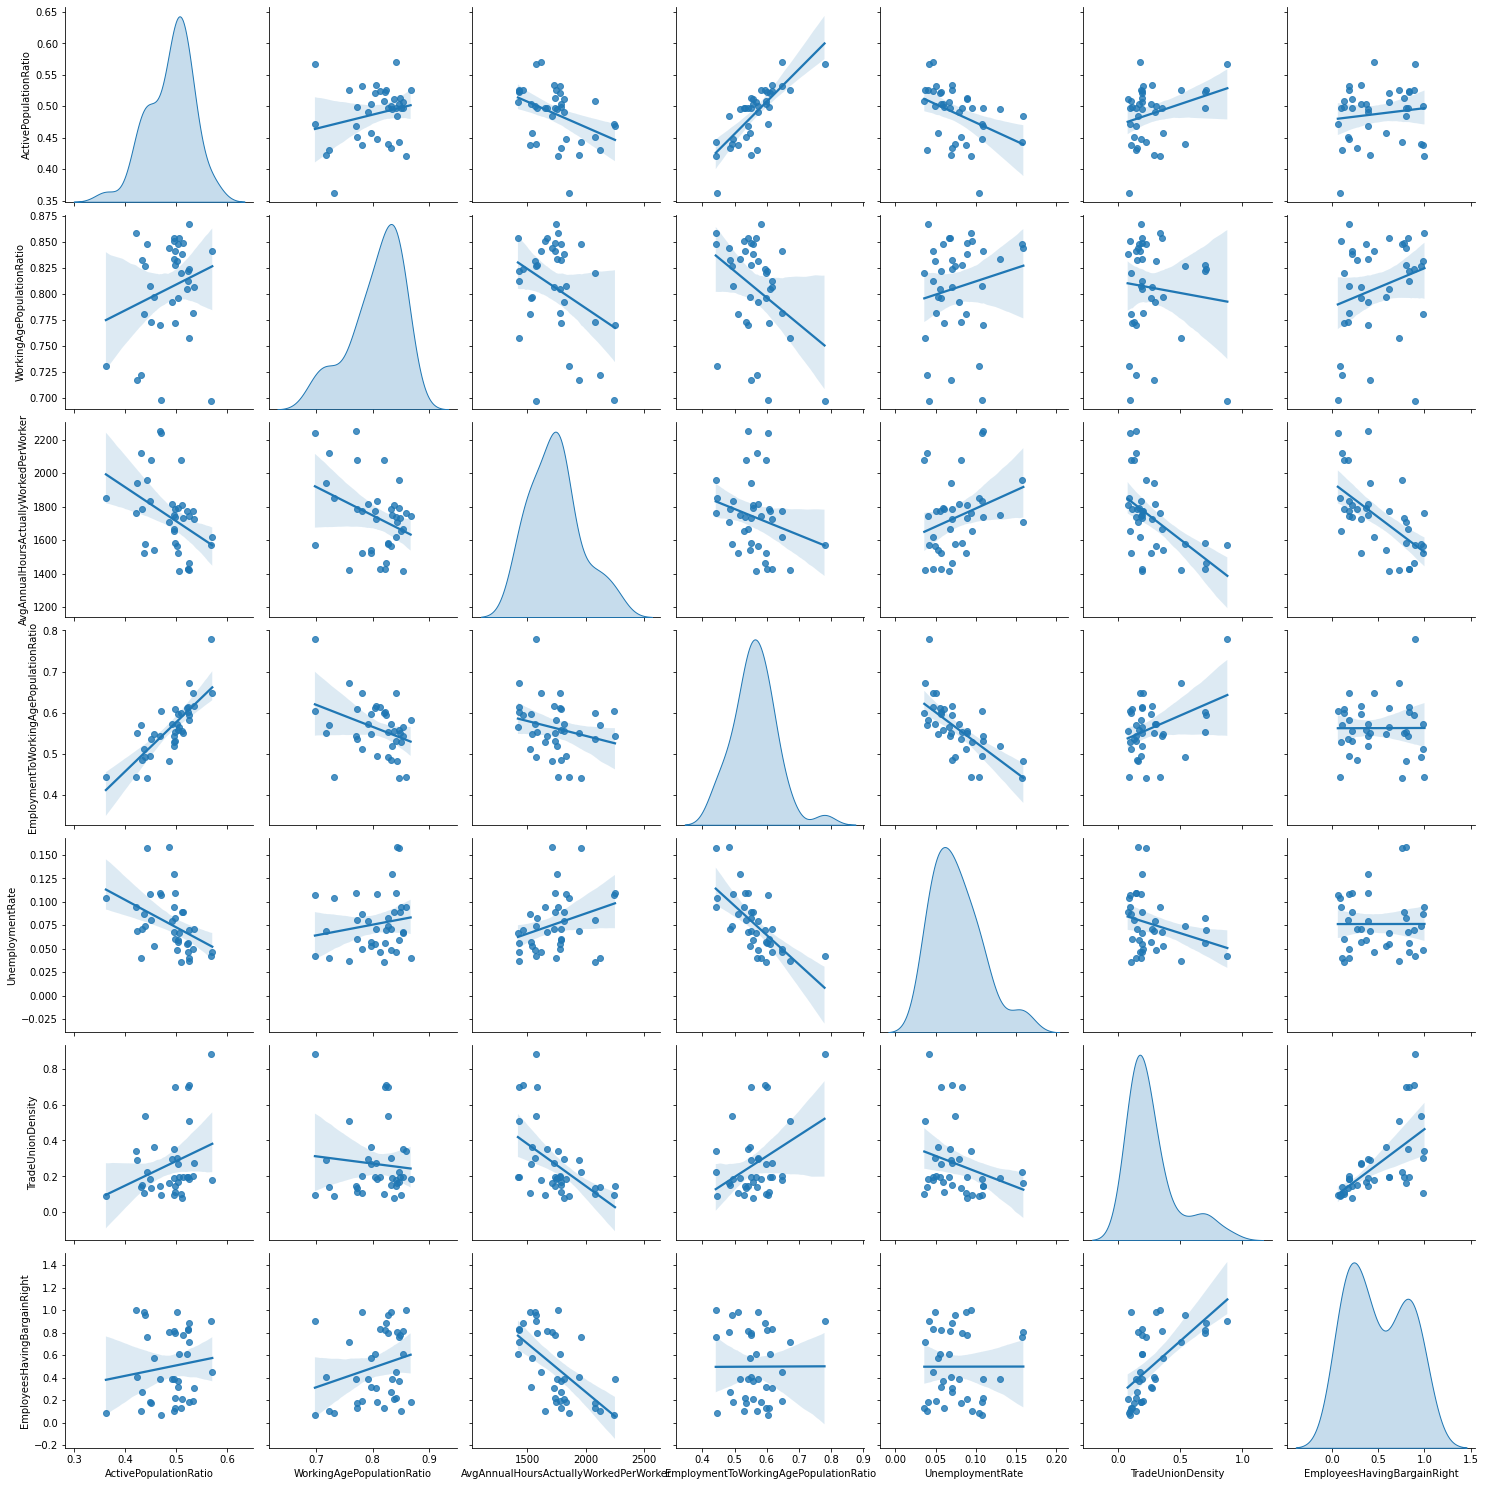

In [71]:
sns.pairplot(data_compressed, kind='reg', diag_kind='kde', height=3)
plt.show()

Множественные коэффициенты корреляции и проверка их значимости

In [72]:
def mult_corr(corr_mx, n_obs):
    '''Calculates multiple correlation coefficients
    and checks wether they are statistically significant or not'''
    mult_corr_list = []
    fisher_obs_list = []
    fisher_crit_list = []
    n_features = len(corr_mx)
    for i in range(n_features):
        r_yx = np.delete(corr_mx.to_numpy()[:, i], obj=i, axis=0)  # вектор R0
        r_xx = np.delete(np.delete(corr_mx.to_numpy(), obj=i, axis=0), obj=i, axis=1)  # матрица R
        mult_corr = float(np.sqrt(np.matmul(np.matmul(r_yx.reshape(1, -1), np.linalg.inv(r_xx)), r_yx.reshape(-1, 1))))
        mult_corr_list.append(mult_corr)
        fisher_obs = (mult_corr ** 2 / (1 - mult_corr ** 2)) * ((n_obs - n_features - 1) / n_features)  # статистика Фишера
        fisher_obs_list.append(fisher_obs)
        fisher_crit = stats.f.ppf(q=1-0.05, dfn=n_features, dfd=n_obs-n_features-1)  # критическое значение статистики Фишера
        fisher_crit_list.append(fisher_crit)
    return mult_corr_list, fisher_obs_list, fisher_crit_list

In [73]:
mult_corr_list, fisher_obs_list, fisher_crit_list = mult_corr(corr_matrix, len(data_compressed))

In [74]:
mult_corr_df = pd.DataFrame({
    'MultCorrCoeff': mult_corr_list,
    'F_obs': fisher_obs_list,
    'F_crit': fisher_crit_list},
    index=['R1_234567', 'R2_134567', 'R3_124567', 'R4_123567', 'R5_123467', 'R6_123457', 'R7_123456']
)
mult_corr_df['Conclusion'] = np.where(mult_corr_df['F_obs'] > mult_corr_df['F_crit'], 'Статистически значим' , 'Не значим статистически')
mult_corr_df

MultCorrCoeff       F_obs    F_crit            Conclusion
R1_234567       0.995378  460.361751  2.334344  Статистически значим
R2_134567       0.989177  194.791016  2.334344  Статистически значим
R3_124567       0.753488    5.629039  2.334344  Статистически значим
R4_123567       0.997071  728.392912  2.334344  Статистически значим
R5_123467       0.959698   49.978371  2.334344  Статистически значим
R6_123457       0.762826    5.964834  2.334344  Статистически значим
R7_123456       0.762816    5.964433  2.334344  Статистически значим

На основе полученных оценок множественных коэффициентов корреляции можем утверждать, что все переменные достаточно сильно коррелируют друг с другом  
При этом практически все переменные являются причиной мультиколлинеарности  
Наибольший множественный коэффициент корреляции соответствует уровню занятости населения. Данный признак выберем в качестве независимой переменной для построения регрессионной зависимости.

Построение регрессионной зависимости

In [75]:
greatest_corr = mult_corr_df[mult_corr_df['MultCorrCoeff'] == mult_corr_df['MultCorrCoeff'].max()].index[0]
greatest_corr_idx = int(greatest_corr.split('_')[0][1]) - 1
greatest_corr = feature_names[greatest_corr_idx]
print('Показатель, которому соответствует наибольший множественный коэффициент корреляции (target): {}'.format(greatest_corr))

Показатель, которому соответствует наибольший множественный коэффициент корреляции (target): Employment to Working Age Population Ratio


In [76]:
import statsmodels.api as sm

In [77]:
y = data_compressed.iloc[:, greatest_corr_idx]
X = data_compressed.drop(y.name, axis=1)

In [78]:
print(X.shape, y.shape)

(38, 6) (38,)


Найдем коэффициенты инфляции дисперсии для всех факторов

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif_threshold = 5
multcor_threshold = 10
vif_list = [variance_inflation_factor(X.values, x_idx) for x_idx in range(X.shape[1])]
vif_conclusion = ['Мультиколлинеарность' if _vif > multcor_threshold else 'Умеренно коллинеарен остальным факторам' if _vif > vif_threshold else 'Не коллинеарен остальным факторам' for _vif in vif_list]
vif = pd.DataFrame({
    'VIF': vif_list,
    'Conclusion': vif_conclusion},
    index=X.columns)
vif

VIF  \
ActivePopulationRatio                  175.930312   
WorkingAgePopulationRatio              244.541351   
AvgAnnualHoursActuallyWorkedPerWorker   68.129782   
UnemploymentRate                        10.910249   
TradeUnionDensity                        5.943965   
EmployeesHavingBargainRight              8.335709   

                                                                    Conclusion  
ActivePopulationRatio                                     Мультиколлинеарность  
WorkingAgePopulationRatio                                 Мультиколлинеарность  
AvgAnnualHoursActuallyWorkedPerWorker                     Мультиколлинеарность  
UnemploymentRate                                          Мультиколлинеарность  
TradeUnionDensity                      Умеренно коллинеарен остальным факторам  
EmployeesHavingBargainRight            Умеренно коллинеарен остальным факторам

In [81]:
print('Средний VIF: {}'.format(vif['VIF'].mean().round(2)))

Средний VIF: 85.63


Имеет место мультиколлинеарность. В среднем дисперсия коэффициентов увеличилась в 85,63

In [82]:
X = sm.add_constant(X)  # adding intercept

In [83]:
lm = sm.OLS(y, X).fit()

In [84]:
print(lm.summary())

                                      OLS Regression Results                                     
Dep. Variable:     EmploymentToWorkingAgePopulationRatio   R-squared:                       0.994
Model:                                               OLS   Adj. R-squared:                  0.993
Method:                                    Least Squares   F-statistic:                     878.1
Date:                                   Fri, 28 Oct 2022   Prob (F-statistic):           3.51e-33
Time:                                           01:47:50   Log-Likelihood:                 147.19
No. Observations:                                     38   AIC:                            -280.4
Df Residuals:                                         31   BIC:                            -268.9
Df Model:                                              6                                         
Covariance Type:                               nonrobust                                         
                    

Как и ожидалось, коэффициенты при переменных $x_6$ и $x_7$ являются статистически незначимыми. Данные переменные необходимо исключить из модели, поскольку они являются квазинеизменными

Построение регрессионной зависимости только на значимых факторах

In [85]:
X_reduced = X.drop([
    'WorkingAgePopulationRatio',  # исключаем x2 из-за того, что в знаменателе x1 присутствует числитель данного показателя (сильная корреляции с x1)
    'AvgAnnualHoursActuallyWorkedPerWorker',  # исключаем x3 из-за незначимости коэффициентов корреляции и коэффициентов модели
    'TradeUnionDensity',  # исключаем x6 из-за квазинеизменности
    'EmployeesHavingBargainRight'],  # исключаем x7 из-за квазинеизменности
    axis=1
)

In [86]:
vif_red_list = [variance_inflation_factor(X_reduced.iloc[:, 1:].values, x_idx) for x_idx in range(X_reduced.iloc[:, 1:].shape[1])]
vif_red_conclusion = ['Мультиколлинеарность' if _vif > multcor_threshold else 'Умеренно коллинеарен остальным факторам' if _vif > vif_threshold else 'Не коллинеарен остальным факторам' for _vif in vif_red_list]
vif_red = pd.DataFrame({
    'VIF': vif_red_list,
    'Conclusion': vif_red_conclusion},
    index=X_reduced.iloc[:, 1:].columns)
vif_red

VIF                               Conclusion
ActivePopulationRatio  5.946053  Умеренно коллинеарен остальным факторам
UnemploymentRate       5.946053  Умеренно коллинеарен остальным факторам

In [87]:
print(X_reduced.shape, y.shape)

(38, 3) (38,)


In [88]:
lm_reduced = sm.OLS(y, X_reduced).fit()

In [89]:
print(lm_reduced.summary())

                                      OLS Regression Results                                     
Dep. Variable:     EmploymentToWorkingAgePopulationRatio   R-squared:                       0.767
Model:                                               OLS   Adj. R-squared:                  0.754
Method:                                    Least Squares   F-statistic:                     57.62
Date:                                   Fri, 28 Oct 2022   Prob (F-statistic):           8.46e-12
Time:                                           01:47:51   Log-Likelihood:                 77.181
No. Observations:                                     38   AIC:                            -148.4
Df Residuals:                                         35   BIC:                            -143.4
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

Необходимо избавиться от эффекта мультиколлинеарности между оставшимися переменными $x_1$ и $x_5$

Перейдем к форме регрессионной модели на центрированных переменных

In [90]:
X_means = X_reduced.drop('const', axis=1).mean()
X_standardized = X_reduced.drop('const', axis=1) - X_means
X_standardized

ActivePopulationRatio  UnemploymentRate
Australia                     0.032556         -0.020970
Austria                       0.012966         -0.027204
Belgium                      -0.048468         -0.001616
Canada                        0.046543         -0.005448
Chile                        -0.036892          0.004743
Colombia                     -0.016947          0.031209
Costa Rica                   -0.019975          0.032994
Czech Republic                0.015005         -0.016989
Denmark                       0.035173         -0.019726
Estonia                       0.023418          0.012837
Finland                       0.009734          0.005904
France                       -0.050172          0.010891
Germany                       0.018153         -0.009545
Greece                       -0.044439          0.080574
Hungary                      -0.054084         -0.005634
Iceland                       0.079380         -0.033924
Ireland                       0.003677          0.003346
Israel                       -0.064775         -0.007067
Italy                        -0.067464          0.017737
Japan                         0.037423         -0.035837
Korea                         0.021088         -0.040317
Latvia                        0.009222          0.033055
Lithuania                     0.008700          0.018634
Luxembourg                   -0.031299         -0.023705
Mexico                       -0.057958         -0.036439
Netherlands                   0.036046         -0.029457
New Zealand                   0.045014         -0.026269
Norway                        0.037991         -0.039870
Poland                       -0.039989          0.031718
Portugal                      0.025008          0.013107
Slovak Republic               0.008326          0.053406
Slovenia                      0.008523         -0.008812
Spain                        -0.002879          0.082574
Sweden                        0.037357         -0.006108
Switzerland                   0.082795         -0.029321
Türkiye                      -0.125796          0.027551
United Kingdom                0.016413         -0.019556
United States                 0.010627         -0.016468

In [91]:
y_mean = y.mean()
y_standardized = y - y_mean
y_standardized

Australia          0.049335
Austria            0.009677
Belgium           -0.069986
Canada             0.054153
Chile             -0.026274
Colombia           0.040456
Costa Rica        -0.020167
Czech Republic    -0.003690
Denmark            0.038017
Estonia           -0.006131
Finland           -0.010361
France            -0.051343
Germany            0.003406
Greece            -0.120644
Hungary           -0.077602
Iceland            0.217238
Ireland            0.009087
Israel            -0.011770
Italy             -0.118383
Japan              0.019193
Korea              0.036579
Latvia            -0.031221
Lithuania         -0.033329
Luxembourg        -0.013448
Mexico             0.008506
Netherlands        0.052578
New Zealand        0.085649
Norway             0.109465
Poland            -0.066779
Portugal          -0.011299
Slovak Republic   -0.044065
Slovenia          -0.019343
Spain             -0.078948
Sweden             0.032822
Switzerland        0.086032
Türkiye           -0

In [92]:
vif_std_list = [variance_inflation_factor(X_standardized.values, x_idx) for x_idx in range(X_standardized.shape[1])]
vif_std_conclusion = ['Мультиколлинеарность' if _vif > multcor_threshold else 'Умеренно коллинеарен остальным факторам' if _vif > vif_threshold else 'Не коллинеарен остальным факторам' for _vif in vif_std_list]
vif_std = pd.DataFrame({
    'VIF': vif_std_list,
    'Conclusion': vif_std_conclusion},
    index=X_standardized.columns)
vif_std

VIF                         Conclusion
ActivePopulationRatio  1.207611  Не коллинеарен остальным факторам
UnemploymentRate       1.207611  Не коллинеарен остальным факторам

In [93]:
print(X_standardized.shape, y_standardized.shape)

(38, 2) (38,)


In [94]:
lm_standardized = sm.OLS(y_standardized, X_standardized).fit()

In [95]:
print(lm_standardized.summary())

                                          OLS Regression Results                                          
Dep. Variable:     EmploymentToWorkingAgePopulationRatio   R-squared (uncentered):                   0.767
Model:                                               OLS   Adj. R-squared (uncentered):              0.754
Method:                                    Least Squares   F-statistic:                              59.27
Date:                                   Fri, 28 Oct 2022   Prob (F-statistic):                    4.08e-12
Time:                                           01:47:52   Log-Likelihood:                          77.181
No. Observations:                                     38   AIC:                                     -150.4
Df Residuals:                                         36   BIC:                                     -147.1
Df Model:                                              2                                                  
Covariance Type:                     

Доверительные интервалы оценок коэффициентов стали более узкими, что свидетельствует об увеличиении точности оценок

С 95%-ой уверенностью можно утверждать, что увеличение доли экономически активного населения в общей численности населения страны на 1 ед. приводит в среднем к росту уровня занятости населения на 0,931 ед., а увеличение уровня безработицы на 1 ед. приводит в среднем к уменьшению уровня занятости населения на 0,919 ед.

Проверка

In [96]:
coefficients = lm_standardized.params
coefficients['Intercept'] = y_mean - (X_means * coefficients).sum()
print('Коэффициенты модели:', coefficients, sep='\n')

Коэффициенты модели:
ActivePopulationRatio    0.930522
UnemploymentRate        -0.919125
Intercept                0.178159
dtype: float64


In [97]:
predictions = coefficients['Intercept'] +\
              coefficients['ActivePopulationRatio'] * X_reduced['ActivePopulationRatio'] +\
              coefficients['UnemploymentRate'] * X_reduced['UnemploymentRate']
predictions

Australia          0.611746
Austria            0.599247
Belgium            0.518563
Canada             0.610494
Chile              0.523489
Colombia           0.517723
Costa Rica         0.513265
Czech Republic     0.591755
Denmark            0.613037
Estonia            0.572170
Finland            0.565809
France             0.505482
Germany            0.587843
Greece             0.446769
Hungary            0.517030
Iceland            0.667223
Ireland            0.562524
Israel             0.508398
Italy              0.483099
Japan              0.629939
Korea              0.618857
Latvia             0.540377
Lithuania          0.553146
Luxembourg         0.554842
Mexico             0.541739
Netherlands        0.622794
New Zealand        0.628209
Norway             0.634174
Poland             0.495814
Portugal           0.573401
Slovak Republic    0.520838
Slovenia           0.578208
Spain              0.483603
Sweden             0.602553
Switzerland        0.666170
Türkiye            0

In [98]:
residuals = y - predictions

In [99]:
rss = (residuals ** 2).sum()
tss = ((y - y_mean) ** 2).sum()
r_squared = 1 - rss / tss
print('Коэффициент детерминации модели: {:.3f}'.format(r_squared))

Коэффициент детерминации модели: 0.767


## Анализ главных компонент

Проведем анализ главных компонент пошагово, применяя разложение матрицы парных корреляций признаков на матрицу собственных векторов и матрицу собственных значений

In [100]:
corr_matrix

ActivePopulationRatio  \
ActivePopulationRatio                               1.000000   
WorkingAgePopulationRatio                           0.234660   
AvgAnnualHoursActuallyWorkedPerWorker              -0.405146   
EmploymentToWorkingAgePopulationRatio               0.786032   
UnemploymentRate                                   -0.414631   
TradeUnionDensity                                   0.301265   
EmployeesHavingBargainRight                         0.129224   

                                       WorkingAgePopulationRatio  \
ActivePopulationRatio                                   0.234660   
WorkingAgePopulationRatio                               1.000000   
AvgAnnualHoursActuallyWorkedPerWorker                  -0.357452   
EmploymentToWorkingAgePopulationRatio                  -0.369420   
UnemploymentRate                                        0.170342   
TradeUnionDensity                                      -0.094356   
EmployeesHavingBargainRight                             0.253268   

                                       AvgAnnualHoursActuallyWorkedPerWorker  \
ActivePopulationRatio                                              -0.405146   
WorkingAgePopulationRatio                                          -0.357452   
AvgAnnualHoursActuallyWorkedPerWorker                               1.000000   
EmploymentToWorkingAgePopulationRatio                              -0.237225   
UnemploymentRate                                                    0.306515   
TradeUnionDensity                                                  -0.518671   
EmployeesHavingBargainRight                                        -0.599385   

                                       EmploymentToWorkingAgePopulationRatio  \
ActivePopulationRatio                                               0.786032   
WorkingAgePopulationRatio                                          -0.369420   
AvgAnnualHoursActuallyWorkedPerWorker                              -0.237225   
EmploymentToWorkingAgePopulationRatio                               1.000000   
UnemploymentRate                                                   -0.677401   
TradeUnionDensity                                                   0.391132   
EmployeesHavingBargainRight                                         0.003098   

                                       UnemploymentRate  TradeUnionDensity  \
ActivePopulationRatio                         -0.414631           0.301265   
WorkingAgePopulationRatio                      0.170342          -0.094356   
AvgAnnualHoursActuallyWorkedPerWorker          0.306515          -0.518671   
EmploymentToWorkingAgePopulationRatio         -0.677401           0.391132   
UnemploymentRate                               1.000000          -0.269201   
TradeUnionDensity                             -0.269201           1.000000   
EmployeesHavingBargainRight                    0.001162           0.615325   

                                       EmployeesHavingBargainRight  
ActivePopulationRatio                                     0.129224  
WorkingAgePopulationRatio                                 0.253268  
AvgAnnualHoursActuallyWorkedPerWorker                    -0.599385  
EmploymentToWorkingAgePopulationRatio                     0.003098  
UnemploymentRate                                          0.001162  
TradeUnionDensity                                         0.615325  
EmployeesHavingBargainRight                               1.000000

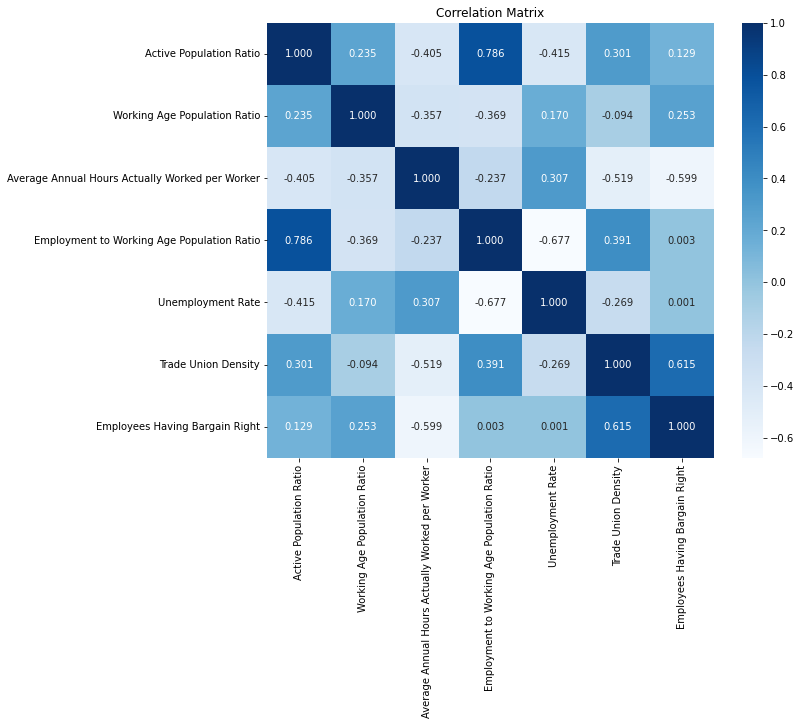

In [101]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, xticklabels=feature_names, yticklabels=feature_names, annot=True, fmt='.3f', cmap='Blues')
plt.show()

In [102]:
components_labels = ['PC' + str(i + 1) for i in range(n_features)]
components_labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

Собственные значения и собственные векторы матрицы парных корреляций

In [103]:
eigenvalues, eigenvectors = np.linalg.eigh(corr_matrix)

In [104]:
print('Собственные значения:\n', eigenvalues.round(3), end='\n\n')
print('Собственные векторы (матрица W весов главных компонент):\n', pd.DataFrame(eigenvectors).round(3))

Собственные значения:
 [0.003 0.261 0.293 0.569 1.107 1.847 2.922]

Собственные векторы (матрица W весов главных компонент):
        0      1      2      3      4      5      6
0 -0.567  0.068 -0.005  0.478  0.477  0.135 -0.446
1  0.368 -0.150  0.398 -0.071  0.647 -0.509 -0.033
2 -0.001  0.202  0.730  0.337 -0.063  0.357  0.426
3  0.714  0.153 -0.101  0.234  0.045  0.445 -0.449
4  0.182 -0.098 -0.374  0.742 -0.066 -0.344  0.379
5 -0.018 -0.619  0.363  0.204 -0.485 -0.164 -0.425
6 -0.012  0.718  0.162  0.072 -0.329 -0.502 -0.304


Првоерим выполнение некоторых свойств и ограничений

In [105]:
# проверка: сумма собственных значений λi = числу собственных значений λi
print('Сумма собственных значений матрицы парных корреляций ({}) = числу собственных значений ({})'.format(sum(eigenvalues).round(0), n_features))

Сумма собственных значений матрицы парных корреляций (7.0) = числу собственных значений (7)


In [106]:
# проверка (ортогональность матрицы W): W * W' = W' * W = E
print('W * W\':\n', pd.DataFrame(eigenvectors @ eigenvectors.T).round(5), end='\n\n')
print('W\' * W:\n', pd.DataFrame(eigenvectors.T @ eigenvectors).round(5))

W * W':
      0    1    2    3    4    5    6
0  1.0  0.0  0.0 -0.0  0.0 -0.0 -0.0
1  0.0  1.0 -0.0 -0.0 -0.0 -0.0  0.0
2  0.0 -0.0  1.0  0.0  0.0  0.0 -0.0
3 -0.0 -0.0  0.0  1.0 -0.0  0.0 -0.0
4  0.0 -0.0  0.0 -0.0  1.0  0.0  0.0
5 -0.0 -0.0  0.0  0.0  0.0  1.0 -0.0
6 -0.0  0.0 -0.0 -0.0  0.0 -0.0  1.0

W' * W:
      0    1    2    3    4    5    6
0  1.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0
1 -0.0  1.0 -0.0 -0.0 -0.0 -0.0 -0.0
2 -0.0 -0.0  1.0  0.0 -0.0 -0.0 -0.0
3 -0.0 -0.0  0.0  1.0 -0.0  0.0  0.0
4 -0.0 -0.0 -0.0 -0.0  1.0 -0.0 -0.0
5  0.0 -0.0 -0.0  0.0 -0.0  1.0  0.0
6 -0.0 -0.0 -0.0  0.0 -0.0  0.0  1.0


In [107]:
# проверка (ортогональность матрицы W): W' = W^(-1)
eigenvectors_inv = np.linalg.inv(eigenvectors)
print('W\':\n', pd.DataFrame(eigenvectors.T).round(3), end='\n\n')
print('Матрица факторных нагрузок W^(-1):\n', pd.DataFrame(eigenvectors_inv).round(3))

W':
        0      1      2      3      4      5      6
0 -0.567  0.368 -0.001  0.714  0.182 -0.018 -0.012
1  0.068 -0.150  0.202  0.153 -0.098 -0.619  0.718
2 -0.005  0.398  0.730 -0.101 -0.374  0.363  0.162
3  0.478 -0.071  0.337  0.234  0.742  0.204  0.072
4  0.477  0.647 -0.063  0.045 -0.066 -0.485 -0.329
5  0.135 -0.509  0.357  0.445 -0.344 -0.164 -0.502
6 -0.446 -0.033  0.426 -0.449  0.379 -0.425 -0.304

Матрица факторных нагрузок W^(-1):
        0      1      2      3      4      5      6
0 -0.567  0.368 -0.001  0.714  0.182 -0.018 -0.012
1  0.068 -0.150  0.202  0.153 -0.098 -0.619  0.718
2 -0.005  0.398  0.730 -0.101 -0.374  0.363  0.162
3  0.478 -0.071  0.337  0.234  0.742  0.204  0.072
4  0.477  0.647 -0.063  0.045 -0.066 -0.485 -0.329
5  0.135 -0.509  0.357  0.445 -0.344 -0.164 -0.502
6 -0.446 -0.033  0.426 -0.449  0.379 -0.425 -0.304


Матрица собственных векторов W является ортогональной матрицей перехода в собственный базис, а сами собственные вектора (столбцы матрицы W) образуют систему ортонормированных векторов

In [108]:
# проверка: симметрическая матрица парных корреляций R положительно определена
def is_positive_defined(matrix):
    return all(np.linalg.eigvals(matrix) > 0)

is_positive_defined(corr_matrix)

True

In [109]:
# проверка: W' * R * W = Λ
eigenvalues_matix = np.diag(eigenvalues)
print('Матрица собственных значений Λ:\n{}'.format(pd.DataFrame(eigenvalues_matix).round(3)), end='\n\n')
print('W\' * R * W:\n', pd.DataFrame(eigenvectors.T @ corr_matrix @ eigenvectors).round(3))

Матрица собственных значений Λ:
       0      1      2      3      4      5      6
0  0.003  0.000  0.000  0.000  0.000  0.000  0.000
1  0.000  0.261  0.000  0.000  0.000  0.000  0.000
2  0.000  0.000  0.293  0.000  0.000  0.000  0.000
3  0.000  0.000  0.000  0.569  0.000  0.000  0.000
4  0.000  0.000  0.000  0.000  1.107  0.000  0.000
5  0.000  0.000  0.000  0.000  0.000  1.847  0.000
6  0.000  0.000  0.000  0.000  0.000  0.000  2.922

W' * R * W:
        0      1      2      3      4      5      6
0  0.003 -0.000 -0.000  0.000  0.000 -0.000 -0.000
1  0.000  0.261 -0.000 -0.000  0.000 -0.000  0.000
2 -0.000 -0.000  0.293  0.000 -0.000 -0.000 -0.000
3  0.000 -0.000  0.000  0.569 -0.000  0.000  0.000
4  0.000 -0.000 -0.000  0.000  1.107 -0.000 -0.000
5 -0.000 -0.000 -0.000  0.000 -0.000  1.847  0.000
6 -0.000 -0.000 -0.000  0.000 -0.000  0.000  2.922


In [110]:
# проверка: W * Λ * W' = R
eigenvalues_matix = np.diag(eigenvalues)
print('Матрица парных корреляций R:\n{}'.format(pd.DataFrame(np.array(corr_matrix)).round(3)), end='\n\n')
print('W * Λ * W\':\n', pd.DataFrame(eigenvectors @ eigenvalues_matix @ eigenvectors.T).round(3))

Матрица парных корреляций R:
       0      1      2      3      4      5      6
0  1.000  0.235 -0.405  0.786 -0.415  0.301  0.129
1  0.235  1.000 -0.357 -0.369  0.170 -0.094  0.253
2 -0.405 -0.357  1.000 -0.237  0.307 -0.519 -0.599
3  0.786 -0.369 -0.237  1.000 -0.677  0.391  0.003
4 -0.415  0.170  0.307 -0.677  1.000 -0.269  0.001
5  0.301 -0.094 -0.519  0.391 -0.269  1.000  0.615
6  0.129  0.253 -0.599  0.003  0.001  0.615  1.000

W * Λ * W':
        0      1      2      3      4      5      6
0  1.000  0.235 -0.405  0.786 -0.415  0.301  0.129
1  0.235  1.000 -0.357 -0.369  0.170 -0.094  0.253
2 -0.405 -0.357  1.000 -0.237  0.307 -0.519 -0.599
3  0.786 -0.369 -0.237  1.000 -0.677  0.391  0.003
4 -0.415  0.170  0.307 -0.677  1.000 -0.269  0.001
5  0.301 -0.094 -0.519  0.391 -0.269  1.000  0.615
6  0.129  0.253 -0.599  0.003  0.001  0.615  1.000


Вклад компонент в суммарную дисперсию

In [111]:
pca_variance = pd.Series(eigenvalues).sort_values(ascending=False)  # дисперсии по новому базису (главным компонентам)
pca_variance.index = components_labels
pca_variance.round(3)

PC1    2.922
PC2    1.847
PC3    1.107
PC4    0.569
PC5    0.293
PC6    0.261
PC7    0.003
dtype: float64

Согласно критерию Кайзера, достаточно оставить 3 первые компоненты.

In [112]:
pca_var_sum = pca_variance.sum()
pca_var_ratio = pca_variance / pca_var_sum * 100  # вклад компонент в суммарную дисперсию
pca_var_ratio.round(3)

PC1    41.739
PC2    26.379
PC3    15.814
PC4     8.122
PC5     4.179
PC6     3.724
PC7     0.043
dtype: float64

In [113]:
pca_var_cumulative = pca_variance.cumsum() / pca_var_sum * 100
pca_var_cumulative

PC1     41.739058
PC2     68.118268
PC3     83.932065
PC4     92.054116
PC5     96.233458
PC6     99.957329
PC7    100.000000
dtype: float64

Определение значимых компонент (критерий Кэттелла и дисперсионный критерий)

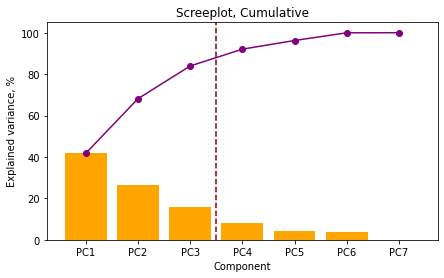

In [114]:
plt.figure(figsize=(7, 4))
plt.title('Screeplot, Cumulative')
plt.bar(pca_var_ratio.index, pca_var_ratio, color='orange')
plt.plot(pca_var_cumulative.index, pca_var_cumulative, marker='o', color='purple')
plt.axvline(x=2.5, c='darkred', ls='--')
plt.xlabel('Component')
plt.ylabel('Explained variance, %')
plt.show()

In [115]:
threshold = 85

In [116]:
signif_componetns = pca_var_cumulative[pca_var_cumulative <= threshold].index.tolist()
signif_componetns

['PC1', 'PC2', 'PC3']

Матрица весов главных компонент

In [117]:
pca_result = pd.DataFrame(eigenvectors.T, columns=feature_names)
pca_result.insert(0, 'explained_var', eigenvalues)
pca_result = pca_result.sort_values(by='explained_var', ascending=False)  # компоненты упорядочены по величине объясненной дисперсии
pca_result.index = components_labels
pca_result.round(3)

explained_var  Active Population Ratio  Working Age Population Ratio  \
PC1          2.922                   -0.446                        -0.033   
PC2          1.847                    0.135                        -0.509   
PC3          1.107                    0.477                         0.647   
PC4          0.569                    0.478                        -0.071   
PC5          0.293                   -0.005                         0.398   
PC6          0.261                    0.068                        -0.150   
PC7          0.003                   -0.567                         0.368   

     Average Annual Hours Actually Worked per Worker  \
PC1                                            0.426   
PC2                                            0.357   
PC3                                           -0.063   
PC4                                            0.337   
PC5                                            0.730   
PC6                                            0.202   
PC7                                           -0.001   

     Employment to Working Age Population Ratio  Unemployment Rate  \
PC1                                      -0.449              0.379   
PC2                                       0.445             -0.344   
PC3                                       0.045             -0.066   
PC4                                       0.234              0.742   
PC5                                      -0.101             -0.374   
PC6                                       0.153             -0.098   
PC7                                       0.714              0.182   

     Trade Union Density  Employees Having Bargain Right  
PC1               -0.425                          -0.304  
PC2               -0.164                          -0.502  
PC3               -0.485                          -0.329  
PC4                0.204                           0.072  
PC5                0.363                           0.162  
PC6               -0.619                           0.718  
PC7               -0.018                          -0.012

In [118]:
pca_weights = pca_result[feature_names]  # веса линейных комбинаций, позволяющие преобразовывать предсказатели в компоненты - смещение от среднего
pca_weights.round(3)

Active Population Ratio  Working Age Population Ratio  \
PC1                   -0.446                        -0.033   
PC2                    0.135                        -0.509   
PC3                    0.477                         0.647   
PC4                    0.478                        -0.071   
PC5                   -0.005                         0.398   
PC6                    0.068                        -0.150   
PC7                   -0.567                         0.368   

     Average Annual Hours Actually Worked per Worker  \
PC1                                            0.426   
PC2                                            0.357   
PC3                                           -0.063   
PC4                                            0.337   
PC5                                            0.730   
PC6                                            0.202   
PC7                                           -0.001   

     Employment to Working Age Population Ratio  Unemployment Rate  \
PC1                                      -0.449              0.379   
PC2                                       0.445             -0.344   
PC3                                       0.045             -0.066   
PC4                                       0.234              0.742   
PC5                                      -0.101             -0.374   
PC6                                       0.153             -0.098   
PC7                                       0.714              0.182   

     Trade Union Density  Employees Having Bargain Right  
PC1               -0.425                          -0.304  
PC2               -0.164                          -0.502  
PC3               -0.485                          -0.329  
PC4                0.204                           0.072  
PC5                0.363                           0.162  
PC6               -0.619                           0.718  
PC7               -0.018                          -0.012

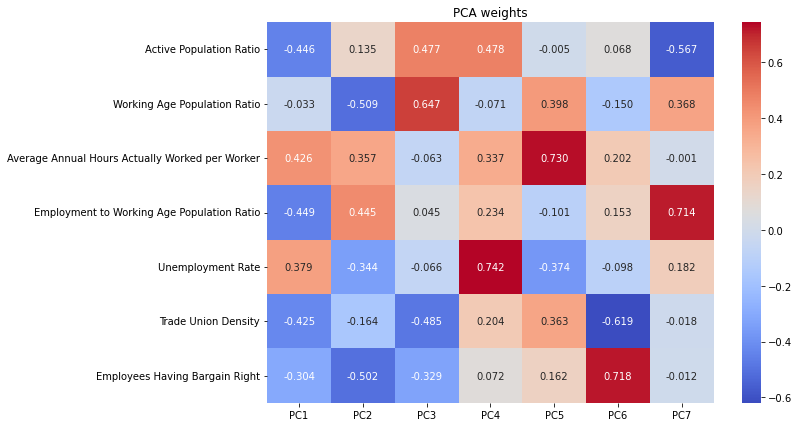

In [119]:
plt.figure(figsize=(10, 7))
plt.title('PCA weights')
sns.heatmap(pca_weights.T, xticklabels=components_labels, yticklabels=feature_names, annot=True, fmt='.3f', cmap='coolwarm')
plt.show()

Признаки, имеющие наибольшее влияние на каждую компоненту

In [120]:
most_influence = [feature_names[np.abs(pca_weights.iloc[i, :]).argmax()] for i in range(n_features)]
most_influence = dict(zip(components_labels, most_influence))
most_influence  # признаки, имеющие наибольшее влияние на каждую компоненту (направления компонент в сторону соответствующих признаков)

{'PC1': 'Employment to Working Age Population Ratio',
 'PC2': 'Working Age Population Ratio',
 'PC3': 'Working Age Population Ratio',
 'PC4': 'Unemployment Rate',
 'PC5': 'Average Annual Hours Actually Worked per Worker',
 'PC6': 'Employees Having Bargain Right',
 'PC7': 'Employment to Working Age Population Ratio'}

Оценки значений главных компонент

In [121]:
data_std = (data_compressed - data_compressed.mean()) / data_compressed.std()
data_std

ActivePopulationRatio  WorkingAgePopulationRatio  \
Australia                     0.745022                  -0.028749   
Austria                       0.296726                   0.559887   
Belgium                      -1.109175                   0.447810   
Canada                        1.065110                   0.005209   
Chile                        -0.844264                  -0.714681   
Colombia                     -0.387835                  -2.332551   
Costa Rica                   -0.457114                  -0.788413   
Czech Republic                0.343384                   0.903828   
Denmark                       0.804910                   0.343556   
Estonia                       0.535918                   0.706142   
Finland                       0.222768                   0.481133   
France                       -1.148160                  -0.556021   
Germany                       0.415424                   1.039244   
Greece                       -1.016967                   0.903537   
Hungary                      -1.237690                   0.582571   
Iceland                       1.816592                  -2.351889   
Ireland                       0.084141                  -0.298633   
Israel                       -1.482356                  -1.928669   
Italy                        -1.543889                   1.142642   
Japan                         0.856413                   1.334129   
Korea                         0.482591                   0.298391   
Latvia                        0.211043                   0.752675   
Lithuania                     0.199093                   0.966030   
Luxembourg                   -0.716256                  -0.205438   
Mexico                       -1.326341                  -1.821647   
Netherlands                   0.824893                   0.148002   
New Zealand                   1.030123                  -0.526237   
Norway                        0.869413                  -1.050055   
Poland                       -0.915131                   0.029894   
Portugal                      0.572296                   0.927915   
Slovak Republic               0.190527                   0.606266   
Slovenia                      0.195055                   1.026411   
Spain                        -0.065896                   0.815500   
Sweden                        0.854899                   0.378120   
Switzerland                   1.894731                   0.772729   
Türkiye                      -2.878790                  -1.630783   
United Kingdom                0.375596                  -0.206322   
United States                 0.243196                  -0.731532   

                 AvgAnnualHoursActuallyWorkedPerWorker  \
Australia                                     0.174894   
Austria                                      -0.784552   
Belgium                                      -0.740602   
Canada                                       -0.058890   
Chile                                         1.557278   
Colombia                                      2.299988   
Costa Rica                                    2.343382   
Czech Republic                                0.234562   
Denmark                                      -1.430245   
Estonia                                       0.337049   
Finland                                      -0.700411   
France                                       -0.991017   
Germany                                      -1.464246   
Greece                                        1.021693   
Hungary                                       0.220987   
Iceland                                      -0.768483   
Ireland                                       0.350181   
Israel                                        0.932273   
Italy                                         0.113957   
Japan                                         0.015956   
Korea                                         1.563747   
Latvia                                       -0.0

In [122]:
pca_weights.T  # матрица W

PC1       PC2       PC3  \
Active Population Ratio                         -0.446391  0.135029  0.477241   
Working Age Population Ratio                    -0.032828 -0.508729  0.647021   
Average Annual Hours Actually Worked per Worker  0.425583  0.356874 -0.062805   
Employment to Working Age Population Ratio      -0.449422  0.445131  0.044711   
Unemployment Rate                                0.379058 -0.344055 -0.065679   
Trade Union Density                             -0.425035 -0.163875 -0.484983   
Employees Having Bargain Right                  -0.303670 -0.502227 -0.328844   

                                                      PC4       PC5       PC6  \
Active Population Ratio                          0.477892 -0.005308  0.067768   
Working Age Population Ratio                    -0.070787  0.398349 -0.149971   
Average Annual Hours Actually Worked per Worker  0.337410  0.730005  0.202041   
Employment to Working Age Population Ratio       0.234164 -0.101091  0.152870   
Unemployment Rate                                0.742312 -0.374185 -0.097724   
Trade Union Density                              0.204127  0.363171 -0.619191   
Employees Having Bargain Right                   0.072358  0.162034  0.718177   

                                                      PC7  
Active Population Ratio                         -0.567223  
Working Age Population Ratio                     0.367826  
Average Annual Hours Actually Worked per Worker -0.001232  
Employment to Working Age Population Ratio       0.713763  
Unemployment Rate                                0.181758  
Trade Union Density                             -0.017961  
Employees Having Bargain Right                  -0.012004

In [123]:
print(data_std.shape, pca_weights.T.shape)

(38, 7) (7, 7)


In [124]:
pca_scores = np.matmul(data_std, np.array(pca_weights.T))  # объясняющие переменные, преобразованные с учетом весов в главных компонентах
pca_scores.index = OECD_countries
pca_scores.columns = components_labels
pca_scores

PC1       PC2       PC3       PC4       PC5       PC6  \
Australia       -0.805562  0.614914  0.458876  0.037001  0.219859  0.762643   
Austria         -1.426043 -0.955367  0.027375 -0.637429  0.277625  0.877900   
Belgium         -0.404797 -2.051421 -1.376795 -0.713692  0.499452 -0.230154   
Canada          -0.760244  0.836507  0.749933  0.508072 -0.152522 -0.232213   
Chile            1.901153  1.203861 -0.321498 -0.019403  0.423852 -0.022399   
Colombia         2.127034  2.711951 -1.004659  1.374159 -0.226641  0.324879   
Costa Rica       2.134098  0.945363 -0.549463  1.203071  0.750589  0.541231   
Czech Republic   0.068207  0.122929  1.143486 -0.374470  0.494726 -0.006477   
Denmark         -2.718140 -0.983684 -0.632118  0.053952  0.227718 -0.725833   
Estonia          0.764505  0.262072  1.424487  0.346025 -0.118360 -0.112506   
Finland         -1.481721 -1.435221 -0.922819  0.453340  0.564600 -0.894841   
France           0.470530 -1.327211 -1.011594 -0.817153 -1.041372  1.260734   
Germany         -0.938020 -0.989188  1.043324 -0.635911 -0.620531  0.105013   
Greece           2.502714 -2.321993 -0.387987  1.330646  0.371992  0.200195   
Hungary          1.541333 -0.390522  0.244825 -1.135711  0.261862 -0.436095   
Iceland         -4.646029  1.848334 -2.308742  1.444190 -0.094302 -0.069681   
Ireland          0.144097  0.465838 -0.133481  0.297804  0.079975 -0.221174   
Israel           1.157259  1.242083 -1.962590 -0.468555  0.015222  0.099854   
Italy            1.074636 -2.600744 -0.826443 -0.577372  0.903546  0.337527   
Japan           -0.507375  0.541741  1.893366 -0.635052  0.629904 -0.435910   
Korea            0.404651  1.886405  1.222492 -0.361066  1.201116  0.198624   
Latvia           1.030780 -0.387034  1.093066  0.539478 -0.434528 -0.526590   
Lithuania        0.925980 -0.255439  1.524572 -0.043079 -0.600076 -0.707576   
Luxembourg      -0.545422 -0.350837 -0.694597 -1.136837 -0.217289 -0.269385   
Mexico           1.544608  2.572777 -1.119999 -0.979372  0.564294  0.167266   
Netherlands     -1.850521 -0.255173  0.510837 -0.617233 -0.660085  0.955672   
New Zealand     -0.831651  1.882597  0.733994  0.119532 -0.173075 -0.040715   
Norway          -2.920591  0.764355 -0.834695 -0.272411 -0.596211  0.063018   
Poland           1.909488 -0.217474 -0.027862  0.078581 -0.267082 -0.694419   
Portugal        -0.168525 -1.009131  0.728525  0.464809  0.216626  0.696214   
Slovak Republic  1.151742 -0.906282  0.640848  1.099170 -0.491126 -0.353523   
Slovenia        -0.726987 -1.223967  0.245509 -0.212010  0.620460  0.245821   
Spain            1.430936 -2.321210  0.222006  1.536608 -0.701215  0.438687   
Sweden          -2.553628 -1.230450 -0.721662  0.467077  0.256336 -0.646974   
Switzerland     -1.805451  0.719007  1.828204  0.158502 -0.063110  0.370826   
Türkiye          3.485711  0.341770 -1.728045 -1.112545 -0.945183 -0.584230   
United Kingdom  -0.870495  0.561214  0.369299 -0.523857 -0.705000 -0.410110   
United States    0.191738  1.688630  0.460023 -0.238858 -0.472045 -0.025299   

                      PC7  
Australia       -0.026801  
Austria         -0.040007  
Belgium         -0.006183  
Canada          -0.047627  
Chile           -0.014650  
Colombia         0.008801  
Costa Rica      -0.039618  
Czech Republic   0.011397  
Denmark         -0.089326  
Estonia         -0.006363  
Finland         -0.074988  
France          -0.041277  
Germany          0.130745  
Greece           0.085633  
Hungary          0.070643  
Iceland          0.160525  
Ireland         -0.039420  
Israel          -0.035924  
Italy            0.107097  
Japan            0.018419  
Korea            0.016668  
Latvia           0.039935  
Lithuania        0.026976  
Luxembourg       0.036100  
Mexico          -0.017561  
Netherlands     -0.028566  
New Zealand      0.001586  
Norway           0.028959  
Poland           0.021157  
Portugal        -0.030833  
Slovak Republic -0.030424  
Slovenia        -0.011619  
Spain           

In [125]:
pca_scores.describe().round(3)

PC1     PC2     PC3     PC4     PC5     PC6     PC7
count  38.000  38.000  38.000  38.000  38.000  38.000  38.000
mean   -0.000   0.000  -0.000   0.000  -0.000   0.000  -0.000
std     1.709   1.359   1.052   0.754   0.541   0.511   0.055
min    -4.646  -2.601  -2.309  -1.137  -1.041  -0.895  -0.089
25%    -0.861  -0.988  -0.800  -0.607  -0.463  -0.396  -0.035
50%     0.106  -0.047   0.125  -0.031  -0.024  -0.024  -0.013
75%     1.156   0.818   0.733   0.462   0.411   0.305   0.020
max     3.486   2.712   1.893   1.537   1.201   1.261   0.161

Главные компоненты не являются стандартизированными величинами.

In [126]:
print('Матрица парных корреляций главных компонент:')
pca_scores.corr().round(3)

Матрица парных корреляций главных компонент:


PC1  PC2  PC3  PC4  PC5  PC6  PC7
PC1  1.0  0.0 -0.0  0.0 -0.0  0.0 -0.0
PC2  0.0  1.0 -0.0  0.0 -0.0 -0.0 -0.0
PC3 -0.0 -0.0  1.0  0.0  0.0  0.0  0.0
PC4  0.0  0.0  0.0  1.0 -0.0 -0.0  0.0
PC5 -0.0 -0.0  0.0 -0.0  1.0 -0.0  0.0
PC6  0.0 -0.0  0.0 -0.0 -0.0  1.0  0.0
PC7 -0.0 -0.0  0.0  0.0  0.0  0.0  1.0

Как видим, главные компоненты ортогональны друг другу

In [127]:
comp_cov_matrix = pca_scores.cov()
print('Ковариационная матрица главных компонент Σpca = λ:\n', comp_cov_matrix.round(3), end='\n\n')

Ковариационная матрица главных компонент Σpca = λ:
        PC1    PC2    PC3    PC4    PC5    PC6    PC7
PC1  2.922  0.000 -0.000  0.000 -0.000  0.000 -0.000
PC2  0.000  1.847 -0.000  0.000 -0.000 -0.000 -0.000
PC3 -0.000 -0.000  1.107  0.000 -0.000  0.000  0.000
PC4  0.000  0.000  0.000  0.569 -0.000 -0.000  0.000
PC5 -0.000 -0.000 -0.000 -0.000  0.293 -0.000  0.000
PC6  0.000 -0.000  0.000 -0.000 -0.000  0.261  0.000
PC7 -0.000 -0.000  0.000  0.000  0.000  0.000  0.003



In [128]:
print('W * R * W\':\n', (eigenvectors @ corr_matrix @ eigenvectors.T).round(3))

W * R * W':
        0      1      2      3      4      5      6
0  0.396  0.468 -0.122 -0.337 -0.492  0.328 -0.014
1  0.468  1.176 -0.158 -0.483 -0.683  0.223  0.406
2 -0.122 -0.158  0.404  0.221  0.186  0.061 -0.272
3 -0.337 -0.483  0.221  1.204  0.884  0.098 -0.013
4 -0.492 -0.683  0.186  0.884  1.132  0.071 -0.230
5  0.328  0.223  0.061  0.098  0.071  1.726  0.078
6 -0.014  0.406 -0.272 -0.013 -0.230  0.078  0.961


In [129]:
# проверка: |W * R * W'| = |Σpca| = |R|
print('Определитель матрицы W * R * W\': {:.6f}'.format(np.linalg.det(eigenvectors @ corr_matrix @ eigenvectors.T)))
print('Определитель ковариационной матрицы (обобщенная дисперсия) главных компонент: {:.6f}'.format(np.linalg.det(comp_cov_matrix)))
print('Определитель матрицы парных корреляций исходных данных: {:.6f}'.format(np.linalg.det(corr_matrix)))
print('Определитель матрицы λ: {:.6f}'.format(np.linalg.det(eigenvalues_matix)))

Определитель матрицы W * R * W': 0.000773
Определитель ковариационной матрицы (обобщенная дисперсия) главных компонент: 0.000773
Определитель матрицы парных корреляций исходных данных: 0.000773
Определитель матрицы λ: 0.000773


In [130]:
# проверка: tr(Σpca) = tr(R)
print('След ковариационной матрицы главных компонент Σpca: {:.1f}'.format(np.trace(comp_cov_matrix)))
print('След матрицы парных корреляций исходных данных: {:.1f}'.format(np.trace(corr_matrix)))

След ковариационной матрицы главных компонент Σpca: 7.0
След матрицы парных корреляций исходных данных: 7.0


Значимые главные компоненты

In [131]:
pca_components_scaled = pca_scores[signif_componetns]
pca_components_scaled

PC1       PC2       PC3
Australia       -0.805562  0.614914  0.458876
Austria         -1.426043 -0.955367  0.027375
Belgium         -0.404797 -2.051421 -1.376795
Canada          -0.760244  0.836507  0.749933
Chile            1.901153  1.203861 -0.321498
Colombia         2.127034  2.711951 -1.004659
Costa Rica       2.134098  0.945363 -0.549463
Czech Republic   0.068207  0.122929  1.143486
Denmark         -2.718140 -0.983684 -0.632118
Estonia          0.764505  0.262072  1.424487
Finland         -1.481721 -1.435221 -0.922819
France           0.470530 -1.327211 -1.011594
Germany         -0.938020 -0.989188  1.043324
Greece           2.502714 -2.321993 -0.387987
Hungary          1.541333 -0.390522  0.244825
Iceland         -4.646029  1.848334 -2.308742
Ireland          0.144097  0.465838 -0.133481
Israel           1.157259  1.242083 -1.962590
Italy            1.074636 -2.600744 -0.826443
Japan           -0.507375  0.541741  1.893366
Korea            0.404651  1.886405  1.222492
Latvia           1.030780 -0.387034  1.093066
Lithuania        0.925980 -0.255439  1.524572
Luxembourg      -0.545422 -0.350837 -0.694597
Mexico           1.544608  2.572777 -1.119999
Netherlands     -1.850521 -0.255173  0.510837
New Zealand     -0.831651  1.882597  0.733994
Norway          -2.920591  0.764355 -0.834695
Poland           1.909488 -0.217474 -0.027862
Portugal        -0.168525 -1.009131  0.728525
Slovak Republic  1.151742 -0.906282  0.640848
Slovenia        -0.726987 -1.223967  0.245509
Spain            1.430936 -2.321210  0.222006
Sweden          -2.553628 -1.230450 -0.721662
Switzerland     -1.805451  0.719007  1.828204
Türkiye          3.485711  0.341770 -1.728045
United Kingdom  -0.870495  0.561214  0.369299
United States    0.191738  1.688630  0.460023

Изображение весов полученных главных компонент

In [132]:
def plot_pca_weights(weights: pd.DataFrame, figsize: tuple = (10, 7), cmap: tuple = ('C0', 'darkviolet')) -> None:
    '''Plots weights of features in PCA components'''
    maxPC = 1.01 * np.abs(weights).max().max()
    fig, axes = plt.subplots(weights.shape[0], 1, figsize=figsize, sharex=True)
    for i, ax in enumerate(axes):
        pc_weights = weights.iloc[i, :]
        colors = [cmap[0] if w > 0 else cmap[1] for w in pc_weights]
        ax.axhline(color='#777777', linewidth=1)
        pc_weights.plot.bar(ax=ax, color=colors)
        ax.set_ylabel(f'PC{i + 1}')
        ax.set_ylim(-maxPC, maxPC)
    plt.show()

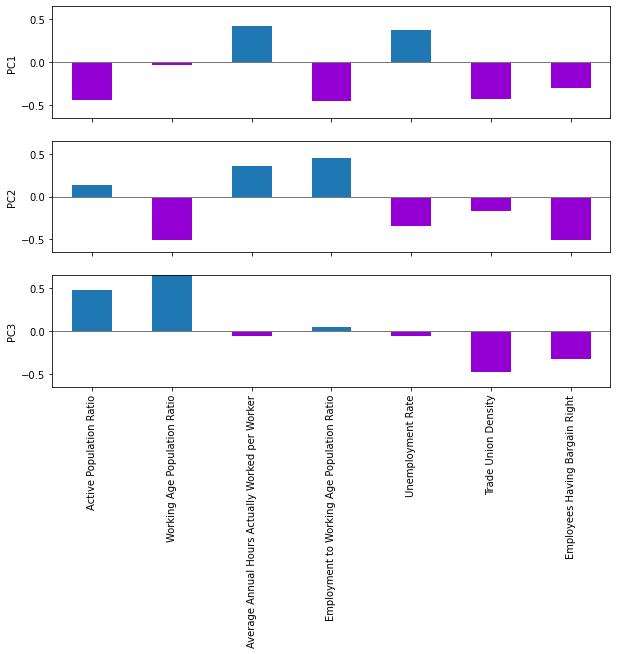

In [133]:
plot_pca_weights(pca_weights.loc[signif_componetns])

Первая главная компонента представляет собой негативную тенденцию в развитии сферы труда и занятости стран ОЭСР, поскольку включает в себя долю экономически активного населения в общей численности населения страны, уровень занятости населения, долю работников, состоящих в профсоюзах, и долю работников, имеющих право на коллективные переговоры и стачку, с наибольшими отрицательными весами, а также среднее количество фактически отработанных за год часов на одного работника и уровень безработицы с достаточно большими положительными весами  
Вторая главная компонента преимущественно противопоставляет влияние доли рабочих, имеющих право на коллективные переговоры и стачку, рост которой негативно сказывается на сфере труда и занятости, и влияние уровня занятости населения, рост которого положительно сказывается на развитие сферы труда и занятости стран ОЭСР  
Третья главная компонента противопоставляет положительное влияние доли экономически активного населения в общей численности населения страны и доли населения трудоспособного возраста в общей численности населения страны негативному влиянию доли работников, состоящих в профсоюзах, на развитие сферы труда и занятости стран ОЭСР

Проекции объектов на значимые главные компоненты

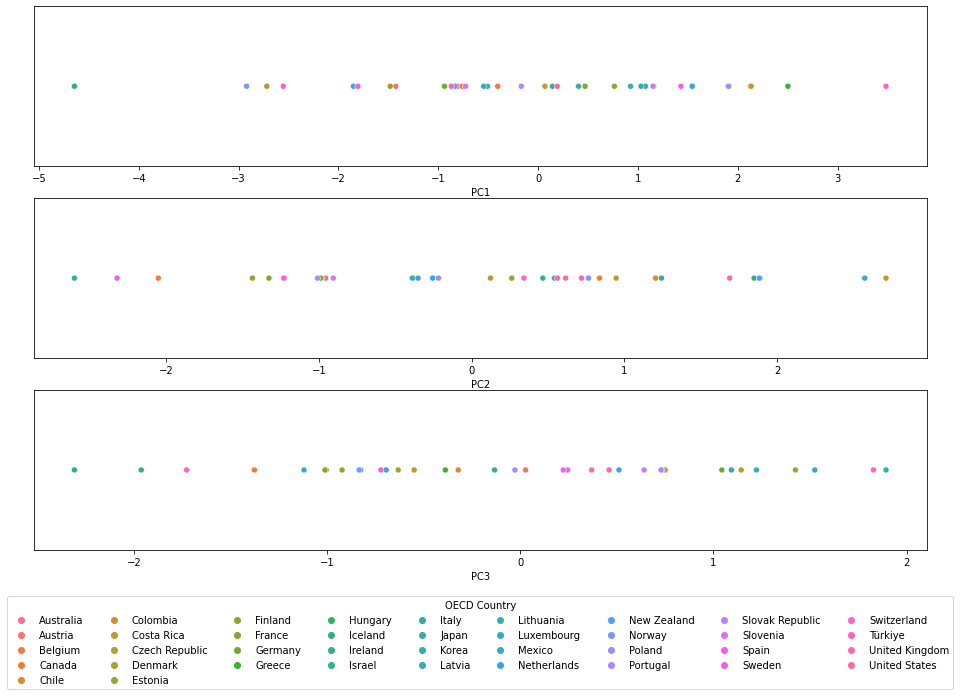

In [134]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10))
for component, ax in enumerate(axes):
    sns.scatterplot(ax=ax, x=pca_components_scaled.iloc[:, component], y=np.repeat(1, len(pca_components_scaled)), hue=OECD_countries)
    ax.set_yticks([])
    plt.xlabel('PC' + str(component + 1))
    if component == 2:
        ax.legend(title='OECD Country', loc='lower center', bbox_to_anchor=(0.5, -0.9), ncol=9)
    else:
        ax.legend([], [], frameon=False)
plt.show()

Как видим, все объекты в целом, за исключением нетипичных, в проекции на каждую значимую главную компоненту можно отнести к 4 кластерам

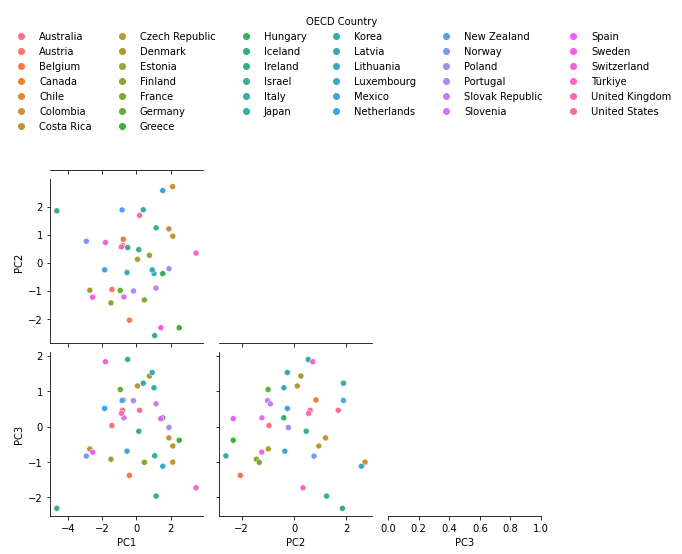

In [135]:
fig = sns.pairplot(pca_components_scaled.reset_index(), kind='scatter', diag_kind='kde', height=2.6, corner=True, hue='index')  # biplots
sns.move_legend(fig, 'upper center', bbox_to_anchor=(0.5, 0.98), ncol=6, title='OECD Country')
plt.show()

Визуализация данных в 3-мерном пространстве

In [136]:
def plot_3d_pca(pca_components: pd.DataFrame, eq_axis: bool = True, figsize: tuple = (8, 8)) -> None:
    '''Plots 3D PCA components'''

    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import seaborn as sns

    fig = plt.figure(figsize=(figsize[0], figsize[1]))
    ax = fig.add_subplot(projection='3d')
    x_axis_line = ((min(pca_components.iloc[:, 0]), max(pca_components.iloc[:, 0])), (0, 0), (0, 0))
    y_axis_line = ((0, 0), (min(pca_components.iloc[:, 1]), max(pca_components.iloc[:, 1])), (0, 0))
    z_axis_line = ((0, 0), (0, 0), (min(pca_components.iloc[:, 2]), max(pca_components.iloc[:, 2])))

    plt.title('PCA dimensions')
    ax.scatter(pca_components.iloc[:, 0], pca_components.iloc[:, 1], pca_components.iloc[:, 2], c='b', s=30)
    for i, point in pca_components.iterrows():
        ax.text(point[0] + 0.12, point[1], point[2], i, size='x-small', alpha=0.8)
    for line in (x_axis_line, y_axis_line, z_axis_line):
        ax.plot(line[0], line[1], line[2], c='r')
    if eq_axis:
        plt.axis('equal')
    plt.xlabel(pca_components.columns[0])
    plt.ylabel(pca_components.columns[1])
    ax.set_zlabel(pca_components.columns[2])
    plt.show()    

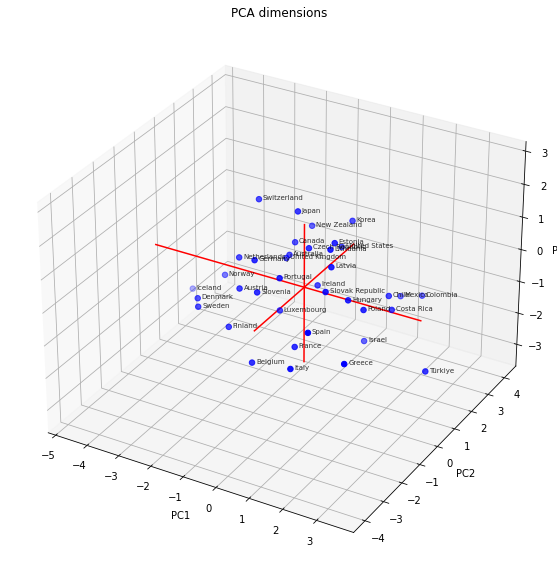

In [137]:
plot_3d_pca(pca_components_scaled, figsize=(10, 10))

In [138]:
import plotly.express as px

In [139]:
fig = px.scatter_3d(pca_components_scaled, x='PC1', y='PC2', z='PC3', template='seaborn')
annot = [dict(x=row['PC1'], y=row['PC2'], z=row['PC3'],
         text=i, font=dict(size=6), xshift=-15, yshift=10, showarrow=False) for i, row in pca_components_scaled.iterrows()]
fig.update_layout(scene=dict(annotations=annot))
fig.update_traces(marker_size=5.5)
fig.show()

Исходя из визуального анализа построенных диаграмм, к нетипичным объектам можем отнести такие страны, как Исландия, Турция, Колумбия, Мексика, Израиль и Норвегия

Формирование матрицы факторных нагрузок

In [140]:
loadings_matrix = eigenvectors @ (eigenvalues_matix ** (1/2))
print('Матрица факторных нагрузок A:\n', pd.DataFrame(loadings_matrix).round(3))

Матрица факторных нагрузок A:
        0      1      2      3      4      5      6
0 -0.031  0.035 -0.003  0.360  0.502  0.183 -0.763
1  0.020 -0.077  0.215 -0.053  0.681 -0.691 -0.056
2 -0.000  0.103  0.395  0.254 -0.066  0.485  0.727
3  0.039  0.078 -0.055  0.177  0.047  0.605 -0.768
4  0.010 -0.050 -0.202  0.560 -0.069 -0.468  0.648
5 -0.001 -0.316  0.196  0.154 -0.510 -0.223 -0.727
6 -0.001  0.367  0.088  0.055 -0.346 -0.682 -0.519


In [141]:
# проверка: A' * A = Λ
print('A\' * A:\n', pd.DataFrame((loadings_matrix.T @ loadings_matrix)).round(3), end='\n' * 2)
print('Матрица собственных значений Λ:\n', pd.DataFrame(eigenvalues_matix).round(3))

A' * A:
        0      1      2      3      4      5      6
0  0.003 -0.000 -0.000 -0.000 -0.000  0.000 -0.000
1 -0.000  0.261 -0.000  0.000 -0.000 -0.000 -0.000
2 -0.000 -0.000  0.293  0.000 -0.000 -0.000 -0.000
3 -0.000  0.000  0.000  0.569 -0.000  0.000  0.000
4 -0.000 -0.000 -0.000 -0.000  1.107 -0.000 -0.000
5  0.000 -0.000 -0.000  0.000 -0.000  1.847  0.000
6 -0.000 -0.000 -0.000  0.000 -0.000  0.000  2.922

Матрица собственных значений Λ:
        0      1      2      3      4      5      6
0  0.003  0.000  0.000  0.000  0.000  0.000  0.000
1  0.000  0.261  0.000  0.000  0.000  0.000  0.000
2  0.000  0.000  0.293  0.000  0.000  0.000  0.000
3  0.000  0.000  0.000  0.569  0.000  0.000  0.000
4  0.000  0.000  0.000  0.000  1.107  0.000  0.000
5  0.000  0.000  0.000  0.000  0.000  1.847  0.000
6  0.000  0.000  0.000  0.000  0.000  0.000  2.922


In [142]:
# проверка: A * A' = R
print('A * A\':\n', pd.DataFrame(loadings_matrix @ loadings_matrix.T).round(3), end='\n\n')
print('Матрица парных корреляций R:\n', pd.DataFrame(np.array(corr_matrix)).round(3))

A * A':
        0      1      2      3      4      5      6
0  1.000  0.235 -0.405  0.786 -0.415  0.301  0.129
1  0.235  1.000 -0.357 -0.369  0.170 -0.094  0.253
2 -0.405 -0.357  1.000 -0.237  0.307 -0.519 -0.599
3  0.786 -0.369 -0.237  1.000 -0.677  0.391  0.003
4 -0.415  0.170  0.307 -0.677  1.000 -0.269  0.001
5  0.301 -0.094 -0.519  0.391 -0.269  1.000  0.615
6  0.129  0.253 -0.599  0.003  0.001  0.615  1.000

Матрица парных корреляций R:
        0      1      2      3      4      5      6
0  1.000  0.235 -0.405  0.786 -0.415  0.301  0.129
1  0.235  1.000 -0.357 -0.369  0.170 -0.094  0.253
2 -0.405 -0.357  1.000 -0.237  0.307 -0.519 -0.599
3  0.786 -0.369 -0.237  1.000 -0.677  0.391  0.003
4 -0.415  0.170  0.307 -0.677  1.000 -0.269  0.001
5  0.301 -0.094 -0.519  0.391 -0.269  1.000  0.615
6  0.129  0.253 -0.599  0.003  0.001  0.615  1.000


## Регрессия на главных компонентах

В качестве независимой переменной снова выберем x4. Для факторных признаков x1, x2, x3, x5, x6, x7 найдем оценку матрицы парных коэффициентов корреляции

In [143]:
X = data_compressed.drop(y.name, axis=1)
X.shape

(38, 6)

In [144]:
X_corr = X.corr()
X_corr

ActivePopulationRatio  \
ActivePopulationRatio                               1.000000   
WorkingAgePopulationRatio                           0.234660   
AvgAnnualHoursActuallyWorkedPerWorker              -0.405146   
UnemploymentRate                                   -0.414631   
TradeUnionDensity                                   0.301265   
EmployeesHavingBargainRight                         0.129224   

                                       WorkingAgePopulationRatio  \
ActivePopulationRatio                                   0.234660   
WorkingAgePopulationRatio                               1.000000   
AvgAnnualHoursActuallyWorkedPerWorker                  -0.357452   
UnemploymentRate                                        0.170342   
TradeUnionDensity                                      -0.094356   
EmployeesHavingBargainRight                             0.253268   

                                       AvgAnnualHoursActuallyWorkedPerWorker  \
ActivePopulationRatio                                              -0.405146   
WorkingAgePopulationRatio                                          -0.357452   
AvgAnnualHoursActuallyWorkedPerWorker                               1.000000   
UnemploymentRate                                                    0.306515   
TradeUnionDensity                                                  -0.518671   
EmployeesHavingBargainRight                                        -0.599385   

                                       UnemploymentRate  TradeUnionDensity  \
ActivePopulationRatio                         -0.414631           0.301265   
WorkingAgePopulationRatio                      0.170342          -0.094356   
AvgAnnualHoursActuallyWorkedPerWorker          0.306515          -0.518671   
UnemploymentRate                               1.000000          -0.269201   
TradeUnionDensity                             -0.269201           1.000000   
EmployeesHavingBargainRight                    0.001162           0.615325   

                                       EmployeesHavingBargainRight  
ActivePopulationRatio                                     0.129224  
WorkingAgePopulationRatio                                 0.253268  
AvgAnnualHoursActuallyWorkedPerWorker                    -0.599385  
UnemploymentRate                                          0.001162  
TradeUnionDensity                                         0.615325  
EmployeesHavingBargainRight                               1.000000

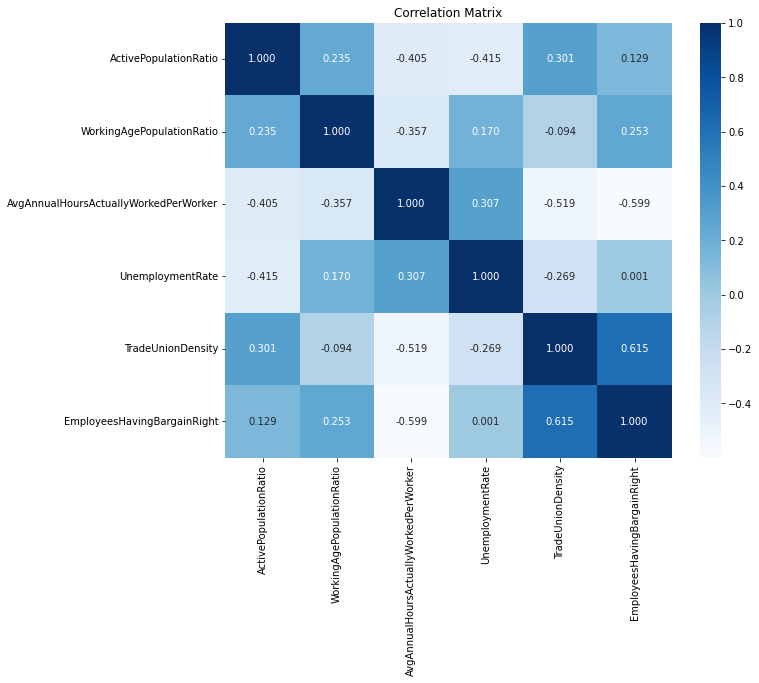

In [145]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(X_corr, xticklabels=X.columns, yticklabels=X.columns, annot=True, fmt='.3f', cmap='Blues')
plt.show()

In [146]:
X_corr_dict = {}
for col_idx in range(n_features - 1):
    for row_idx in range(n_features - 1):
        if row_idx > col_idx:
            X_corr_dict['corr_' + str(col_idx + 1) + str(row_idx + 1)] = stats.pearsonr(
                x=X[X.columns[col_idx]],
                y=X[X.columns[row_idx]])
for corr in X_corr_dict.keys():
    print(corr + ':')
    print(X_corr_dict[corr])
    print(X_corr_dict[corr].confidence_interval(confidence_level=0.95), end='\n\n')

corr_12:
PearsonRResult(statistic=0.23465979597701525, pvalue=0.15615920806562855)
ConfidenceInterval(low=-0.09191903373501852, high=0.5156599740149367)

corr_13:
PearsonRResult(statistic=-0.4051458023968902, pvalue=0.011625909919005587)
ConfidenceInterval(low=-0.6417152452993551, high=-0.09817834666588113)

corr_14:
PearsonRResult(statistic=-0.4146307574535657, pvalue=0.009646679976377371)
ConfidenceInterval(low=-0.6483720408531196, high=-0.10945583345910581)

corr_15:
PearsonRResult(statistic=0.3012647962669441, pvalue=0.06605533609711056)
ConfidenceInterval(low=-0.020381486352234718, high=0.5663986689116791)

corr_16:
PearsonRResult(statistic=0.12922404919965733, pvalue=0.4393858092656434)
ConfidenceInterval(low=-0.19866636805232538, high=0.4310983944043364)

corr_23:
PearsonRResult(statistic=-0.35745187618084395, pvalue=0.027577943794963096)
ConfidenceInterval(low=-0.6076932622777975, high=-0.04264119022474711)

corr_24:
PearsonRResult(statistic=0.17034216657620052, pvalue=0.306554

Значимыми оказались корреляции между парами факторов x1 и x3, x1 и x5, x2 и x3, x3 и x6, x3 и x7, x6 и x7. Таким образом, среди факторов присутствует мультиколлинеарная зависимость  
Для подтвреждения этого найдем коэффициенты инфляции дисперсии для каждого факторного признака

In [147]:
X_vif_list = [variance_inflation_factor(X.values, x_idx) for x_idx in range(X.shape[1])]
X_vif_conclusion = ['Мультиколлинеарность' if _vif > multcor_threshold else 'Умеренно коллинеарен остальным факторам' if _vif > vif_threshold else 'Не коллинеарен остальным факторам' for _vif in vif_list]
X_vif = pd.DataFrame({
    'VIF': X_vif_list,
    'Conclusion': X_vif_conclusion},
    index=X.columns)
X_vif

VIF  \
ActivePopulationRatio                  175.930312   
WorkingAgePopulationRatio              244.541351   
AvgAnnualHoursActuallyWorkedPerWorker   68.129782   
UnemploymentRate                        10.910249   
TradeUnionDensity                        5.943965   
EmployeesHavingBargainRight              8.335709   

                                                                    Conclusion  
ActivePopulationRatio                                     Мультиколлинеарность  
WorkingAgePopulationRatio                                 Мультиколлинеарность  
AvgAnnualHoursActuallyWorkedPerWorker                     Мультиколлинеарность  
UnemploymentRate                                          Мультиколлинеарность  
TradeUnionDensity                      Умеренно коллинеарен остальным факторам  
EmployeesHavingBargainRight            Умеренно коллинеарен остальным факторам

В целях нивелирования влияния эффекта мультиколлинеарности на результаты регрессионного анализа найдем матрицу собственных значений матрицы парных коэффициентов корреляции факторных признаков, которую используем для перехода в новое признаковое пространство главных компонент

In [148]:
X_eigenvalues, X_eigenvectors = np.linalg.eigh(X_corr)

In [149]:
print('Собственные значения:\n', X_eigenvalues.round(3), end='\n\n')
print('Собственные векторы (матрица W весов главных компонент):\n', pd.DataFrame(X_eigenvectors).round(3))

Собственные значения:
 [0.245 0.288 0.509 1.098 1.319 2.541]

Собственные векторы (матрица W весов главных компонент):
        0      1      2      3      4      5
0  0.268 -0.074 -0.657  0.531  0.256 -0.379
1 -0.338  0.394  0.149  0.555 -0.600 -0.201
2  0.068  0.739 -0.370 -0.059  0.119  0.543
3 -0.031 -0.384 -0.551 -0.210 -0.656  0.271
4 -0.634  0.190 -0.321 -0.459  0.138 -0.479
5  0.638  0.331  0.048 -0.390 -0.333 -0.467


In [150]:
# проверка: сумма собственных значений λi = числу собственных значений λi
print('Сумма собственных значений матрицы парных корреляций ({}) = числу собственных значений ({})'.format(sum(X_eigenvalues).round(0), n_features - 1))

Сумма собственных значений матрицы парных корреляций (6.0) = числу собственных значений (6)


In [151]:
# проверка (ортогональность матрицы W): W * W' = W' * W = E
print('W * W\':\n', pd.DataFrame(X_eigenvectors @ X_eigenvectors.T).round(5), end='\n\n')
print('W\' * W:\n', pd.DataFrame(X_eigenvectors.T @ X_eigenvectors).round(5))

W * W':
      0    1    2    3    4    5
0  1.0 -0.0 -0.0 -0.0  0.0  0.0
1 -0.0  1.0 -0.0 -0.0  0.0  0.0
2 -0.0 -0.0  1.0 -0.0  0.0  0.0
3 -0.0 -0.0 -0.0  1.0 -0.0 -0.0
4  0.0  0.0  0.0 -0.0  1.0 -0.0
5  0.0  0.0  0.0 -0.0 -0.0  1.0

W' * W:
      0    1    2    3    4    5
0  1.0  0.0 -0.0 -0.0 -0.0  0.0
1  0.0  1.0  0.0  0.0  0.0 -0.0
2 -0.0  0.0  1.0  0.0 -0.0 -0.0
3 -0.0  0.0  0.0  1.0 -0.0 -0.0
4 -0.0  0.0 -0.0 -0.0  1.0 -0.0
5  0.0 -0.0 -0.0 -0.0 -0.0  1.0


In [152]:
# проверка (ортогональность матрицы W): W' = W^(-1)
X_eigenvectors_inv = np.linalg.inv(X_eigenvectors)
print('W\':\n', pd.DataFrame(X_eigenvectors.T).round(3), end='\n\n')
print('Матрица факторных нагрузок W^(-1):\n', pd.DataFrame(X_eigenvectors_inv).round(3))

W':
        0      1      2      3      4      5
0  0.268 -0.338  0.068 -0.031 -0.634  0.638
1 -0.074  0.394  0.739 -0.384  0.190  0.331
2 -0.657  0.149 -0.370 -0.551 -0.321  0.048
3  0.531  0.555 -0.059 -0.210 -0.459 -0.390
4  0.256 -0.600  0.119 -0.656  0.138 -0.333
5 -0.379 -0.201  0.543  0.271 -0.479 -0.467

Матрица факторных нагрузок W^(-1):
        0      1      2      3      4      5
0  0.268 -0.338  0.068 -0.031 -0.634  0.638
1 -0.074  0.394  0.739 -0.384  0.190  0.331
2 -0.657  0.149 -0.370 -0.551 -0.321  0.048
3  0.531  0.555 -0.059 -0.210 -0.459 -0.390
4  0.256 -0.600  0.119 -0.656  0.138 -0.333
5 -0.379 -0.201  0.543  0.271 -0.479 -0.467


In [153]:
# проверка: симметрическая матрица парных корреляций R положительно определена
is_positive_defined(X_corr)

True

In [154]:
# проверка: W' * R * W = Λ
X_eigenvalues_matix = np.diag(X_eigenvalues)
print('Матрица собственных значений Λ:\n{}'.format(pd.DataFrame(X_eigenvalues_matix).round(3)), end='\n\n')
print('W\' * R * W:\n', pd.DataFrame(X_eigenvectors.T @ X_corr @ X_eigenvectors).round(3))

Матрица собственных значений Λ:
       0      1      2      3      4      5
0  0.245  0.000  0.000  0.000  0.000  0.000
1  0.000  0.288  0.000  0.000  0.000  0.000
2  0.000  0.000  0.509  0.000  0.000  0.000
3  0.000  0.000  0.000  1.098  0.000  0.000
4  0.000  0.000  0.000  0.000  1.319  0.000
5  0.000  0.000  0.000  0.000  0.000  2.541

W' * R * W:
        0      1      2      3      4      5
0  0.245 -0.000  0.000 -0.000  0.000  0.000
1 -0.000  0.288  0.000  0.000 -0.000 -0.000
2  0.000  0.000  0.509  0.000  0.000  0.000
3 -0.000  0.000  0.000  1.098 -0.000 -0.000
4  0.000 -0.000  0.000 -0.000  1.319 -0.000
5  0.000  0.000  0.000 -0.000  0.000  2.541


In [155]:
# проверка: W * Λ * W' = R
X_eigenvalues_matix = np.diag(X_eigenvalues)
print('Матрица парных корреляций R:\n{}'.format(pd.DataFrame(np.array(X_corr)).round(3)), end='\n\n')
print('W * Λ * W\':\n', pd.DataFrame(X_eigenvectors @ X_eigenvalues_matix @ X_eigenvectors.T).round(3))

Матрица парных корреляций R:
       0      1      2      3      4      5
0  1.000  0.235 -0.405 -0.415  0.301  0.129
1  0.235  1.000 -0.357  0.170 -0.094  0.253
2 -0.405 -0.357  1.000  0.307 -0.519 -0.599
3 -0.415  0.170  0.307  1.000 -0.269  0.001
4  0.301 -0.094 -0.519 -0.269  1.000  0.615
5  0.129  0.253 -0.599  0.001  0.615  1.000

W * Λ * W':
        0      1      2      3      4      5
0  1.000  0.235 -0.405 -0.415  0.301  0.129
1  0.235  1.000 -0.357  0.170 -0.094  0.253
2 -0.405 -0.357  1.000  0.307 -0.519 -0.599
3 -0.415  0.170  0.307  1.000 -0.269  0.001
4  0.301 -0.094 -0.519 -0.269  1.000  0.615
5  0.129  0.253 -0.599  0.001  0.615  1.000


In [156]:
X_pca_variance = pd.Series(X_eigenvalues).sort_values(ascending=False)  # дисперсии по новому базису (главным компонентам)
X_pca_variance.index = components_labels[:6]
X_pca_variance.round(3)

PC1    2.541
PC2    1.319
PC3    1.098
PC4    0.509
PC5    0.288
PC6    0.245
dtype: float64

In [157]:
X_pca_var_sum = X_pca_variance.sum()
X_pca_var_ratio = X_pca_variance / X_pca_var_sum * 100  # вклад компонент в суммарную дисперсию
X_pca_var_ratio.round(3)

PC1    42.346
PC2    21.984
PC3    18.307
PC4     8.476
PC5     4.800
PC6     4.088
dtype: float64

In [158]:
X_pca_var_cumulative = X_pca_variance.cumsum() / X_pca_var_sum * 100
X_pca_var_cumulative

PC1     42.345924
PC2     64.329788
PC3     82.636545
PC4     91.112553
PC5     95.912453
PC6    100.000000
dtype: float64

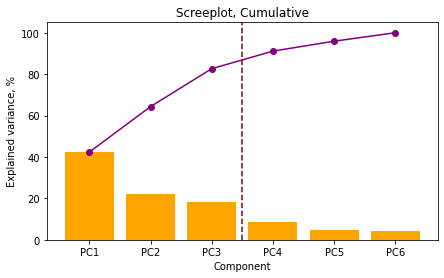

In [159]:
plt.figure(figsize=(7, 4))
plt.title('Screeplot, Cumulative')
plt.bar(X_pca_var_ratio.index, X_pca_var_ratio, color='orange')
plt.plot(X_pca_var_cumulative.index, X_pca_var_cumulative, marker='o', color='purple')
plt.axvline(x=2.5, c='darkred', ls='--')
plt.xlabel('Component')
plt.ylabel('Explained variance, %')
plt.show()

In [160]:
X_signif_componetns = X_pca_var_cumulative[X_pca_var_cumulative <= threshold].index.tolist()
X_signif_componetns

['PC1', 'PC2', 'PC3']

Матрица весов главных компонент

In [161]:
X_pca_result = pd.DataFrame(X_eigenvectors.T, columns=X.columns)
X_pca_result.insert(0, 'explained_var', X_eigenvalues)
X_pca_result = X_pca_result.sort_values(by='explained_var', ascending=False)  # компоненты упорядочены по величине объясненной дисперсии
X_pca_result.index = components_labels[:6]
X_pca_result.round(3)

explained_var  ActivePopulationRatio  WorkingAgePopulationRatio  \
PC1          2.541                 -0.379                     -0.201   
PC2          1.319                  0.256                     -0.600   
PC3          1.098                  0.531                      0.555   
PC4          0.509                 -0.657                      0.149   
PC5          0.288                 -0.074                      0.394   
PC6          0.245                  0.268                     -0.338   

     AvgAnnualHoursActuallyWorkedPerWorker  UnemploymentRate  \
PC1                                  0.543             0.271   
PC2                                  0.119            -0.656   
PC3                                 -0.059            -0.210   
PC4                                 -0.370            -0.551   
PC5                                  0.739            -0.384   
PC6                                  0.068            -0.031   

     TradeUnionDensity  EmployeesHavingBargainRight  
PC1             -0.479                       -0.467  
PC2              0.138                       -0.333  
PC3             -0.459                       -0.390  
PC4             -0.321                        0.048  
PC5              0.190                        0.331  
PC6             -0.634                        0.638

In [162]:
X_pca_weights = X_pca_result[X.columns]  # веса линейных комбинаций, позволяющие преобразовывать предсказатели в компоненты - смещение от среднего
X_pca_weights.round(3)

ActivePopulationRatio  WorkingAgePopulationRatio  \
PC1                 -0.379                     -0.201   
PC2                  0.256                     -0.600   
PC3                  0.531                      0.555   
PC4                 -0.657                      0.149   
PC5                 -0.074                      0.394   
PC6                  0.268                     -0.338   

     AvgAnnualHoursActuallyWorkedPerWorker  UnemploymentRate  \
PC1                                  0.543             0.271   
PC2                                  0.119            -0.656   
PC3                                 -0.059            -0.210   
PC4                                 -0.370            -0.551   
PC5                                  0.739            -0.384   
PC6                                  0.068            -0.031   

     TradeUnionDensity  EmployeesHavingBargainRight  
PC1             -0.479                       -0.467  
PC2              0.138                       -0.333  
PC3             -0.459                       -0.390  
PC4             -0.321                        0.048  
PC5              0.190                        0.331  
PC6             -0.634                        0.638

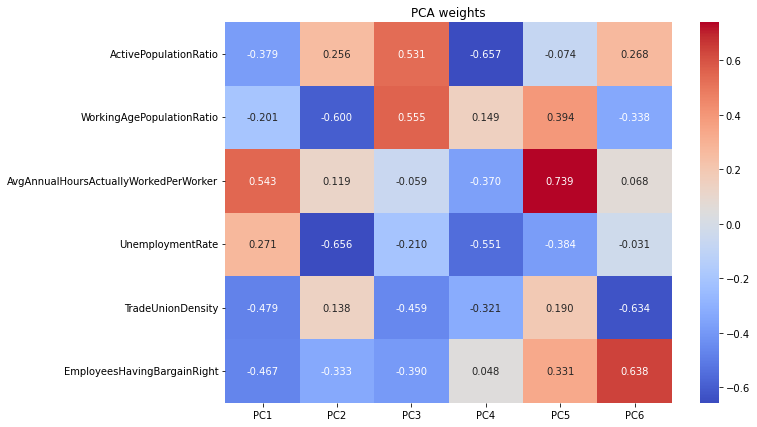

In [163]:
plt.figure(figsize=(10, 7))
plt.title('PCA weights')
sns.heatmap(X_pca_weights.T, xticklabels=components_labels[:6], yticklabels=X.columns, annot=True, fmt='.3f', cmap='coolwarm')
plt.show()

In [164]:
X_most_influence = [X.columns.tolist()[np.abs(X_pca_weights.iloc[i, :]).argmax()] for i in range(n_features - 1)]
X_most_influence = dict(zip(components_labels[:6], X_most_influence))
X_most_influence  # признаки, имеющие наибольшее влияние на каждую компоненту (направления компонент в сторону соответствующих признаков)

{'PC1': 'AvgAnnualHoursActuallyWorkedPerWorker',
 'PC2': 'UnemploymentRate',
 'PC3': 'WorkingAgePopulationRatio',
 'PC4': 'ActivePopulationRatio',
 'PC5': 'AvgAnnualHoursActuallyWorkedPerWorker',
 'PC6': 'EmployeesHavingBargainRight'}

Первая главная компонента представляет собой негативную тенденцию в развитии сферы труда и занятости стран ОЭСР, поскольку включает в себя долю экономически активного населения в общей численности населения страны, долю работников, состоящих в профсоюзах, и долю работников, имеющих право на коллективные переговоры и стачку, с наибольшими отрицательными весами, а также среднее количество фактически отработанных за год часов на одного работника с наибольшим положительным весом  
Вторая главная компонента преимущественно представляет негативное влияние уровня безработицы и доли населения трудоспособного возраста в общей численности населения на развитие сферы труда и занятости стран ОЭСР, противопоставляя его положительному влиянию доли экономически активного населения в общей численности населения страны  
Третья главная компонента преимущественно противопоставляет положительное влияние доли экономически активного населения в общей численности населения страны и доли населения трудоспособного возраста в общей численности населения страны негативному влиянию доли работников, состоящих в профсоюзах и доли работников, имеющих право на коллективные переговоры и стачку, на сферу труда и занятости стран ОЭСР

In [165]:
X_standardized = (X - X.mean()) / X.std()
y_standardized = (y - y.mean()) / y.std()

In [166]:
X_pca_scores = np.matmul(X_standardized, np.array(X_pca_weights.T))  # объясняющие переменные, преобразованные с учетом весов в главных компонентах
X_pca_scores.index = OECD_countries
X_pca_scores.columns = components_labels[:6]
X_pca_scores

PC1       PC2       PC3       PC4       PC5       PC6
Australia       -0.365013  0.501686  0.535261 -0.048047  0.378167  0.710686
Austria         -1.692124 -0.259471  0.020362  0.682346  0.500740  0.730986
Belgium         -1.420801 -0.908626 -1.481055  0.733772  0.476002 -0.417476
Canada          -0.216613  0.576827  0.832137 -0.612734 -0.244733 -0.100926
Chile            2.158247  0.543591 -0.254637 -0.042336  0.401795 -0.103862
Colombia         3.199633  1.249508 -0.912323 -1.291464 -0.203679  0.473904
Costa Rica       2.348989 -0.038358 -0.627870 -1.095588  0.811901  0.436770
Czech Republic   0.094957  0.003422  1.173560  0.266184  0.485982 -0.126919
Denmark         -2.851851  0.200043 -0.567334 -0.241151  0.024773 -0.682683
Estonia          0.834554 -0.350935  1.364037 -0.336040 -0.155540 -0.054265
Finland         -1.992987 -0.461046 -0.981267 -0.570952  0.310679 -0.918418
France          -0.220908 -0.932812 -1.157002  1.179377 -0.649014  1.298646
Germany         -1.240946 -0.660349  0.974659  0.730706 -0.531979  0.137677
Greece           1.181562 -2.705264 -0.874738 -0.909472  0.416274  0.077000
Hungary          1.028874 -0.364362  0.231848  1.070715  0.210758 -0.591864
Iceland         -3.009001  2.508244 -1.981999 -1.584126 -0.194560  0.118763
Ireland          0.340933  0.311355 -0.095959 -0.356128  0.003783 -0.182559
Israel           1.479126  1.150619 -1.799314  0.420177  0.049834  0.072990
Italy           -0.349447 -1.925881 -1.106265  0.782321  1.027024 -0.024971
Japan           -0.231863  0.457867  2.021067  0.359693  0.510764 -0.552167
Korea            1.193183  1.260925  1.440340  0.082505  1.196670 -0.036671
Latvia           0.769329 -0.894370  0.939190 -0.455582 -0.551852 -0.400622
Lithuania        0.694457 -0.673109  1.434154  0.045809 -0.739000 -0.565642
Luxembourg      -0.741599  0.317491 -0.601119  1.059169 -0.227640 -0.300073
Mexico           2.392989  2.069573 -0.791474  0.743511  0.599912  0.018175
Netherlands     -1.680307  0.179197  0.564542  0.700267 -0.395930  1.018669
New Zealand      0.194724  1.442791  0.955854 -0.293478 -0.212010  0.070731
Norway          -2.155897  1.463920 -0.595170  0.161855 -0.575019  0.214881
Poland           1.517023 -0.602079 -0.131603 -0.035393 -0.409639 -0.632778
Portugal        -0.536145 -1.039385  0.555981 -0.301885  0.367189  0.628131
Slovak Republic  0.665287 -1.379345  0.386988 -0.908810 -0.583832 -0.187110
Slovenia        -1.213798 -0.698037  0.162886  0.218345  0.672950  0.074256
Spain            0.321619 -2.681500 -0.264177 -1.039711 -0.587955  0.580863
Sweden          -2.788316 -0.135259 -0.727321 -0.583146  0.061619 -0.597449
Switzerland     -1.140998  0.566803  1.933363 -0.263494 -0.006489  0.435977
Türkiye          2.998975  0.030988 -1.723035  1.187329 -0.990486 -0.476228
United Kingdom  -0.520541  0.715311  0.508103  0.406138 -0.775763 -0.242531
United States    0.954696  1.160027  0.639329  0.139318 -0.471696  0.096109

Построение модели регрессии на всех главных компонентах

In [167]:
pca_lm = sm.OLS(y_standardized, sm.add_constant(X_pca_scores)).fit()

In [168]:
print(pca_lm.summary())

                                      OLS Regression Results                                     
Dep. Variable:     EmploymentToWorkingAgePopulationRatio   R-squared:                       0.994
Model:                                               OLS   Adj. R-squared:                  0.993
Method:                                    Least Squares   F-statistic:                     878.1
Date:                                   Fri, 28 Oct 2022   Prob (F-statistic):           3.51e-33
Time:                                           01:48:29   Log-Likelihood:                 44.274
No. Observations:                                     38   AIC:                            -74.55
Df Residuals:                                         31   BIC:                            -63.08
Df Model:                                              6                                         
Covariance Type:                               nonrobust                                         
                 coe

Коэффициенты при всех главных компонентах статистически значимы.

In [169]:
pcr_params = pca_lm.params
pcr_params_vector = np.array(pcr_params).reshape(-1, 1)
print('Коэффициенты модели:', pcr_params, sep='\n')

Коэффициенты модели:
const    1.311451e-15
PC1     -2.852796e-01
PC2      6.761505e-01
PC3      1.709468e-01
PC4     -4.636837e-01
PC5     -1.508465e-01
PC6      3.849589e-01
dtype: float64


Переход к коэффициентам стандартизированной модели

In [170]:
# def sortDiagonal(a, N):
#     diagonalElements = []
#     for i in range(N):
#         diagonalElements.append(a[i][i])
#     diagonalElements.sort(reverse=True)
#     for i in range(N):
#         a[i][i] = diagonalElements[i]

In [171]:
# sortDiagonal(X_eigenvalues_matix, 6)  # приведение матрицы собственных значений в соответствие с матрицей W

In [172]:
std_ols_vector = np.array(X_pca_weights.T) @ pcr_params_vector[1:, 0]
std_ols_vector = pd.Series(std_ols_vector.reshape(-1), index=X.columns)
std_ols_vector

ActivePopulationRatio                    0.790738
WorkingAgePopulationRatio               -0.512104
AvgAnnualHoursActuallyWorkedPerWorker    0.001586
UnemploymentRate                        -0.255421
TradeUnionDensity                        0.027435
EmployeesHavingBargainRight              0.014981
dtype: float64

Наибольшее влияние на вариацию значения уровня занятости населения оказывает доля экономически активного населения в общей численности населения страны. Далее по силе влияния – доля населения рабочего возраста в общей численности населения страны. Затем – уровень безработицы. И наименьшее влияние оказывает среднее количество фактически отработанных за год часов на одного работника  
При увеличении доли экономически активного населения в общей численности населения страны на единицу и неизменности остальных факторных признаков уровень занятости населения увеличивается в среднем на 0,791. Аналогичную интерпретацию имеют и остальные коэффициенты регрессии


Получим предсказанные данной моделью значения

In [173]:
pcr_predictions = std_ols_vector['ActivePopulationRatio'] * X_standardized['ActivePopulationRatio'] +\
                  std_ols_vector['WorkingAgePopulationRatio'] * X_standardized['WorkingAgePopulationRatio'] +\
                  std_ols_vector['AvgAnnualHoursActuallyWorkedPerWorker'] * X_standardized['AvgAnnualHoursActuallyWorkedPerWorker'] +\
                  std_ols_vector['UnemploymentRate'] * X_standardized['UnemploymentRate'] +\
                  std_ols_vector['TradeUnionDensity'] * X_standardized['TradeUnionDensity'] +\
                  std_ols_vector['EmployeesHavingBargainRight'] * X_standardized['EmployeesHavingBargainRight']
pcr_predictions = pcr_predictions * y.std() + y.mean()
pcr_predictions

Australia          0.613746
Austria            0.575525
Belgium            0.493193
Canada             0.620583
Chile              0.537340
Colombia           0.601377
Costa Rica         0.545533
Czech Republic     0.557529
Denmark            0.608644
Estonia            0.556592
Finland            0.559072
France             0.514552
Germany            0.553417
Greece             0.433721
Hungary            0.478437
Iceland            0.763815
Ireland            0.574918
Israel             0.553792
Italy              0.434276
Japan              0.579830
Korea              0.597206
Latvia             0.527292
Lithuania          0.526479
Luxembourg         0.545593
Mexico             0.572384
Netherlands        0.617114
New Zealand        0.647407
Norway             0.668660
Poland             0.493674
Portugal           0.553620
Slovak Republic    0.520929
Slovenia           0.544046
Spain              0.485152
Sweden             0.602888
Switzerland        0.650844
Türkiye            0

In [174]:
pcr_residuals = y - pcr_predictions

In [175]:
tss = ((y - y.mean()) ** 2).sum()
pcr_rss = (pcr_residuals ** 2).sum()
pcr_r_squared = 1 - pcr_rss / tss
print('Коэффициент детерминации модели: {:.3f}'.format(pcr_r_squared))

Коэффициент детерминации модели: 0.994


Коэффициент детерминации модели с точностью до тысячных совпадает с коэффициентом множественной корреляции переменной отклика с факторными переменными

## Робастная регрессия на главных компонентах

Алгоритм:
1. Получаем главные компоненты для всех начальных наблюдений.
2. Строим регрессию на всех компонентах.
3. Запоминаем коэффициент детерминации модели, построенной на всех главных компонентах для всех начальных данных.
4. Если в данных есть выбросы, то проводим исключение одного наиболее выдающегося по расстоянию Махаланобиса на всех главных компонентах выброса из начальных данных и запоминаем новые данные для дальнейшего использования. Иначе - принимаем текущую модель как оптимальную и переходим к шагу 8.
5. Получаем главные компоненты для новых данных без исключенного выброса.
6. Строим регрессию на всех главных компонентах.
7. Если коэффициент детерминации новой модели >= коэффициенту детерминации предыдущей, то запоминаем текущую модель и ее коэффициент детерминации и продолжаем с шага 4. Иначе - принимаем предыдущую модель как оптимальную и переходим к шагу 8.
8. Исключаем незначимые по коэффициентам регрессии главные компоненты.

In [176]:
def get_principal_components(data: pd.DataFrame, silent: bool = True) -> tuple:
    '''Given a factors matrix X returns PCA scores and PCA weights'''
    # Get correlation matrix
    corr_matrix = data.corr()
    # Get eigenvalues and eigenvectors of correlation matrix
    eigenvalues, eigenvectors = np.linalg.eigh(corr_matrix)
    # Get components explained variance ratio and cumulative explained variance ratio
    components_labels = ['PC' + str(i + 1) for i in range(data.shape[1])]
    pca_variance = pd.Series(sorted(eigenvalues, reverse=True), index=components_labels)
    pca_var_sum = pca_variance.sum()
    pca_var_ratio = pca_variance / pca_var_sum * 100
    pca_var_cumulative = pca_variance.cumsum() / pca_var_sum * 100
    # Display Scree plot with cumulative explained variance ratio
    if not silent:
        plt.figure(figsize=(7, 4))
        plt.title('Screeplot, Cumulative')
        plt.bar(pca_var_ratio.index, pca_var_ratio, color='orange')
        plt.plot(pca_var_cumulative.index, pca_var_cumulative, marker='o', color='purple')
        plt.xlabel('Component')
        plt.ylabel('Explained variance, %')
        plt.show()
    # Get principal components weights matrix
    pca_result = pd.DataFrame(eigenvectors.T, columns=data.columns)
    pca_result.insert(0, 'explained_var', eigenvalues)
    pca_result = pca_result.sort_values(by='explained_var', ascending=False)
    pca_result.index = components_labels
    pca_weights = pca_result[data.columns]
    # Display principal components weights matrix
    if not silent:
        plt.figure(figsize=(10, 7))
        plt.title('PCA weights')
        sns.heatmap(pca_weights.T, xticklabels=components_labels, yticklabels=data.columns, annot=True, fmt='.3f', cmap='coolwarm')
        plt.show()
    # Get principal components scores matrix
    X_standardized = (data - data.mean()) / data.std()
    pca_scores = np.matmul(X_standardized, np.array(pca_weights.T))
    pca_scores.index = data.index
    pca_scores.columns = components_labels
    return pca_scores, pca_weights

def principal_component_regression(X: pd.DataFrame, y: pd.Series) -> tuple:
    '''Given a factors matrix X and a response vector y returns regression based on all principal components of X'''
    # Get standardized response variable
    y_standardized = (y - y.mean()) / y.std()
    # Get principal components scores matrix
    pca_scores = get_principal_components(X)[0]
    # Get principal components regression (PCR)
    pcr_model = sm.OLS(y_standardized, sm.add_constant(pca_scores)).fit()
    # Get PCR coefficients estimates
    pcr_params = np.array(pcr_model.params).reshape(-1, 1)
    return pcr_model, pcr_params, pcr_model.rsquared

def get_cov_matrix(data: pd.DataFrame):
    # Get sample means column vector
    sample_means = np.array(data.mean()).reshape(-1)
    # Get centered factors matrix
    centered_features = np.array(data) - sample_means
    # Get covariance matrix
    cov_matrix = np.matmul(centered_features.T, centered_features) / (data.shape[0] - 1)
    return cov_matrix

def stepwise_robust_pcr(data: pd.DataFrame, response: pd.DataFrame, threshold: np.float64):
    '''Given a factors matrix X and a response vector y returns robust principal components regression and outliers indexes'''
    data = data.reset_index(drop=True)
    response = response.reset_index(drop=True)
    proba = [-threshold]
    outliers_idx = []
    m_features = data.shape[1]
    pcr_r_squared = -0.01
    # As long as there are outliers in the data
    while any([prob < threshold for prob in proba]):
        n_obs = data.shape[0]
        # Get indexes of observations remaining after elimination of outliers in the previous steps
        step_obs_idx = data.index.values
        # Get principal components regression
        model, params, r_squared = principal_component_regression(data, response)
        # If the current model is better than the previous one, make the current model final
        if r_squared >= pcr_r_squared:
            pcr_model, pcr_params, pcr_r_squared = model, params, r_squared
        # Else make the previous model final
        else:
            outliers_idx = outliers_idx[:(len(outliers_idx)-1)]
            break
        # Get principal components scores matrix
        pca_scores = get_principal_components(data)[0]
        # Get Mahalanobis distances for remaining observations
        sample_means = [np.array(pca_scores.drop(idx, axis=0).mean()).reshape(-1, 1) for idx in step_obs_idx]
        cov_matrixes = [get_cov_matrix(pca_scores.drop(idx, axis=0)) for idx in step_obs_idx]
        diffs = [np.array(pca_scores.iloc[idx, :]).reshape(-1, 1) - sample_means[idx] for idx in range(n_obs)]
        distances = [np.matmul(np.matmul(diff.T, np.linalg.inv(cov_mx)), diff)[0, 0] for diff, cov_mx in zip(diffs, cov_matrixes)]
        # Get Fisher statistics
        fisher_stats = [(((n_obs - m_features - 1) * (n_obs - 1)) / (((n_obs - 1) ** 2 - 1) * m_features)) * distance for distance in distances]
        # Get probabilities
        proba = [stats.f.pdf(quantile, m_features, n_obs - m_features - 1) for quantile in fisher_stats]
        # Get Mahalanobis-Fisher test results
        results = pd.DataFrame(
            list(zip((pca_scores.index + 1).tolist(), distances, fisher_stats, proba)),
            columns=['Observation', 'Hotelling distance', 'F statistic', 'Probability'],
            index=pca_scores.index)
        # Drop the most outstanding observation from the data
        if any([prob < threshold for prob in proba]):
            outliers_probs = results[results['Probability'] < threshold]['Probability']
            outlier_idx = outliers_probs[outliers_probs == outliers_probs.min()].index.tolist()[0]
            outliers_idx.append(outlier_idx)
            data = data.drop(outlier_idx, axis=0)
            response = response.drop(outlier_idx, axis=0)
    return pcr_model, outliers_idx

In [177]:
pcr_robust_lm, outliers_idx = stepwise_robust_pcr(X, y, 0.05)

In [178]:
print(pcr_robust_lm.summary())

                                      OLS Regression Results                                     
Dep. Variable:     EmploymentToWorkingAgePopulationRatio   R-squared:                       0.996
Model:                                               OLS   Adj. R-squared:                  0.996
Method:                                    Least Squares   F-statistic:                     1289.
Date:                                   Fri, 28 Oct 2022   Prob (F-statistic):           7.54e-33
Time:                                           01:48:31   Log-Likelihood:                 49.277
No. Observations:                                     35   AIC:                            -84.55
Df Residuals:                                         28   BIC:                            -73.67
Df Model:                                              6                                         
Covariance Type:                               nonrobust                                         
                 coe

Коэффициенты при всех главных компонентах статистически значимы

In [179]:
print('Исключенные наблюдения: ', *tuple(X.index.values[outliers_idx]))

Исключенные наблюдения:  Iceland Türkiye France


Рассмотрим матрицу весов главных компонент итоговой модели

In [180]:
X_robust = X.drop(X.index.values[outliers_idx], axis=0)

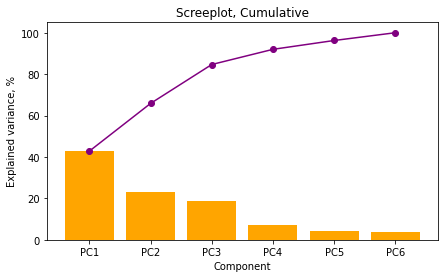

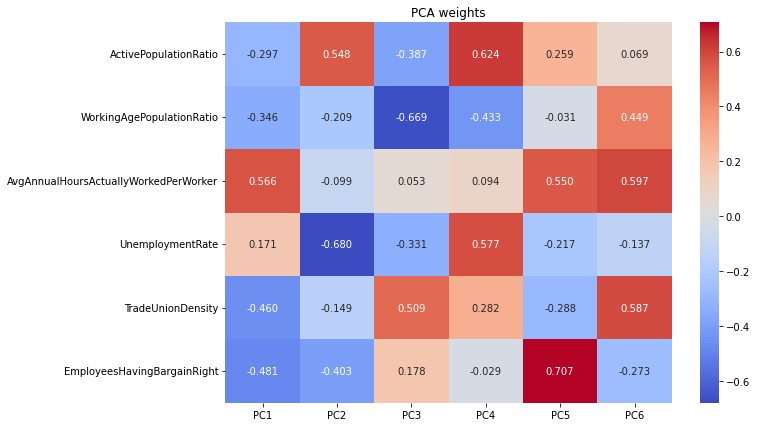

In [181]:
robust_pca_scores, robust_pca_weights = get_principal_components(X_robust, silent=False)

Первая главная компонента представляет собой негативную тенденцию в развитии сферы труда и занятости стран ОЭСР, поскольку включает в себя долю населения трудоспособного в общей численности населения страны, долю работников, состоящих в профсоюзах, и долю работников, имеющих право на коллективные переговоры и стачку, с наибольшими отрицательными весами, а также среднее количество фактически отработанных за год часов на одного работника с наибольшим положительным весом  
Вторая главная компонента преимущественно противопоставляет положительное влияние доли экономически активного населения в общей численности населения отрицательному влиянию уровня безработицы и доли работников, имеющих право на коллективные переговоры и стачку, на развитие сферы труда и занятости стран ОЭСР  
Третья главная компонента преимущественно противопоставляет положительное влияние доли работников, состоящих в профсоюзах, отрицательному влиянию доли населения трудоспособного возраста в общей численности населения страны на развитие сферы труда и занятости стран ОЭСР  
  
Как видим, после исключения из выборки нетипичных наблюдений интерпретация главных компонент изменилась и стала более осмысленной

In [182]:
pcr_robust_params = pcr_robust_lm.params
pcr_robust_params_vector = np.array(pcr_robust_params).reshape(-1, 1)
print('Коэффициенты модели:', pcr_robust_params, sep='\n')

Коэффициенты модели:
const   -1.110223e-16
PC1     -1.087391e-01
PC2      7.552968e-01
PC3      1.673677e-01
PC4      5.175004e-01
PC5      2.820109e-01
PC6     -1.835355e-01
dtype: float64


Переход к коэффициентам стандартизированной модели

In [183]:
X_robust_pca_weights = get_principal_components(X_robust)[1]
X_robust_pca_weights.T

PC1       PC2       PC3       PC4  \
ActivePopulationRatio                 -0.297033  0.547541 -0.387144  0.624472   
WorkingAgePopulationRatio             -0.345842 -0.209147 -0.668635 -0.432602   
AvgAnnualHoursActuallyWorkedPerWorker  0.565636 -0.099469  0.052735  0.094261   
UnemploymentRate                       0.170639 -0.679687 -0.330949  0.577442   
TradeUnionDensity                     -0.459776 -0.149245  0.509086  0.282379   
EmployeesHavingBargainRight           -0.481361 -0.402881  0.177677 -0.028786   

                                            PC5       PC6  
ActivePopulationRatio                  0.259437  0.069396  
WorkingAgePopulationRatio             -0.031101  0.448850  
AvgAnnualHoursActuallyWorkedPerWorker  0.549657  0.596970  
UnemploymentRate                      -0.217349 -0.136753  
TradeUnionDensity                     -0.288378  0.586740  
EmployeesHavingBargainRight            0.706541 -0.272728

In [184]:
std_robust_ols_vector = np.array(X_robust_pca_weights.T) @ pcr_robust_params_vector[1:, 0]
std_robust_ols_vector = pd.Series(std_robust_ols_vector.reshape(-1), index=X.columns)
std_robust_ols_vector

ActivePopulationRatio                    0.764652
WorkingAgePopulationRatio               -0.547292
AvgAnnualHoursActuallyWorkedPerWorker   -0.033585
UnemploymentRate                        -0.324680
TradeUnionDensity                       -0.020406
EmployeesHavingBargainRight              0.012196
dtype: float64

Наибольшее влияние на вариацию значения уровня занятости населения оказывает доля экономически активного населения в общей численности населения страны. Далее по силе влияния – доля населения рабочего возраста в общей численности населения страны. Затем – уровень безработицы. И наименьшее влияние оказывает доля работников, имеющих право на коллективные переговоры и стачку  
При увеличении доли экономически активного населения в общей численности населения страны на единицу и неизменности остальных факторных признаков уровень занятости населения увеличивается в среднем на 0,765. Аналогичную интерпретацию имеют и остальные коэффициенты регрессии

Получим предсказанные данной моделью значения

In [185]:
X_robust_standardized = (X_robust - X_robust.mean()) / X_robust.std()

In [186]:
y_robust = y.drop(y.index.values[outliers_idx], axis=0)
y_robust_standardized = (y_robust - y_robust.mean()) / y_robust.std()

In [187]:
pcr_robust_predictions = std_robust_ols_vector['ActivePopulationRatio'] * X_robust_standardized['ActivePopulationRatio'] +\
                  std_robust_ols_vector['WorkingAgePopulationRatio'] * X_robust_standardized['WorkingAgePopulationRatio'] +\
                  std_robust_ols_vector['AvgAnnualHoursActuallyWorkedPerWorker'] * X_robust_standardized['AvgAnnualHoursActuallyWorkedPerWorker'] +\
                  std_robust_ols_vector['UnemploymentRate'] * X_robust_standardized['UnemploymentRate'] +\
                  std_robust_ols_vector['TradeUnionDensity'] * X_robust_standardized['TradeUnionDensity'] +\
                  std_robust_ols_vector['EmployeesHavingBargainRight'] * X_robust_standardized['EmployeesHavingBargainRight']
pcr_robust_predictions = pcr_robust_predictions * y_robust.std() + y_robust.mean()
pcr_robust_predictions

Australia          0.612047
Austria            0.575880
Belgium            0.493813
Canada             0.617265
Chile              0.538248
Colombia           0.597646
Costa Rica         0.542809
Czech Republic     0.558789
Denmark            0.602213
Estonia            0.557987
Finland            0.552972
Germany            0.557120
Greece             0.435246
Hungary            0.484519
Ireland            0.572923
Israel             0.553830
Italy              0.438303
Japan              0.580635
Korea              0.596303
Latvia             0.529128
Lithuania          0.530440
Luxembourg         0.547816
Mexico             0.573462
Netherlands        0.618338
New Zealand        0.644514
Norway             0.663573
Poland             0.496708
Portugal           0.553492
Slovak Republic    0.521315
Slovenia           0.543621
Spain              0.486716
Sweden             0.595606
Switzerland        0.648451
United Kingdom     0.599719
United States      0.607100
dtype: float64

In [188]:
pcr_robust_residuals = y_robust - pcr_robust_predictions

In [189]:
robust_tss = ((y_robust - y_robust.mean()) ** 2).sum()
pcr_robust_rss = (pcr_robust_residuals ** 2).sum()
pcr_robust_r_squared = 1 - pcr_robust_rss / robust_tss
print('Коэффициент детерминации модели: {:.3f}'.format(pcr_robust_r_squared))

Коэффициент детерминации модели: 0.996


Как видим, объясняющая способность модели, построенной на главных компонентах для данных, не содержащих выбросы, выше, чем у модели на данных с выбросами  

## Кластеризация по главным компонентам

In [190]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.vq import kmeans, vq
import random

In [191]:
random.seed(1000, 2000)

### Иерархическая кластеризация

In [192]:
single = linkage(pca_components_scaled, method='single', metric='sqeuclidean')
single.shape

(37, 4)

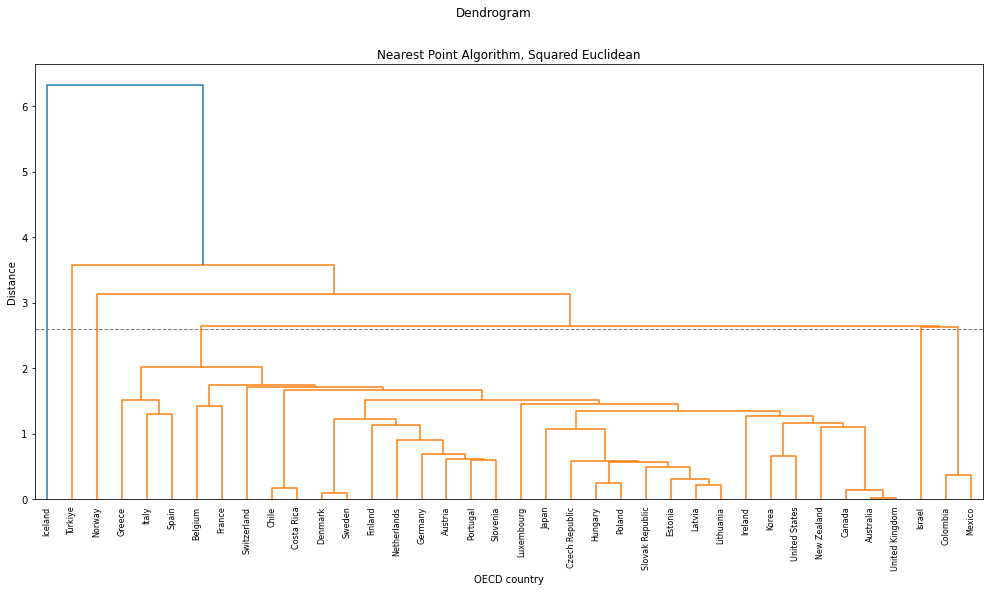

In [193]:
fig, ax = plt.subplots(figsize=(17, 8))
plt.suptitle('Dendrogram')
plt.title('Nearest Point Algorithm, Squared Euclidean')
dendrogram(single, labels=OECD_countries, ax=ax, color_threshold=4)
plt.axhline(y=2.6, c='grey', ls='--', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('OECD country')
plt.ylabel('Distance')
plt.show()

Имеются нетипичные объекты: Исландия, Турция, Норвегия, Израиль, Колумбия и Мексика  
Проверим данный довод с помощью расстояния Махаланобиса

In [194]:
def mahalanobis_outliers(data: pd.DataFrame, threshold: np.float64 = 0.05, silent: bool = False) -> tuple:
    data = data.reset_index().drop('index', axis=1)
    proba = [-threshold]
    step = 0
    outliers_idx = []  # индексы наблюдений, которые были исключены как "выбросы"
    obs_idx = set(range(data.shape[0]))  # множество индексов, соответствующих всем наблюдениям
    m_features = data.shape[1]  # количество признаков
    while any([prob < threshold for prob in proba]):
        n_obs = data.shape[0]  # число наблюдений, оставшихся на каждой итерации
        step_obs_idx = obs_idx.difference(outliers_idx)  # индексы наблюдений, которые не были исключены как "выбросы" на прошлой итерации
        data.index = sorted(step_obs_idx)
        sample_means = [np.array(data.drop(idx, axis=0).mean()).reshape(-1, 1) for idx in step_obs_idx]  # векторы-столбцы
        cov_matrixes = [get_cov_matrix(data.drop(idx, axis=0)) for idx in step_obs_idx]  # матрицы
        diffs = [np.array(data.iloc[idx, :]).reshape(-1, 1) - sample_means[idx] for idx in range(n_obs)]  # вектор-столбцы
        distances = [np.matmul(np.matmul(diff.T, np.linalg.inv(cov_mx)), diff)[0, 0] for diff, cov_mx in zip(diffs, cov_matrixes)]  # скаляры
        fisher_stats = [(((n_obs - m_features - 1) * (n_obs - 1)) / (((n_obs - 1) ** 2 - 1) * m_features)) * distance for distance in distances]
        fisher_crit = stats.f.ppf(1 - 0.05, m_features, n_obs - m_features - 1)
        proba = [stats.f.pdf(quantile, m_features, n_obs - m_features - 1) for quantile in fisher_stats]
        results = pd.DataFrame(
            list(zip((data.index + 1).tolist(), distances, fisher_stats, proba)),
            columns=['Observation', 'Hotelling distance', 'F statistic', 'Probability'],
            index=data.index)
        if not silent:
            print(f'Step: {step}')
            print(f'Fisher\'s statistic: {fisher_crit.round(3)}')
            print('Results:\n', results.to_string(index=False), end='\n\n')
        if any([prob < threshold for prob in proba]):
            outliers_probs = results[results['Probability'] < threshold]['Probability']  # вероятности наблюдений, оказывшиеся меньше "порога"
            outlier_idx = outliers_probs[outliers_probs == outliers_probs.min()].index.tolist()  # индексы наблюдений, имеющих наименьшую вероятность
            for idx in outlier_idx:
                outliers_idx.append(idx)  # помечаем данные наблюдения как "выбросы"
            data = data.drop(outlier_idx, axis=0)  # исключаем "выбросы" из дальнейшего рассмотрения
            step += 1
    return results, outliers_idx

In [195]:
mahalanobis_result, outliers_idx = mahalanobis_outliers(pca_components_scaled, 0.075)

Step: 0
Fisher's statistic: 2.883
Results:
  Observation  Hotelling distance  F statistic  Probability
           1            0.644348     0.197512     0.683865
           2            1.264075     0.387477     0.707965
           3            4.679612     1.434442     0.279779
           4            1.147892     0.351863     0.713716
           5            2.306301     0.706951     0.581460
           6            8.052768     2.468417     0.086903
           7            2.539590     0.778461     0.546848
           8            1.264070     0.387476     0.707965
           9            3.870143     1.186316     0.365805
          10            2.254270     0.691002     0.589135
          11            2.919147     0.894807     0.491249
          12            2.120526     0.650005     0.608658
          13            1.960828     0.601053     0.631335
          14            6.236349     1.911630     0.163820
          15            1.001210     0.306901     0.715834
          16

In [196]:
print('Наблюдения, оказавшиеся аномальными: \n', pca_components_scaled.iloc[outliers_idx, :])

Наблюдения, оказавшиеся аномальными: 
                PC1       PC2       PC3
Iceland  -4.646029  1.848334 -2.308742
Türkiye   3.485711  0.341770 -1.728045
Colombia  2.127034  2.711951 -1.004659
Mexico    1.544608  2.572777 -1.119999
Israel    1.157259  1.242083 -1.962590
Norway   -2.920591  0.764355 -0.834695


In [197]:
outliers_objs = pca_components_scaled.iloc[outliers_idx, :].index.tolist()

Тест подтвердил аномальность наблюдений. Исключаем их из дальнейшего рассмотрения. Они будут возвращены обратно после того, как будут получены устойчивые кластеры объектов

In [198]:
pca_components_broomed = pca_components_scaled.drop(outliers_objs, axis=0)
pca_components_broomed

PC1       PC2       PC3
Australia       -0.805562  0.614914  0.458876
Austria         -1.426043 -0.955367  0.027375
Belgium         -0.404797 -2.051421 -1.376795
Canada          -0.760244  0.836507  0.749933
Chile            1.901153  1.203861 -0.321498
Costa Rica       2.134098  0.945363 -0.549463
Czech Republic   0.068207  0.122929  1.143486
Denmark         -2.718140 -0.983684 -0.632118
Estonia          0.764505  0.262072  1.424487
Finland         -1.481721 -1.435221 -0.922819
France           0.470530 -1.327211 -1.011594
Germany         -0.938020 -0.989188  1.043324
Greece           2.502714 -2.321993 -0.387987
Hungary          1.541333 -0.390522  0.244825
Ireland          0.144097  0.465838 -0.133481
Italy            1.074636 -2.600744 -0.826443
Japan           -0.507375  0.541741  1.893366
Korea            0.404651  1.886405  1.222492
Latvia           1.030780 -0.387034  1.093066
Lithuania        0.925980 -0.255439  1.524572
Luxembourg      -0.545422 -0.350837 -0.694597
Netherlands     -1.850521 -0.255173  0.510837
New Zealand     -0.831651  1.882597  0.733994
Poland           1.909488 -0.217474 -0.027862
Portugal        -0.168525 -1.009131  0.728525
Slovak Republic  1.151742 -0.906282  0.640848
Slovenia        -0.726987 -1.223967  0.245509
Spain            1.430936 -2.321210  0.222006
Sweden          -2.553628 -1.230450 -0.721662
Switzerland     -1.805451  0.719007  1.828204
United Kingdom  -0.870495  0.561214  0.369299
United States    0.191738  1.688630  0.460023

In [199]:
print(pca_components_broomed.shape)

(32, 3)


Основываясь на 3 различных стратегиях иерархического кластерного анализа, определим оптимальное число кластеров

#### Метод дальнего соседа

In [200]:
complete = linkage(pca_components_broomed, method='complete', metric='sqeuclidean')
complete.shape

(31, 4)

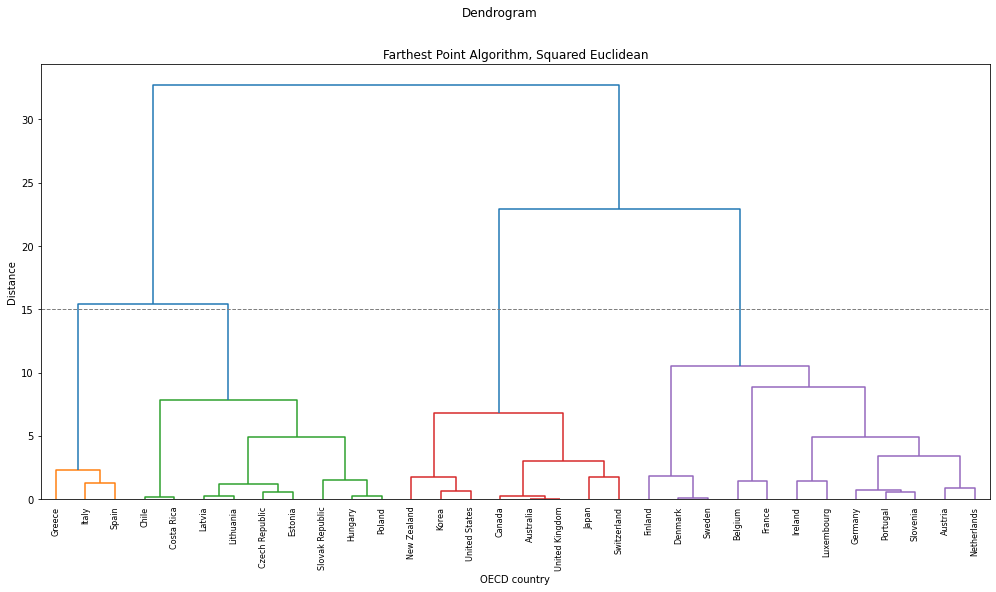

In [201]:
fig, ax = plt.subplots(figsize=(17, 8))
plt.suptitle('Dendrogram')
plt.title('Farthest Point Algorithm, Squared Euclidean')
dendrogram(complete, labels=pca_components_broomed.index, ax=ax, color_threshold=15)
plt.axhline(y=15, c='grey', ls='--', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('OECD country')
plt.ylabel('Distance')
plt.show()

Согласно методу "дальнего соседа", оптимальное число кластеров можно взять за 4

In [202]:
n_clusters = 4

In [203]:
pca_components_labeled_hc = pca_components_broomed.copy()
pca_components_labeled_hc['cluster_labels'] = fcluster(complete, t=n_clusters, criterion='maxclust')

Интерпретирование кластеров

In [204]:
def clust_summary(data: pd.DataFrame) -> None:
    '''Returns summary information on cluster structure'''
    countries_by_clusters = data.reset_index().groupby('cluster_labels', as_index=False)['index'].agg(lambda x: tuple(x))
    countries_by_clusters = dict(zip(countries_by_clusters['cluster_labels'], countries_by_clusters['index']))
    print('Разбиение стран на кластеры:\n')
    for cluster_idx, countries in countries_by_clusters.items():
        countries_str = ''
        for country in countries:
            countries_str += country + ', '
        print('Кластер {}\nРазмер кластера: {}\nСтраны: {}'.format(cluster_idx, len(countries), countries_str[:-2]), end='\n')
        print('-' * 121)

In [205]:
clust_summary(pca_components_labeled_hc)

Разбиение стран на кластеры:

Кластер 1
Размер кластера: 3
Страны: Greece, Italy, Spain
-------------------------------------------------------------------------------------------------------------------------
Кластер 2
Размер кластера: 9
Страны: Chile, Costa Rica, Czech Republic, Estonia, Hungary, Latvia, Lithuania, Poland, Slovak Republic
-------------------------------------------------------------------------------------------------------------------------
Кластер 3
Размер кластера: 8
Страны: Australia, Canada, Japan, Korea, New Zealand, Switzerland, United Kingdom, United States
-------------------------------------------------------------------------------------------------------------------------
Кластер 4
Размер кластера: 12
Страны: Austria, Belgium, Denmark, Finland, France, Germany, Ireland, Luxembourg, Netherlands, Portugal, Slovenia, Sweden
-------------------------------------------------------------------------------------------------------------------------


In [206]:
def clust_centroids(data: pd.DataFrame, col_names: list, figsize: tuple = (6, 10)) -> pd.DataFrame:
    centroids = pd.DataFrame(data.groupby('cluster_labels').mean(), columns=col_names)
    fig, axes = plt.subplots(data['cluster_labels'].nunique(), 1, figsize=figsize, sharex=True)
    for i, ax in enumerate(axes):
        center = centroids.iloc[i, :]
        max_coord = 1.01 * np.abs(center).max().max()
        colors = ['C0' if coord > 0 else 'C1' for coord in center]
        ax.axhline(color='#777777', linewidth=1)
        center.plot.bar(ax=ax, color=colors)
        ax.set_ylabel(f'Cluster {i}')
        ax.set_ylim(-max_coord, max_coord)
    plt.show()
    return centroids

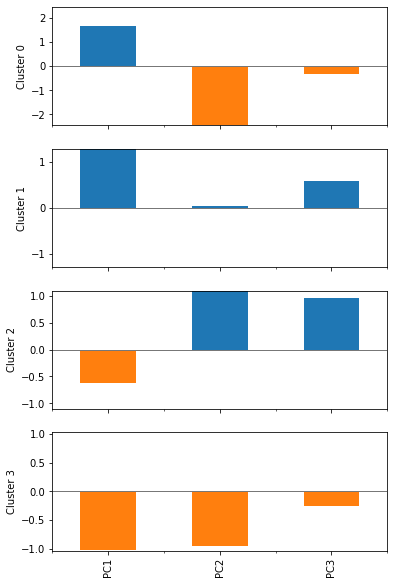

Центроиды:


PC1       PC2       PC3
cluster_labels                              
1               1.669429 -2.414649 -0.330808
2               1.269699  0.041942  0.574718
3              -0.623049  1.091377  0.964524
4              -1.016598 -0.945484 -0.244791

In [207]:
centroids = {}
centroids['complete'] = clust_centroids(pca_components_labeled_hc, pca_components_broomed.columns)
print('Центроиды:')
centroids['complete']

In [208]:
def plot_3d_clusters(labeled_data: pd.DataFrame, centroids: pd.DataFrame, colors: list, plot_axes: bool = False,
                     eq_axis: bool = True, figsize: tuple = (8, 8), title: str = 'Clustered Data') -> None:
    '''Plots 3D clustered data'''

    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.colors import ListedColormap
    import seaborn as sns

    fig = plt.figure(figsize=(figsize[0], figsize[1]))
    ax = fig.add_subplot(projection='3d')
    x_axis_line = ((min(labeled_data.iloc[:, 0]), max(labeled_data.iloc[:, 1])), (0, 0), (0, 0))
    y_axis_line = ((0, 0), (min(labeled_data.iloc[:, 1]), max(labeled_data.iloc[:, 1])), (0, 0))
    z_axis_line = ((0, 0), (0, 0), (min(labeled_data.iloc[:, 2]), max(labeled_data.iloc[:, 2])))

    plt.title(title)
    ax.scatter(labeled_data.iloc[:, 0], labeled_data.iloc[:, 1], labeled_data.iloc[:, 2],
        c=labeled_data.iloc[:, 3], cmap=ListedColormap(colors),  # sns.color_palette('husl', 256).as_hex()
        marker='o',
        s=35)
    for i, point in labeled_data.iterrows():
        ax.text(point[0] + 0.12, point[1], point[2], i, size='x-small', alpha=0.8)
    for i, center in centroids.iterrows():
        ax.scatter(center[0], center[1], center[2], c='#eba817', s=50, marker='x', alpha=0.7)
    if plot_axes:
        for line in (x_axis_line, y_axis_line, z_axis_line):
            ax.plot(line[0], line[1], line[2], c='r')
    if eq_axis:
        plt.axis('equal')
    plt.xlabel(labeled_data.columns[0])
    plt.ylabel(labeled_data.columns[1])
    ax.set_zlabel(labeled_data.columns[2])
    plt.show()

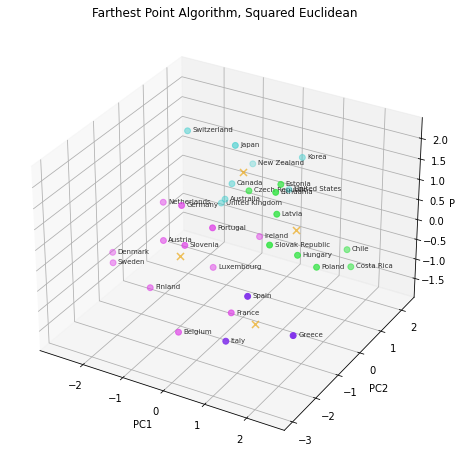

In [209]:
custom_cmap = ['#8334eb', '#27e339', '#346eeb', '#33cccc', '#dd37e6']
plot_3d_clusters(pca_components_labeled_hc, centroids['complete'], custom_cmap, title='Farthest Point Algorithm, Squared Euclidean')

In [210]:
def plot_3d_clusters_dynamic(data: pd.DataFrame, cmap: list = None) -> None:
    import plotly.express as px
    if cmap is None:
        cmap = px.colors.sequential.Rainbow
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='cluster_labels', template='plotly_white', color_continuous_scale=cmap)
    annot = [dict(x=row['PC1'], y=row['PC2'], z=row['PC3'],
            text=i, font=dict(size=6), xshift=-15, yshift=10, showarrow=False) for i, row in data.iterrows()]
    fig.update_layout(scene=dict(annotations=annot))
    fig.update_traces(marker_size=5.5)
    fig.write_html('./test.html')
    fig.show()

In [211]:
plot_3d_clusters_dynamic(pca_components_labeled_hc)

#### Метод Варда

In [212]:
ward = linkage(pca_components_broomed, method='ward', metric='euclidean')
ward.shape

(31, 4)

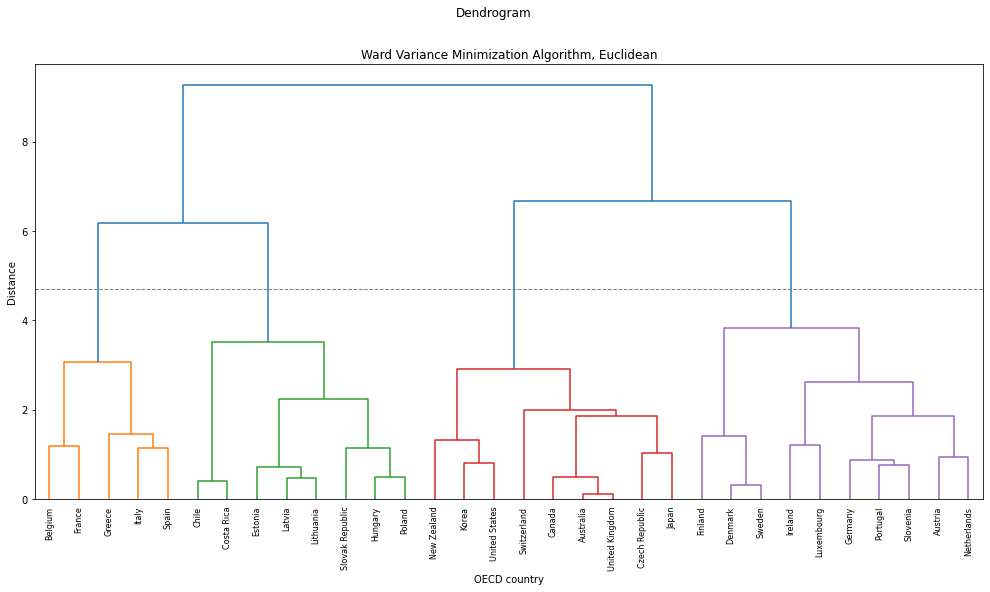

In [213]:
fig, ax = plt.subplots(figsize=(17, 8))
plt.suptitle('Dendrogram')
plt.title('Ward Variance Minimization Algorithm, Euclidean')
dendrogram(ward, labels=pca_components_broomed.index, ax=ax, color_threshold=4.7)
plt.axhline(y=4.7, c='grey', ls='--', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('OECD country')
plt.ylabel('Distance')
plt.show()

Согласно методу Варда, оптимальное число кластеров можно взять за 4

In [214]:
pca_components_labeled_hw = pca_components_broomed.copy()
pca_components_labeled_hw['cluster_labels'] = fcluster(ward, t=n_clusters, criterion='maxclust')

In [215]:
clust_summary(pca_components_labeled_hw)

Разбиение стран на кластеры:

Кластер 1
Размер кластера: 5
Страны: Belgium, France, Greece, Italy, Spain
-------------------------------------------------------------------------------------------------------------------------
Кластер 2
Размер кластера: 8
Страны: Chile, Costa Rica, Estonia, Hungary, Latvia, Lithuania, Poland, Slovak Republic
-------------------------------------------------------------------------------------------------------------------------
Кластер 3
Размер кластера: 9
Страны: Australia, Canada, Czech Republic, Japan, Korea, New Zealand, Switzerland, United Kingdom, United States
-------------------------------------------------------------------------------------------------------------------------
Кластер 4
Размер кластера: 10
Страны: Austria, Denmark, Finland, Germany, Ireland, Luxembourg, Netherlands, Portugal, Slovenia, Sweden
-------------------------------------------------------------------------------------------------------------------------


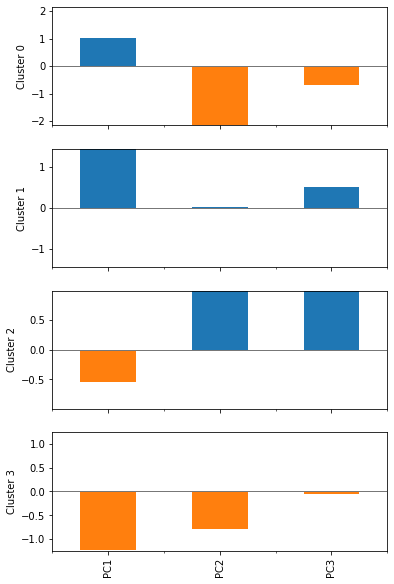

Центроиды:


PC1       PC2       PC3
cluster_labels                              
1               1.014804 -2.124516 -0.676163
2               1.419885  0.031818  0.503622
3              -0.546242  0.983772  0.984408
4              -1.226491 -0.796718 -0.054911

In [216]:
centroids['ward'] = clust_centroids(pca_components_labeled_hw, pca_components_broomed.columns)
print('Центроиды:')
centroids['ward']

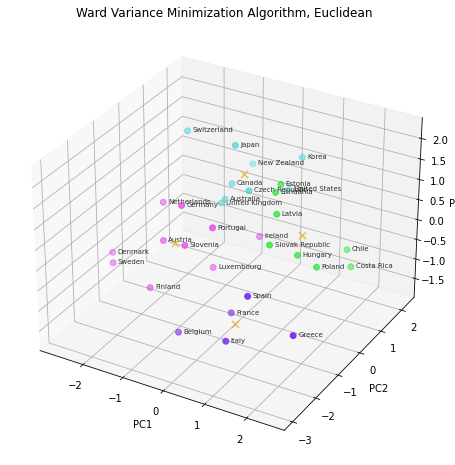

In [217]:
plot_3d_clusters(pca_components_labeled_hw, centroids['ward'], custom_cmap, title='Ward Variance Minimization Algorithm, Euclidean')

In [218]:
plot_3d_clusters_dynamic(pca_components_labeled_hw)

#### Медианный метод

In [219]:
median_ = linkage(pca_components_broomed, method='median', metric='euclidean')
median_.shape

(31, 4)

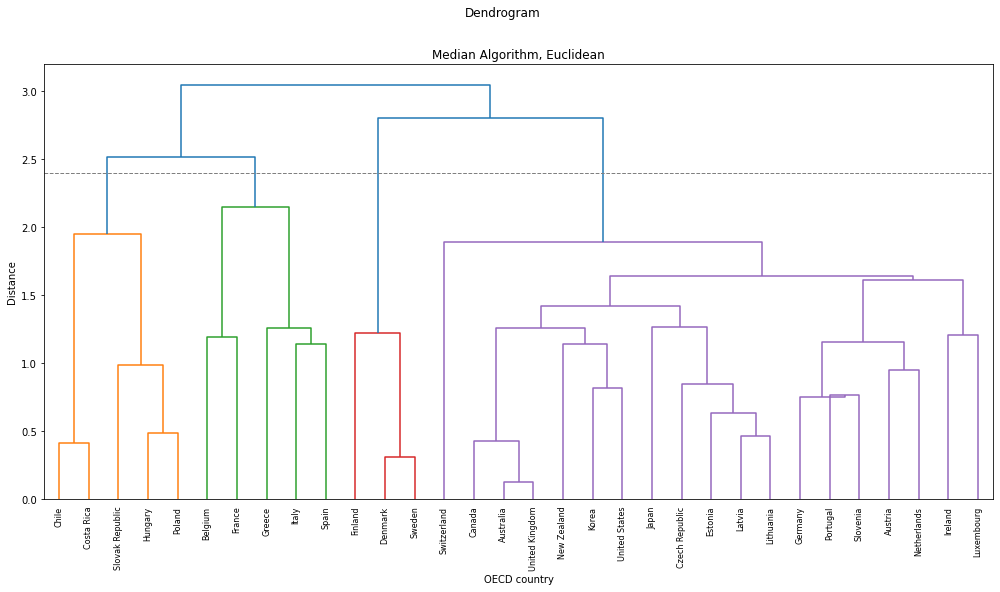

In [220]:
fig, ax = plt.subplots(figsize=(17, 8))
plt.suptitle('Dendrogram')
plt.title('Median Algorithm, Euclidean')
dendrogram(median_, labels=pca_components_broomed.index, ax=ax, color_threshold=2.4)
plt.axhline(y=2.4, c='grey', ls='--', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('OECD country')
plt.ylabel('Distance')
plt.show()

Согласно медианному методу, оптимальное число кластеров можно взять за 4

In [221]:
pca_components_labeled_hm = pca_components_broomed.copy()
pca_components_labeled_hm['cluster_labels'] = fcluster(median_, t=n_clusters, criterion='maxclust')

In [222]:
clust_summary(pca_components_labeled_hm)

Разбиение стран на кластеры:

Кластер 1
Размер кластера: 5
Страны: Chile, Costa Rica, Hungary, Poland, Slovak Republic
-------------------------------------------------------------------------------------------------------------------------
Кластер 2
Размер кластера: 5
Страны: Belgium, France, Greece, Italy, Spain
-------------------------------------------------------------------------------------------------------------------------
Кластер 3
Размер кластера: 3
Страны: Denmark, Finland, Sweden
-------------------------------------------------------------------------------------------------------------------------
Кластер 4
Размер кластера: 19
Страны: Australia, Austria, Canada, Czech Republic, Estonia, Germany, Ireland, Japan, Korea, Latvia, Lithuania, Luxembourg, Netherlands, New Zealand, Portugal, Slovenia, Switzerland, United Kingdom, United States
-------------------------------------------------------------------------------------------------------------------------


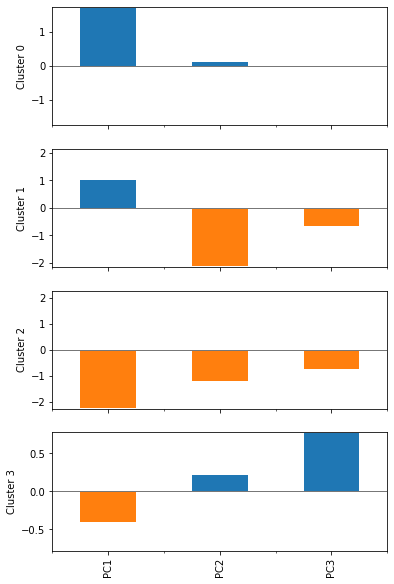

Центроиды:


PC1       PC2       PC3
cluster_labels                              
1               1.727563  0.126989 -0.002630
2               1.014804 -2.124516 -0.676163
3              -2.251163 -1.216452 -0.758866
4              -0.405597  0.218722  0.769963

In [223]:
centroids['median'] = clust_centroids(pca_components_labeled_hm, pca_components_broomed.columns)
print('Центроиды:')
centroids['median']

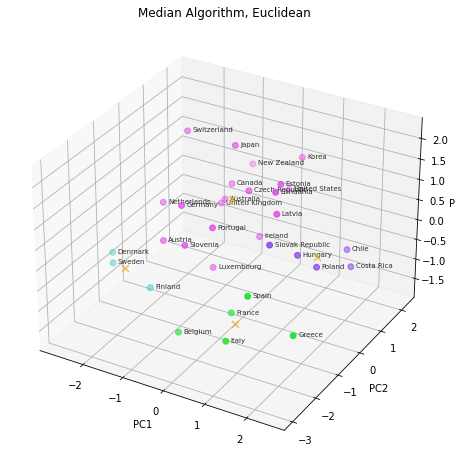

In [224]:
plot_3d_clusters(pca_components_labeled_hm, centroids['median'], custom_cmap, title='Median Algorithm, Euclidean')

In [225]:
plot_3d_clusters_dynamic(pca_components_labeled_hm)

### K средних

Выбор числа кластеров

In [226]:
distortions = []
n_clusters = range(2, pca_components_broomed.shape[0])

for k in n_clusters:
    centroids_, ssd = kmeans(pca_components_broomed, k)
    distortions.append(ssd)
elbow_plot = pd.DataFrame({'n_clusters': n_clusters, 'distortions': distortions})

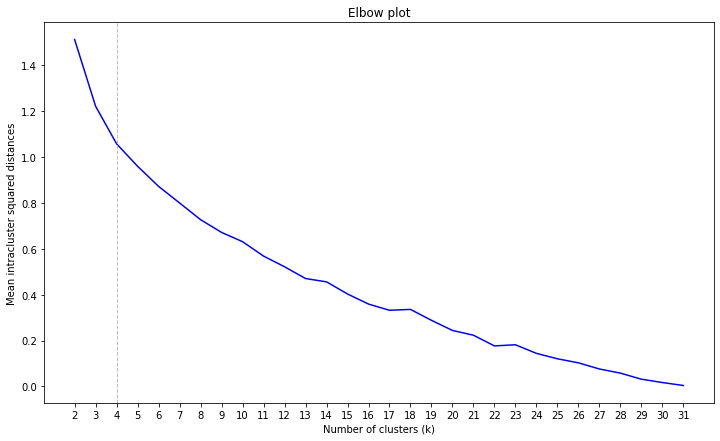

In [227]:
ax = elbow_plot.plot(x='n_clusters', y='distortions', figsize=(12, 7), c='blue', title='Elbow plot')
plt.axvline(x=4, c='#bfbfbf', ls='--', lw=1)
# plt.axvline(x=5, c='#919191', ls='--', lw=1)
plt.xticks(n_clusters)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Mean intracluster squared distances')
ax.legend().set_visible(False)

На графике видно, что данные в целом не имеют четко разделенных кластеров. Согласно методу "локтя", примерное число кластеров можно взять за 4

Кластеризация

In [228]:
n_clusters = 4

In [229]:
centroids_, ssd = kmeans(pca_components_broomed, k_or_guess=n_clusters, iter=100, thresh=10**(-5))

In [230]:
pca_components_labeled_km = pca_components_broomed.copy()
pca_components_labeled_km['cluster_labels'], euc_distances = vq(pca_components_broomed, centroids_)

In [231]:
distances = pd.Series(euc_distances, index=pca_components_broomed.index)
print('Евклидовы расстояния от объекта до центра кластера:')
distances

Евклидовы расстояния от объекта до центра кластера:


Australia          0.616060
Austria            0.089340
Belgium            1.584769
Canada             0.322918
Chile              1.511994
Costa Rica         1.566414
Czech Republic     1.012624
Denmark            1.462666
Estonia            1.153487
Finland            1.013565
France             1.021980
Germany            1.176441
Greece             1.528372
Hungary            0.509997
Ireland            1.271041
Italy              0.502948
Japan              1.093215
Korea              1.345740
Latvia             0.821148
Lithuania          1.169957
Luxembourg         1.207691
Netherlands        0.998850
New Zealand        1.023974
Poland             0.764417
Portugal           1.438779
Slovak Republic    0.985273
Slovenia           0.769587
Spain              1.009238
Sweden             1.386600
Switzerland        1.650069
United Kingdom     0.738560
United States      1.090985
dtype: float64

In [232]:
print('Среднее внутрикластерное Евклидово расстояние: {}'.format(ssd.round(3)))

Среднее внутрикластерное Евклидово расстояние: 1.057


Интерпретирование кластеров

In [233]:
clust_summary(pca_components_labeled_km)

Разбиение стран на кластеры:

Кластер 0
Размер кластера: 9
Страны: Austria, Denmark, Finland, Germany, Luxembourg, Netherlands, Portugal, Slovenia, Sweden
-------------------------------------------------------------------------------------------------------------------------
Кластер 1
Размер кластера: 10
Страны: Australia, Canada, Czech Republic, Ireland, Japan, Korea, New Zealand, Switzerland, United Kingdom, United States
-------------------------------------------------------------------------------------------------------------------------
Кластер 2
Размер кластера: 5
Страны: Belgium, France, Greece, Italy, Spain
-------------------------------------------------------------------------------------------------------------------------
Кластер 3
Размер кластера: 8
Страны: Chile, Costa Rica, Estonia, Hungary, Latvia, Lithuania, Poland, Slovak Republic
-------------------------------------------------------------------------------------------------------------------------


In [234]:
from collections import Counter

In [235]:
print('Размеры кластеров:')
dict(sorted(Counter(pca_components_labeled_km.cluster_labels).items()))

Размеры кластеров:


{0: 9, 1: 10, 2: 5, 3: 8}

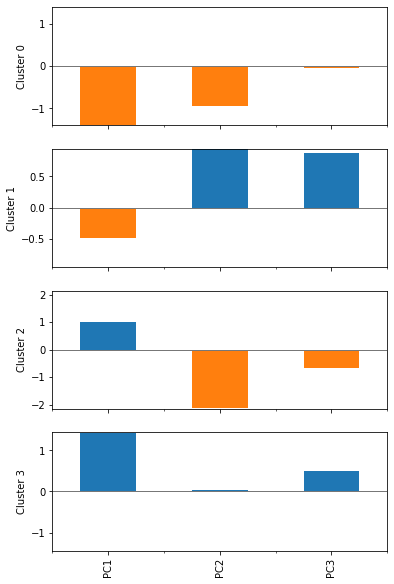

Центроиды:


PC1       PC2       PC3
cluster_labels                              
0              -1.378779 -0.937002 -0.046181
1              -0.477208  0.931978  0.872619
2               1.014804 -2.124516 -0.676163
3               1.419885  0.031818  0.503622

In [236]:
centroids['kmeans'] = clust_centroids(pca_components_labeled_km, pca_components_broomed.columns)
print('Центроиды:')
centroids['kmeans']

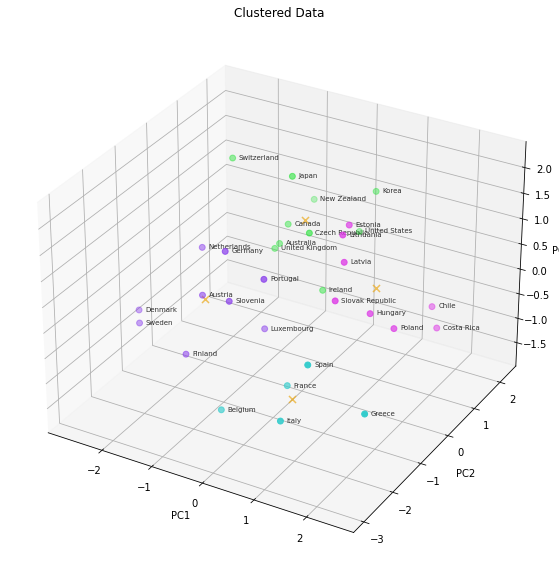

In [237]:
plot_3d_clusters(pca_components_labeled_km, centroids['kmeans'], custom_cmap, figsize=(10, 10))

In [238]:
plot_3d_clusters_dynamic(pca_components_labeled_km)

### Построение таблицы частот для всех стратегий кластеризации

Сравним центроиды кластеров, полученных с помощью различных стратегий

In [239]:
for key, value in centroids.items():
    print('Стратегия кластеризации: {}\nЦентроиды кластеров:\n{}\n'.format(key, value.round(3)))

Стратегия кластеризации: complete
Центроиды кластеров:
                  PC1    PC2    PC3
cluster_labels                     
1               1.669 -2.415 -0.331
2               1.270  0.042  0.575
3              -0.623  1.091  0.965
4              -1.017 -0.945 -0.245

Стратегия кластеризации: ward
Центроиды кластеров:
                  PC1    PC2    PC3
cluster_labels                     
1               1.015 -2.125 -0.676
2               1.420  0.032  0.504
3              -0.546  0.984  0.984
4              -1.226 -0.797 -0.055

Стратегия кластеризации: median
Центроиды кластеров:
                  PC1    PC2    PC3
cluster_labels                     
1               1.728  0.127 -0.003
2               1.015 -2.125 -0.676
3              -2.251 -1.216 -0.759
4              -0.406  0.219  0.770

Стратегия кластеризации: kmeans
Центроиды кластеров:
                  PC1    PC2    PC3
cluster_labels                     
0              -1.379 -0.937 -0.046
1              -0.477  0.932 

In [240]:
centroids_df = pd.DataFrame()
for key, value in centroids.items():
    partition = value.reset_index().iloc[:, 1:]
    partition.index = [key] * value.shape[0]
    centroids_df = pd.concat([centroids_df, partition])

In [241]:
def plot_3d_centroids_dynamic(data: pd.DataFrame) -> None:
    import plotly.express as px
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color=data.index.values, template='plotly_white')
    annot = [dict(x=row['PC1'], y=row['PC2'], z=row['PC3'],
            text=i, font=dict(size=6), xshift=-15, yshift=10, showarrow=False) for i, row in data.iterrows()]
    fig.update_layout(scene=dict(annotations=annot))
    fig.update_traces(marker_size=5.5)
    fig.show()

In [242]:
plot_3d_centroids_dynamic(centroids_df)

Наиболее близко расположены центры кластеров, полученных алгоритмом Варда и методом K-средних. Центры кластеров, полученных с помощью медианного алгоритма, имеют тенденцию к смещению по отношению к другим

Приведем метки кластеров по каждому методу к сопоставимому виду

In [243]:
centroids['complete'].index = [1, 2, 3, 4]
centroids['ward'].index = [1, 2, 3, 4]
centroids['median'].index = [2, 1, 4, 3]
centroids['kmeans'].index = [1, 4, 2, 3]

In [244]:
def transform_clust_label_hm(x):
    if x == 1:
        return 2
    elif x == 2:
        return 1
    elif x == 3:
        return 4
    elif x == 4:
        return 3

def transform_clust_label_km(x):
    if x == 0:
        return 1
    elif x == 1:
        return 4
    elif x == 2:
        return 2
    elif x == 3:
        return 3

In [245]:
pca_components_labeled_hm['cluster_labels'] = pca_components_labeled_hm['cluster_labels'].apply(transform_clust_label_hm)
pca_components_labeled_km['cluster_labels'] = pca_components_labeled_km['cluster_labels'].apply(transform_clust_label_km)

In [246]:
for key, value in centroids.items():
    centroids[key] = value.sort_index()
for key, value in centroids.items():
    print('Стратегия кластеризации: {}\nЦентроиды кластеров:\n{}\n'.format(key, value.round(3)))

Стратегия кластеризации: complete
Центроиды кластеров:
     PC1    PC2    PC3
1  1.669 -2.415 -0.331
2  1.270  0.042  0.575
3 -0.623  1.091  0.965
4 -1.017 -0.945 -0.245

Стратегия кластеризации: ward
Центроиды кластеров:
     PC1    PC2    PC3
1  1.015 -2.125 -0.676
2  1.420  0.032  0.504
3 -0.546  0.984  0.984
4 -1.226 -0.797 -0.055

Стратегия кластеризации: median
Центроиды кластеров:
     PC1    PC2    PC3
1  1.015 -2.125 -0.676
2  1.728  0.127 -0.003
3 -0.406  0.219  0.770
4 -2.251 -1.216 -0.759

Стратегия кластеризации: kmeans
Центроиды кластеров:
     PC1    PC2    PC3
1 -1.379 -0.937 -0.046
2  1.015 -2.125 -0.676
3  1.420  0.032  0.504
4 -0.477  0.932  0.873



Получим таблицу частот меток кластеров

In [247]:
frequency_table = pd.DataFrame()
for method, result in zip(list(centroids.keys()),
                          [pca_components_labeled_hc, pca_components_labeled_hw, pca_components_labeled_hm, pca_components_labeled_km]):
    partition = result['cluster_labels']
    partition.name = method
    frequency_table = pd.concat([frequency_table, partition], axis=1)
frequency_table

complete  ward  median  kmeans
Australia               3     3       3       4
Austria                 4     4       3       1
Belgium                 4     1       1       2
Canada                  3     3       3       4
Chile                   2     2       2       3
Costa Rica              2     2       2       3
Czech Republic          2     3       3       4
Denmark                 4     4       4       1
Estonia                 2     2       3       3
Finland                 4     4       4       1
France                  4     1       1       2
Germany                 4     4       3       1
Greece                  1     1       1       2
Hungary                 2     2       2       3
Ireland                 4     4       3       4
Italy                   1     1       1       2
Japan                   3     3       3       4
Korea                   3     3       3       4
Latvia                  2     2       3       3
Lithuania               2     2       3       3
Luxembourg              4     4       3       1
Netherlands             4     4       3       1
New Zealand             3     3       3       4
Poland                  2     2       2       3
Portugal                4     4       3       1
Slovak Republic         2     2       2       3
Slovenia                4     4       3       1
Spain                   1     1       1       2
Sweden                  4     4       4       1
Switzerland             3     3       3       4
United Kingdom          3     3       3       4
United States           3     3       3       4

In [248]:
custom_mode = lambda row: None if len(pd.Series.mode(row)) > 1 else pd.Series.mode(row)

Таблица частот с итоговыми метками кластеров

In [249]:
frequency_table['cluster_labels'] = frequency_table.apply(custom_mode, axis=1)
frequency_table

complete  ward  median  kmeans  cluster_labels
Australia               3     3       3       4             3.0
Austria                 4     4       3       1             4.0
Belgium                 4     1       1       2             1.0
Canada                  3     3       3       4             3.0
Chile                   2     2       2       3             2.0
Costa Rica              2     2       2       3             2.0
Czech Republic          2     3       3       4             3.0
Denmark                 4     4       4       1             4.0
Estonia                 2     2       3       3             NaN
Finland                 4     4       4       1             4.0
France                  4     1       1       2             1.0
Germany                 4     4       3       1             4.0
Greece                  1     1       1       2             1.0
Hungary                 2     2       2       3             2.0
Ireland                 4     4       3       4             4.0
Italy                   1     1       1       2             1.0
Japan                   3     3       3       4             3.0
Korea                   3     3       3       4             3.0
Latvia                  2     2       3       3             NaN
Lithuania               2     2       3       3             NaN
Luxembourg              4     4       3       1             4.0
Netherlands             4     4       3       1             4.0
New Zealand             3     3       3       4             3.0
Poland                  2     2       2       3             2.0
Portugal                4     4       3       1             4.0
Slovak Republic         2     2       2       3             2.0
Slovenia                4     4       3       1             4.0
Spain                   1     1       1       2             1.0
Sweden                  4     4       4       1             4.0
Switzerland             3     3       3       4             3.0
United Kingdom          3     3       3       4             3.0
United States           3     3       3       4             3.0

Для Ирландии не удалось однозначно определить принадлежность к кластеру, следовательно, для данной страны, как и для исключенных ранее, будем определять метки кластеров, учитывая ее расстояние до конкретного центроида. Для этого пересчитаем значения центроидов, исключив неопределенное наблюдение

In [250]:
uncertain_objs = frequency_table[pd.isna(frequency_table['cluster_labels'])].index.tolist()
uncertain_objs

['Estonia', 'Latvia', 'Lithuania']

Проведем оценку качества классификаторов

In [251]:
from scipy.spatial import distance

In [252]:
get_distance = lambda row: distance.sqeuclidean(row[[0, 1, 2]], row[[4, 5, 6]])

def sum_sq_intraclust_dist(labeled_data: pd.DataFrame, centers: pd.DataFrame) -> np.float64:
    '''Calculates sum of squares of intracluster distances'''
    centers.columns = ['C' + str(i + 1) for i in range(len(centers.columns))]
    merged_data = labeled_data.merge(centers, how='inner', left_on='cluster_labels', right_index=True)
    merged_data['distances'] = merged_data.apply(get_distance, axis=1)
    return merged_data.groupby('cluster_labels')['distances'].sum().sum()

In [253]:
sum_sq_distances = {}
for data in zip([pca_components_labeled_hc, pca_components_labeled_hw, pca_components_labeled_hm, pca_components_labeled_km], centroids.items()):
    labeled_data = data[0]
    method = data[1][0]
    centers = data[1][1]
    sum_sq_distances[method] = sum_sq_intraclust_dist(labeled_data.drop(uncertain_objs, axis=0), centers)
    print('Стратегия кластеризации: {}\nСумма квадратов расстояний до центров кластеров: {}\n'.format(method, sum_sq_distances[method].round(3)))

Стратегия кластеризации: complete
Сумма квадратов расстояний до центров кластеров: 41.859

Стратегия кластеризации: ward
Сумма квадратов расстояний до центров кластеров: 39.026

Стратегия кластеризации: median
Сумма квадратов расстояний до центров кластеров: 43.53

Стратегия кластеризации: kmeans
Сумма квадратов расстояний до центров кластеров: 36.956



Результаты кластеризации без нетипичных объектов (выбросов) и объектов с неопределенными метками кластеров

In [254]:
pca_components_labeled_final = pca_components_labeled_km.drop(uncertain_objs, axis=0)
pca_components_labeled_final['cluster_labels'] = frequency_table.drop(uncertain_objs, axis=0)['cluster_labels'].astype('int')
pca_components_labeled_final

PC1       PC2       PC3  cluster_labels
Australia       -0.805562  0.614914  0.458876               3
Austria         -1.426043 -0.955367  0.027375               4
Belgium         -0.404797 -2.051421 -1.376795               1
Canada          -0.760244  0.836507  0.749933               3
Chile            1.901153  1.203861 -0.321498               2
Costa Rica       2.134098  0.945363 -0.549463               2
Czech Republic   0.068207  0.122929  1.143486               3
Denmark         -2.718140 -0.983684 -0.632118               4
Finland         -1.481721 -1.435221 -0.922819               4
France           0.470530 -1.327211 -1.011594               1
Germany         -0.938020 -0.989188  1.043324               4
Greece           2.502714 -2.321993 -0.387987               1
Hungary          1.541333 -0.390522  0.244825               2
Ireland          0.144097  0.465838 -0.133481               4
Italy            1.074636 -2.600744 -0.826443               1
Japan           -0.507375  0.541741  1.893366               3
Korea            0.404651  1.886405  1.222492               3
Luxembourg      -0.545422 -0.350837 -0.694597               4
Netherlands     -1.850521 -0.255173  0.510837               4
New Zealand     -0.831651  1.882597  0.733994               3
Poland           1.909488 -0.217474 -0.027862               2
Portugal        -0.168525 -1.009131  0.728525               4
Slovak Republic  1.151742 -0.906282  0.640848               2
Slovenia        -0.726987 -1.223967  0.245509               4
Spain            1.430936 -2.321210  0.222006               1
Sweden          -2.553628 -1.230450 -0.721662               4
Switzerland     -1.805451  0.719007  1.828204               3
United Kingdom  -0.870495  0.561214  0.369299               3
United States    0.191738  1.688630  0.460023               3

Определение устойчивых профилей кластеров

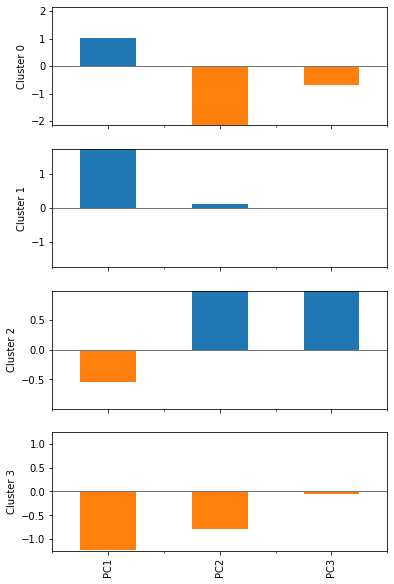

PC1       PC2       PC3
cluster_labels                              
1               1.014804 -2.124516 -0.676163
2               1.727563  0.126989 -0.002630
3              -0.546242  0.983772  0.984408
4              -1.226491 -0.796718 -0.054911

In [255]:
centroids_optimal = clust_centroids(pca_components_labeled_final, pca_components_broomed.columns)
centroids_optimal

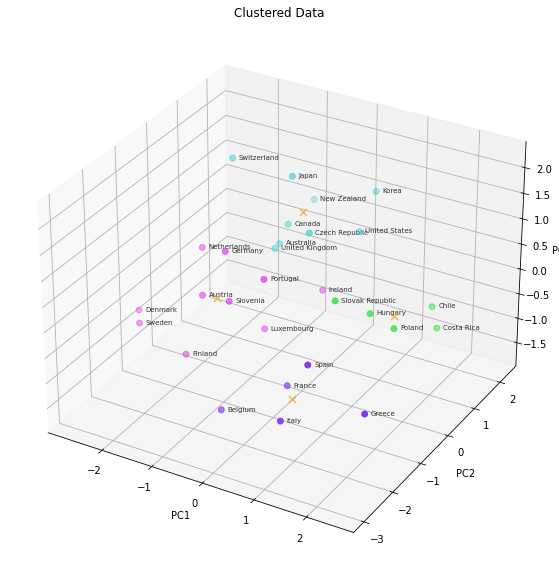

In [256]:
plot_3d_clusters(pca_components_labeled_final, centroids_optimal, custom_cmap, figsize=(10, 10))

In [257]:
plot_3d_clusters_dynamic(pca_components_labeled_final)

In [258]:
centroids_final_df = centroids_optimal.reset_index(drop=True)
centroids_final_df.index = ['clust' + str(i + 1) + '_centroid' for i in range(n_clusters)]
centroids_final_df['cluster_labels'] = [0] * n_clusters
labeled_final_with_centroids = pd.concat([pca_components_labeled_final, centroids_final_df], axis=0)

In [259]:
plot_3d_clusters_dynamic(labeled_final_with_centroids)

Определение принадлежности нерасклассифицированных объектов к полученным кластерам. Используем расстояние Махаланобиса

In [260]:
not_clustered = *outliers_objs, *uncertain_objs
not_clustered

('Iceland',
 'Türkiye',
 'Colombia',
 'Mexico',
 'Israel',
 'Norway',
 'Estonia',
 'Latvia',
 'Lithuania')

In [261]:
cov_matrixes = [pca_components_labeled_final[pca_components_labeled_final['cluster_labels'] == cluster].drop('cluster_labels', axis=1).cov()
                for cluster in range(1, n_clusters + 1)]
for i, matrix in enumerate(cov_matrixes):
    print('Ковариационно-дисперсионная матрица {}-го кластера:\n{}\n'.format(i + 1, matrix))

Ковариационно-дисперсионная матрица 1-го кластера:
          PC1       PC2       PC3
PC1  1.175531 -0.235472  0.492682
PC2 -0.235472  0.236379 -0.120165
PC3  0.492682 -0.120165  0.378934

Ковариационно-дисперсионная матрица 2-го кластера:
          PC1       PC2       PC3
PC1  0.148688  0.287080 -0.174715
PC2  0.287080  0.820877 -0.393787
PC3 -0.174715 -0.393787  0.219159

Ковариационно-дисперсионная матрица 3-го кластера:
          PC1       PC2       PC3
PC1  0.464140  0.146675 -0.079082
PC2  0.146675  0.432787 -0.081704
PC3 -0.079082 -0.081704  0.333424

Ковариационно-дисперсионная матрица 4-го кластера:
          PC1       PC2       PC3
PC1  0.919452  0.250184  0.261142
PC2  0.250184  0.334086  0.039337
PC3  0.261142  0.039337  0.464816



In [262]:
not_clustered_distances = pd.DataFrame()
for country in not_clustered:
    country_distances = {}
    f_stats = []
    f_crit = []
    signif = []
    for cluster, row in centroids_optimal.iterrows():
        country_distances[cluster] = distance.mahalanobis(np.array(pca_components_scaled.loc[country, :]), np.array(row),
                                                          np.linalg.inv(cov_matrixes[cluster - 1]))  ** 2
        n_cluster_objs = len(pca_components_labeled_final[pca_components_labeled_final['cluster_labels'] == cluster])
        f_stats.append((n_cluster_objs - len(signif_componetns) - 1) * (n_cluster_objs - 1) * country_distances[cluster] /
                       (((n_cluster_objs - 1) ** 2 - 1) * n_features))
        f_crit.append(stats.f.ppf(1 - 0.05, len(signif_componetns), n_cluster_objs - len(signif_componetns) - 1))
        signif.append('Значимо' if f_stats[cluster - 1] > f_crit[cluster - 1] else 'Не значимо')
    partition = pd.DataFrame({
        'country': [country] * n_clusters,
        'cluster_labels': country_distances.keys(),
        'distances': country_distances.values(),
        'f_stats': f_stats,
        'f_crit': f_crit,
        'significance': signif
        })
    not_clustered_distances = pd.concat([not_clustered_distances, partition], axis=0)
not_clustered_distances.sort_values(['country', 'cluster_labels'], inplace=True)
min_distances = not_clustered_distances.groupby('country')['distances'].min()
additional_objs = not_clustered_distances[(not_clustered_distances['significance'] == 'Не значимо') &
                  (not_clustered_distances['distances'].isin(min_distances))].sort_values(['country', 'distances']).reset_index(drop=True)
additional_objs

country  cluster_labels  distances   f_stats    f_crit significance
0   Colombia               3  23.741521  2.153426  5.409451   Не значимо
1    Estonia               4   7.776428  0.749870  4.757063   Не значимо
2     Israel               4  28.570010  2.754965  4.757063   Не значимо
3     Latvia               4   6.300619  0.607560  4.757063   Не значимо
4  Lithuania               4   7.442797  0.717698  4.757063   Не значимо
5     Mexico               3  19.986541  1.812838  5.409451   Не значимо
6     Norway               4  18.500187  1.783947  4.757063   Не значимо
7    Türkiye               4  47.937744  4.622568  4.757063   Не значимо

In [263]:
pca_components_labeled_full = pca_components_labeled_final.copy()
for key, value in dict(additional_objs[['country', 'cluster_labels']].values).items():
    partition = pd.DataFrame(dict(pca_components_scaled.loc[key, :]), index=[key])
    partition['cluster_labels'] = value
    pca_components_labeled_full = pd.concat([pca_components_labeled_full, partition], axis=0)
pca_components_labeled_full.sort_index(inplace=True)
pca_components_labeled_full

PC1       PC2       PC3  cluster_labels
Australia       -0.805562  0.614914  0.458876               3
Austria         -1.426043 -0.955367  0.027375               4
Belgium         -0.404797 -2.051421 -1.376795               1
Canada          -0.760244  0.836507  0.749933               3
Chile            1.901153  1.203861 -0.321498               2
Colombia         2.127034  2.711951 -1.004659               3
Costa Rica       2.134098  0.945363 -0.549463               2
Czech Republic   0.068207  0.122929  1.143486               3
Denmark         -2.718140 -0.983684 -0.632118               4
Estonia          0.764505  0.262072  1.424487               4
Finland         -1.481721 -1.435221 -0.922819               4
France           0.470530 -1.327211 -1.011594               1
Germany         -0.938020 -0.989188  1.043324               4
Greece           2.502714 -2.321993 -0.387987               1
Hungary          1.541333 -0.390522  0.244825               2
Ireland          0.144097  0.465838 -0.133481               4
Israel           1.157259  1.242083 -1.962590               4
Italy            1.074636 -2.600744 -0.826443               1
Japan           -0.507375  0.541741  1.893366               3
Korea            0.404651  1.886405  1.222492               3
Latvia           1.030780 -0.387034  1.093066               4
Lithuania        0.925980 -0.255439  1.524572               4
Luxembourg      -0.545422 -0.350837 -0.694597               4
Mexico           1.544608  2.572777 -1.119999               3
Netherlands     -1.850521 -0.255173  0.510837               4
New Zealand     -0.831651  1.882597  0.733994               3
Norway          -2.920591  0.764355 -0.834695               4
Poland           1.909488 -0.217474 -0.027862               2
Portugal        -0.168525 -1.009131  0.728525               4
Slovak Republic  1.151742 -0.906282  0.640848               2
Slovenia        -0.726987 -1.223967  0.245509               4
Spain            1.430936 -2.321210  0.222006               1
Sweden          -2.553628 -1.230450 -0.721662               4
Switzerland     -1.805451  0.719007  1.828204               3
Türkiye          3.485711  0.341770 -1.728045               4
United Kingdom  -0.870495  0.561214  0.369299               3
United States    0.191738  1.688630  0.460023               3

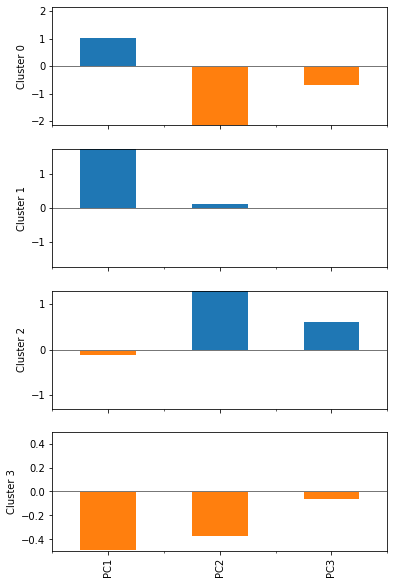

PC1       PC2       PC3
cluster_labels                              
1               1.014804 -2.124516 -0.676163
2               1.727563  0.126989 -0.002630
3              -0.113140  1.285334  0.612274
4              -0.488829 -0.374961 -0.064519

In [264]:
centroids_full = clust_centroids(pca_components_labeled_full, pca_components_broomed.columns)
centroids_full

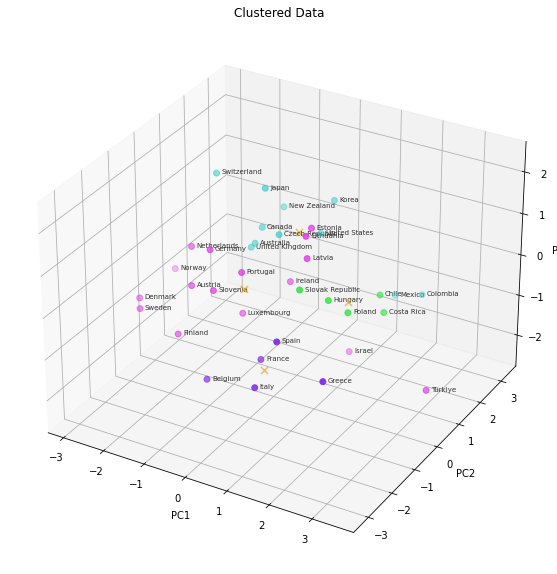

In [265]:
plot_3d_clusters(pca_components_labeled_full, centroids_full, custom_cmap, figsize=(10, 10))

In [266]:
plot_3d_clusters_dynamic(pca_components_labeled_full)

In [267]:
centroids_full_df = centroids_full.reset_index(drop=True)
centroids_full_df.index = ['clust' + str(i + 1) + '_centroid' for i in range(n_clusters)]
centroids_full_df['cluster_labels'] = [0] * n_clusters
labeled_data_with_centroids = pd.concat([pca_components_labeled_full, centroids_full_df], axis=0)

In [268]:
plot_3d_clusters_dynamic(labeled_data_with_centroids)

In [269]:
print('Сумма квадратов расстояний до центров кластеров для итоговой классификации: {:.3f}'
      .format(sum_sq_intraclust_dist(pca_components_labeled_final, centroids_optimal)))

Сумма квадратов расстояний до центров кластеров для итоговой классификации: 37.226
